# Machine Learning Model for Dublin Bikes application

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression ## maybe logisitic regression??????
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split


## Get new query for new weather and bike data from the 4th to the 7th so have an entire file for 5 weeks for both weather and bike data

# Clean and standardize the data

In [5]:
# we just need to create a collect csv files for both and put them in here
df_bike_1 = pd.read_csv('dynamic_4_4_23.csv')
df_bike_1.head()

number                  name  bike_stands  available_bike_stands  \
0      42      SMITHFIELD NORTH           30                     15   
1      30  PARNELL SQUARE NORTH           20                     19   
2      54        CLONMEL STREET           33                     21   
3     108         AVONDALE ROAD           35                     17   
4      20     JAMES STREET EAST           30                     12   

   available_bikes status      s_date    s_time  
0               15   OPEN  2023-03-03  10:47:16  
1                1   OPEN  2023-03-03  10:45:35  
2               12   OPEN  2023-03-03  10:49:41  
3               18   OPEN  2023-03-03  10:44:37  
4               17   OPEN  2023-03-03  10:44:23

In [6]:
df_bike_2 = pd.read_csv('dynamic_4_7_4_23.csv')
df_bike_2.head()

number                  name  bike_stands  available_bike_stands  \
0       8     CUSTOM HOUSE QUAY           30                     24   
1       8     CUSTOM HOUSE QUAY           30                     24   
2       3         BOLTON STREET           20                     10   
3      42      SMITHFIELD NORTH           30                      8   
4      30  PARNELL SQUARE NORTH           20                     15   

   available_bikes status      s_date    s_time  
0                6   OPEN  2023-04-04  00:00:54  
1                6   OPEN  2023-04-04  00:00:54  
2               10   OPEN  2023-04-04  00:04:16  
3               22   OPEN  2023-04-04  00:06:06  
4                5   OPEN  2023-04-04  00:06:38

In [7]:
#merge bike1 and 2
df_bike = pd.concat([df_bike_1, df_bike_2], ignore_index=True)
df_bike.head()


number                  name  bike_stands  available_bike_stands  \
0      42      SMITHFIELD NORTH           30                     15   
1      30  PARNELL SQUARE NORTH           20                     19   
2      54        CLONMEL STREET           33                     21   
3     108         AVONDALE ROAD           35                     17   
4      20     JAMES STREET EAST           30                     12   

   available_bikes status      s_date    s_time  
0               15   OPEN  2023-03-03  10:47:16  
1                1   OPEN  2023-03-03  10:45:35  
2               12   OPEN  2023-03-03  10:49:41  
3               18   OPEN  2023-03-03  10:44:37  
4               17   OPEN  2023-03-03  10:44:23

In [8]:
df_bike.tail()

number                               name  bike_stands  \
1315241      33  PRINCES STREET / O'CONNELL STREET           23   
1315242      80           ST JAMES HOSPITAL (LUAS)           40   
1315243      41                   HARCOURT TERRACE           20   
1315244      39                     WILTON TERRACE           20   
1315245      21              LEINSTER STREET SOUTH           30   

         available_bike_stands  available_bikes status      s_date    s_time  
1315241                      6               17   OPEN  2023-04-07  23:58:29  
1315242                     26               14   OPEN  2023-04-07  23:59:59  
1315243                     15                5   OPEN  2023-04-07  23:59:07  
1315244                     16                4   OPEN  2023-04-07  23:57:50  
1315245                     25                5   OPEN  2023-04-07  23:56:50

In [9]:
df_weather= pd.read_csv('weather_7_4_23.csv')
df_weather.head()

latitude  longitude  weather_id weather_main weather_description  \
0   53.3498    -6.2603         803       Clouds       broken clouds   
1   53.3498    -6.2603         803       Clouds       broken clouds   
2   53.3498    -6.2603         803       Clouds       broken clouds   
3   53.3498    -6.2603         803       Clouds       broken clouds   
4   53.3498    -6.2603         803       Clouds       broken clouds   

  weather_icon  temperature  feels_like  pressure  humidity  visibility  \
0          04n       277.88      275.58      1033        82       10000   
1          04n       278.49      276.00      1032        78       10000   
2          04n       278.44      275.94      1032        79       10000   
3          04n       278.44      276.80      1032        77       10000   
4          04n       278.00      276.11      1032        78       10000   

   wind_speed  wind_direction  rain  snow  clouds     sunrise      sunset  \
0        2.68              20   0.0   0.0      75  1677913611  1677953230   
1        3.09              10   0.0   0.0      75  1677913611  1677953230   
2        3.09             340   0.0   0.0      75  1677913611  1677953230   
3        2.06             330   0.0   0.0      75  1677913611  1677953230   
4        2.24             320   0.0   0.0      75  1677913611  1677953230   

       w_date    w_time  
0  2023-03-04  00:00:00  
1  2023-03-04  01:00:00  
2  2023-03-04  02:00:00  
3  2023-03-04  03:00:00  
4  2023-03-04  04:00:00

In [10]:
df_weather.tail()

latitude  longitude  weather_id weather_main weather_description  \
834   53.3498    -6.2603         803       Clouds       broken clouds   
835   53.3498    -6.2603         803       Clouds       broken clouds   
836   53.3498    -6.2603         803       Clouds       broken clouds   
837   53.3498    -6.2603         803       Clouds       broken clouds   
838   53.3498    -6.2603         802       Clouds    scattered clouds   

    weather_icon  temperature  feels_like  pressure  humidity  visibility  \
834          04d       285.07      283.99      1020        64       10000   
835          04d       282.80      280.67      1020        76       10000   
836          04n       281.64      279.79      1021        78       10000   
837          04n       280.06      278.26      1021        82       10000   
838          03n       279.26      276.93      1021        84       10000   

     wind_speed  wind_direction  rain  snow  clouds     sunrise      sunset  \
834        5.14             140   0.0   0.0      75  1680846296  1680894552   
835        4.12             150   0.0   0.0      75  1680846296  1680894552   
836        3.09             140   0.0   0.0      75  1680846296  1680894552   
837        2.57             140   0.0   0.0      75  1680846296  1680894552   
838        3.09             140   0.0   0.0      40  1680846296  1680894552   

         w_date    w_time  
834  2023-04-07  19:00:00  
835  2023-04-07  20:00:00  
836  2023-04-07  21:00:00  
837  2023-04-07  22:00:00  
838  2023-04-07  23:00:00

### Drop 3rd March Data

In [11]:
df_bike['s_date'] = pd.to_datetime(df_bike['s_date'])
drop_dates=df_bike[df_bike['s_date'] >= '2023-03-04']
drop_dates.head()

number                   name  bike_stands  available_bike_stands  \
18059      20      JAMES STREET EAST           30                     24   
18060      56     MOUNT STREET LOWER           40                     31   
18061       6     CHRISTCHURCH PLACE           20                     20   
18083     114  WILTON TERRACE (PARK)           40                     40   
18086     113   MERRION SQUARE SOUTH           40                     39   

       available_bikes status     s_date    s_time  
18059                6   OPEN 2023-03-04  00:00:01  
18060                9   OPEN 2023-03-04  00:00:34  
18061                0   OPEN 2023-03-04  00:00:25  
18083                0   OPEN 2023-03-04  00:00:22  
18086                1   OPEN 2023-03-04  00:00:26

### When the code is merged what columns will I keep:
- Name
- Bike_stands, available_bikes and available_bike stands
- s_date- to convert to the correct day
- s_time to convert to the nearest hour
- temperature
- wind_speed
- rain_1 
- weather_main

- Reasoning: I think time of day, extremely high/low temp, extremely high winds and heavy rainfall can predict a variance in bike use

In [12]:
##set this to all the dates on saturday for testing and validation
df_bike=drop_dates
df_weather=df_weather

In [13]:
len(df_weather)

839

### What does the following do

In [14]:
df_bike['s_time'] =df_bike['s_time'].astype(str).apply(lambda x: str(x).split(' ')[-1])
df_weather['w_time'] = df_weather['w_time'].astype(str).apply(lambda x: str(x).split(' ')[-1])
df_bike['datetime'] = pd.to_datetime(df_bike['s_date'].astype(str) + ' ' + df_bike['s_time'].astype(str).apply(lambda x: str(x).split(' ')[-1]))
df_weather['datetime'] = pd.to_datetime(df_weather['w_date'].astype(str) + ' ' + df_weather['w_time'].astype(str).apply(lambda x: str(x).split(' ')[-1]))

In [15]:
df_bike = df_bike.sort_values('datetime')
df_weather = df_weather.sort_values('datetime')

df_main = pd.merge_asof(df_bike, df_weather, on='datetime', direction='nearest')
df_main.tail()

number                      name  bike_stands  available_bike_stands  \
1295114      17               GOLDEN LANE           20                     19   
1295115      80  ST JAMES HOSPITAL (LUAS)           40                     26   
1295116      80  ST JAMES HOSPITAL (LUAS)           40                     26   
1295117      80  ST JAMES HOSPITAL (LUAS)           40                     26   
1295118      80  ST JAMES HOSPITAL (LUAS)           40                     26   

         available_bikes status     s_date    s_time            datetime  \
1295114                1   OPEN 2023-04-07  23:59:46 2023-04-07 23:59:46   
1295115               14   OPEN 2023-04-07  23:59:59 2023-04-07 23:59:59   
1295116               14   OPEN 2023-04-07  23:59:59 2023-04-07 23:59:59   
1295117               14   OPEN 2023-04-07  23:59:59 2023-04-07 23:59:59   
1295118               14   OPEN 2023-04-07  23:59:59 2023-04-07 23:59:59   

         latitude  ...  visibility  wind_speed wind_direction rain snow  \
1295114   53.3498  ...       10000        3.09            140  0.0  0.0   
1295115   53.3498  ...       10000        3.09            140  0.0  0.0   
1295116   53.3498  ...       10000        3.09            140  0.0  0.0   
1295117   53.3498  ...       10000        3.09            140  0.0  0.0   
1295118   53.3498  ...       10000        3.09            140  0.0  0.0   

         clouds     sunrise      sunset      w_date    w_time  
1295114      40  1680846296  1680894552  2023-04-07  23:00:00  
1295115      40  1680846296  1680894552  2023-04-07  23:00:00  
1295116      40  1680846296  1680894552  2023-04-07  23:00:00  
1295117      40  1680846296  1680894552  2023-04-07  23:00:00  
1295118      40  1680846296  1680894552  2023-04-07  23:00:00  

[5 rows x 29 columns]

# Cleaning the dataframe

In [16]:
df_main.columns

Index(['number', 'name', 'bike_stands', 'available_bike_stands',
       'available_bikes', 'status', 's_date', 's_time', 'datetime', 'latitude',
       'longitude', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon', 'temperature', 'feels_like', 'pressure', 'humidity',
       'visibility', 'wind_speed', 'wind_direction', 'rain', 'snow', 'clouds',
       'sunrise', 'sunset', 'w_date', 'w_time'],
      dtype='object')

In [17]:
df_main = df_main.drop(['name', 'status', 's_date', 's_time','latitude',
       'longitude', 'weather_id', 'weather_main','weather_description',
       'weather_icon', 'feels_like','pressure','humidity', 
       'visibility','wind_direction', 'snow',
       'clouds', 'sunrise', 'sunset',
       'w_date', 'w_time'], axis = 1)

### Getting the available bike stands percentage

In [18]:
df_main["availability_percentage"] = 100*df_main["available_bikes"]/(df_main["bike_stands"])
df_main["availability_percentage"].round(0)
#convert it to an int
df_main["availability_percentage"] = df_main["availability_percentage"].astype(int)

In [19]:
df_main.columns

Index(['number', 'bike_stands', 'available_bike_stands', 'available_bikes',
       'datetime', 'temperature', 'wind_speed', 'rain',
       'availability_percentage'],
      dtype='object')

In [20]:
df_main["temperature"] = df_main["temperature"] - 273.15

#### Find null values in dataset

In [21]:
### find null values
df_main.isnull().sum()

number                          0
bike_stands                     0
available_bike_stands           0
available_bikes                 0
datetime                        0
temperature                     0
wind_speed                      0
rain                       273695
availability_percentage         0
dtype: int64

In [22]:
### convert null values to zero instead
df_main = df_main.fillna(0)

In [23]:
df_main["datetime"] = pd.to_datetime(df_main["datetime"])
df_main["hour"] = df_main["datetime"].dt.hour#+df_main["datetime"].dt.minute / 60
##round hour to 2 decimal places
df_main["hour"] = df_main["hour"].round(2)
df_main["day_of_week"] = df_main["datetime"].dt.strftime('%A')

# One-hot encoding for categorical

In [24]:
one_hot = pd.get_dummies(df_main["day_of_week"])
df_main = pd.concat([df_main, one_hot], axis = 1)

In [25]:
df_main.tail()

number  bike_stands  available_bike_stands  available_bikes  \
1295114      17           20                     19                1   
1295115      80           40                     26               14   
1295116      80           40                     26               14   
1295117      80           40                     26               14   
1295118      80           40                     26               14   

                   datetime  temperature  wind_speed  rain  \
1295114 2023-04-07 23:59:46         6.11        3.09   0.0   
1295115 2023-04-07 23:59:59         6.11        3.09   0.0   
1295116 2023-04-07 23:59:59         6.11        3.09   0.0   
1295117 2023-04-07 23:59:59         6.11        3.09   0.0   
1295118 2023-04-07 23:59:59         6.11        3.09   0.0   

         availability_percentage  hour day_of_week  Friday  Monday  Saturday  \
1295114                        5    23      Friday       1       0         0   
1295115                       35    23      Friday       1       0         0   
1295116                       35    23      Friday       1       0         0   
1295117                       35    23      Friday       1       0         0   
1295118                       35    23      Friday       1       0         0   

         Sunday  Thursday  Tuesday  Wednesday  
1295114       0         0        0          0  
1295115       0         0        0          0  
1295116       0         0        0          0  
1295117       0         0        0          0  
1295118       0         0        0          0

In [26]:
###drop day of week
#df_main = df_main.drop(['day_of_week'], axis = 1)
## and date time
df_main = df_main.drop(['datetime'], axis = 1)

In [27]:
## order the columns from Sunday to Saturday
df_main = df_main[['number','bike_stands','available_bike_stands','available_bikes', 'temperature', 'wind_speed','rain', 'availability_percentage','hour','day_of_week','Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', "Saturday"]]

### converting to int

In [28]:
for column in df_main.columns:
    if df_main[column].dtype == "uint8":
        df_main[column] = df_main[column].astype("int64")

In [29]:
df_main.dtypes

number                       int64
bike_stands                  int64
available_bike_stands        int64
available_bikes              int64
temperature                float64
wind_speed                 float64
rain                       float64
availability_percentage      int64
hour                         int64
day_of_week                 object
Sunday                       int64
Monday                       int64
Tuesday                      int64
Wednesday                    int64
Thursday                     int64
Friday                       int64
Saturday                     int64
dtype: object

In [30]:
print(df_main.isnull().sum())

number                     0
bike_stands                0
available_bike_stands      0
available_bikes            0
temperature                0
wind_speed                 0
rain                       0
availability_percentage    0
hour                       0
day_of_week                0
Sunday                     0
Monday                     0
Tuesday                    0
Wednesday                  0
Thursday                   0
Friday                     0
Saturday                   0
dtype: int64


## Train the model


In [40]:
def divide_data(station_number, dataframe):
    df_inner = dataframe[dataframe['number'] == station_number].copy()
    #print(df_main)
    y=df_inner['availability_percentage'].values
    #drop these values for query search
    df_inner=df_inner.drop(columns=['availability_percentage','number'])
    X = df_inner.values
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    #print(X_train, y_test)

    return df_inner, X_train, y_train, X_test, y_test

def linear_training_model(train_x, train_y, test_x, test_y):
    #print(train_x)
    linreg = LinearRegression()
    linreg=linreg.fit(train_x, train_y)

    print(f"train score : {linreg.score(train_x, train_y)}")##gives the R2 score
    print(f"test score : {linreg.score(test_x, test_y)}")
    return linreg

def forest_training_model(train_x, train_y, test_x, test_y):
    #print(train_x)
    forest = RandomForestClassifier(n_estimators=50,max_depth=10)
    forest=forest.fit(train_x, train_y)

    print(f"train score : {forest.score(train_x, train_y)}")##gives the R2 score
    print(f"test score : {forest.score(test_x, test_y)}")
    return forest
    

# Save the model into a folder

In [32]:
def save_model(model, stationnumber):
    filename = f'/home/cian/Documents/GitHub/dublinbikes/datamodel/models/model_{stationnumber}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file, pickle.HIGHEST_PROTOCOL)

# Execute the models with for loop

In [33]:
df_main.drop(('day_of_week'), axis=1)
df_pickle=df_main.copy()
df_pickle.drop(['bike_stands', 'available_bike_stands', 'available_bikes','day_of_week'], axis=1, inplace=True)# inplace true for
df_main.columns

Index(['number', 'bike_stands', 'available_bike_stands', 'available_bikes',
       'temperature', 'wind_speed', 'rain', 'availability_percentage', 'hour',
       'day_of_week', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday', 'Saturday'],
      dtype='object')

In [34]:
df_pickle.columns

Index(['number', 'temperature', 'wind_speed', 'rain',
       'availability_percentage', 'hour', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday', 'Thursday', 'Friday', 'Saturday'],
      dtype='object')

In [35]:
df_static = pd.read_csv('static_30_3_23.csv')
check=df_static["number"]
order=check.tolist()
#now order the stations
order.sort()
order
#len(order)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 507]

In [36]:
for station_number in df_main['number'].unique():
    df_station, x_train, y_train, x_test, y_test = divide_data(station_number, df_pickle)
    #print(df_station)
    model = linear_training_model(x_train, y_train, x_test, y_test)
    #save_model(model, station_number)

train score : 0.19423827612918
test score : 0.19325713141480783
train score : 0.2953252513550193
test score : 0.2986842394558811
train score : 0.16586690760147837
test score : 0.1571511574426988
train score : 0.1469205705932074
test score : 0.14244487743897216
train score : 0.34994644411815357
test score : 0.3301942526801861
train score : 0.36461746380793414
test score : 0.39465914797165746
train score : 0.18289781910685554
test score : 0.1736691635106281
train score : 0.12070073066021259
test score : 0.09190110730561207
train score : 0.19130149183174505
test score : 0.1887561382515197
train score : 0.1186279574574971
test score : 0.12025304230263234
train score : 0.13355070276005454
test score : 0.12272778917161153
train score : 0.08360949160140019
test score : 0.06939112904570366
train score : 0.11293924439097291
test score : 0.12474563222307211
train score : 0.07835194410887059
test score : 0.07006429295060501
train score : 0.14724659982401977
test score : 0.14654509761240098
train 

### Now run with random forest regressor

In [41]:
for station_number in df_main["number"].unique():
    df_station, x_train, y_train, x_test, y_test = divide_data(station_number, df_pickle)
    #print(df_station)
    model = forest_training_model(x_train, y_train, x_test, y_test)
    save_model(model, station_number)

train score : 0.772258551307847
test score : 0.7197769953051644
train score : 0.6519552370174777
test score : 0.5652684071575242
train score : 0.8902301018483592
test score : 0.8609562921677911
train score : 0.6702288156902187
test score : 0.6073313782991202
train score : 0.7017477681378096
test score : 0.6523907304194778
train score : 0.8566398390342053
test score : 0.8201291079812206
train score : 0.6937004903809884
test score : 0.5887356996186565
train score : 0.637369546083239
test score : 0.5335875623349956
train score : 0.6295737457563184
test score : 0.5306541507773541
train score : 0.7566649899396378
test score : 0.7116456438838369
train score : 0.8384460648730199
test score : 0.811088295687885
train score : 0.6380784708249497
test score : 0.5582282194191845
train score : 0.6965543259557344
test score : 0.6474039307714873
train score : 0.6234909456740443
test score : 0.532414197711939
train score : 0.6919014084507042
test score : 0.6218832502200059
train score : 0.7205734406438

### Deciding to use random forest as its R2 value is around 70-80% for training and 60-70% for testing

## Further Analysis of Data by Plotting

In [ ]:
# filter the DataFrame to only include rows where 'Monday' equals 1
df_mondays = df_main[df_main['Monday'] == 1]
#pick one station
df_mondays = df_mondays[df_mondays['number'] == 93]
df_mondays.head()

number  bike_stands  available_bike_stands  available_bikes  \
65443      93           40                      7               33   
65444      93           40                      7               33   
65681      93           40                      7               33   
65682      93           40                      7               33   
65908      93           40                      7               33   

       temperature  wind_speed  rain  availability_percentage  hour  \
65443         6.02        5.81   0.0                       82     0   
65444         6.02        5.81   0.0                       82     0   
65681         6.02        5.81   0.0                       82     0   
65682         6.02        5.81   0.0                       82     0   
65908         6.02        5.81   0.0                       82     0   

      day_of_week  Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  \
65443      Monday       0       1        0          0         0       0   
65444      Monday       0       1        0          0         0       0   
65681      Monday       0       1        0          0         0       0   
65682      Monday       0       1        0          0         0       0   
65908      Monday       0       1        0          0         0       0   

       Saturday  
65443         0  
65444         0  
65681         0  
65682         0  
65908         0

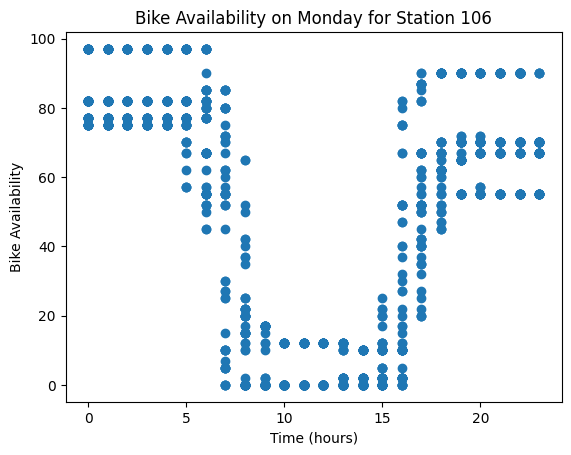

In [ ]:
# create scatter plot using the filtered DataFrame
plt.scatter(df_mondays['hour'], df_mondays['availability_percentage'])
plt.title("Bike Availability on Monday for Station 106")
plt.ylabel("Bike Availability")
plt.xlabel("Time (hours)")
plt.show()


In [ ]:

def average_bike_availability(numb):
    # filter the DataFrame to only include data for one station
    df_station = df_main.loc[df_main['number'] == numb].copy()
    # set the order of days of the week
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # create a new column to map the days of the week to a numerical order
    df_station['day_of_week_order'] = pd.Categorical(df_station['day_of_week'], categories=day_order, ordered=True)
    df_station = df_station.sort_values('day_of_week_order')


    # calculate the mean availability percentage for each hour of the day and day of the week
    df_hourly = df_station.groupby(['day_of_week_order','hour'])['availability_percentage'].mean()
    df_hourly.dropna(inplace=True)

    # plot a line plot of the data
    df_hourly.plot(kind='line', figsize=(10,8))

    plt.title(f"Average Bike Availability for Station {numb} over the Week")
    plt.xlabel("Day of the Week")
    plt.ylabel("Bike Availability")
    plt.ylim(0, 100)
    plt.show()


### Import static bike numbers


In [ ]:
# we just need to create a collect csv files for both and put them in here
df_static = pd.read_csv('static_30_3_23.csv')
df_static.head()

number contract_name                  name               address  \
0      42        dublin      SMITHFIELD NORTH      Smithfield North   
1      30        dublin  PARNELL SQUARE NORTH  Parnell Square North   
2      54        dublin        CLONMEL STREET        Clonmel Street   
3     108        dublin         AVONDALE ROAD         Avondale Road   
4      20        dublin     JAMES STREET EAST     James Street East   

   position_lat  position_lng  banking  bonus  
0     53.349562     -6.278198        0      0  
1     53.353742     -6.265301        0      0  
2     53.336021     -6.262980        0      0  
3     53.359405     -6.276142        0      0  
4     53.336597     -6.248109        0      0

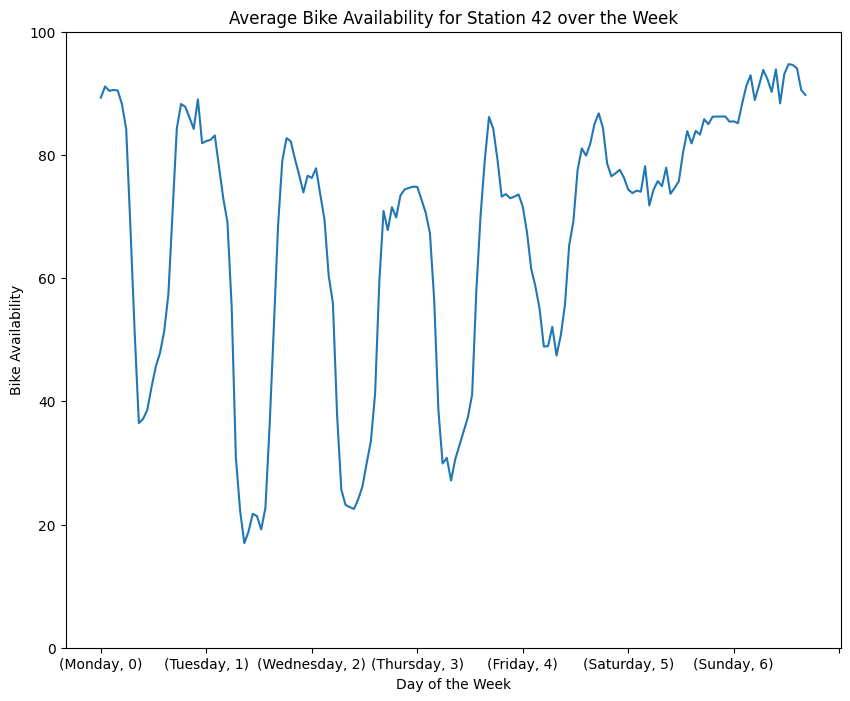

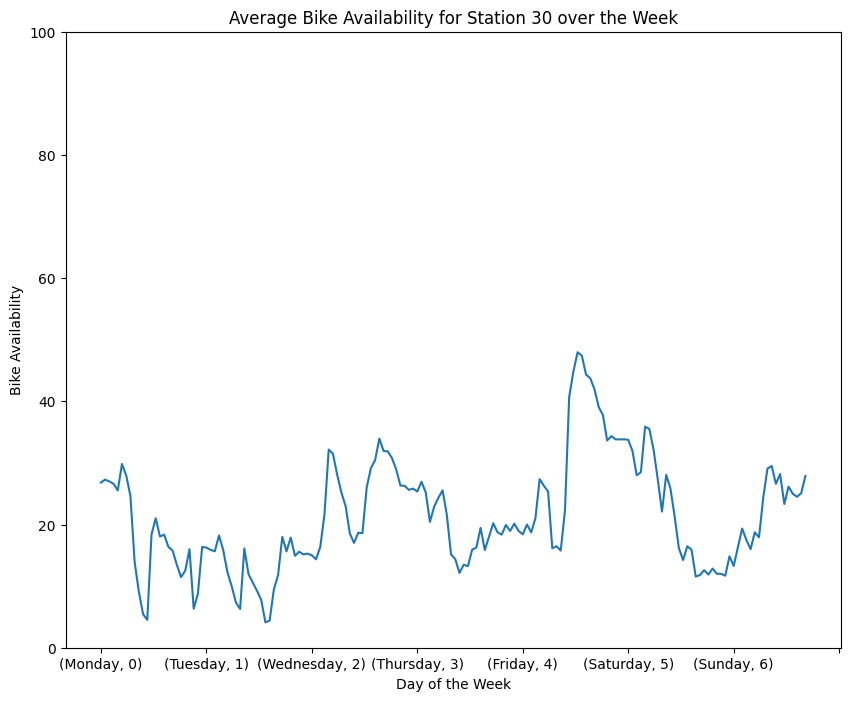

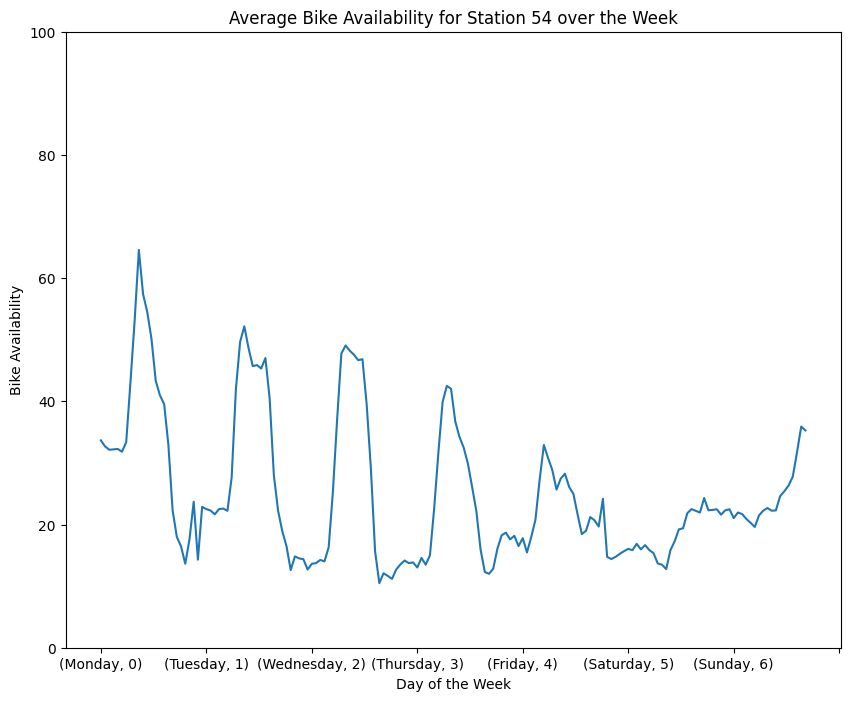

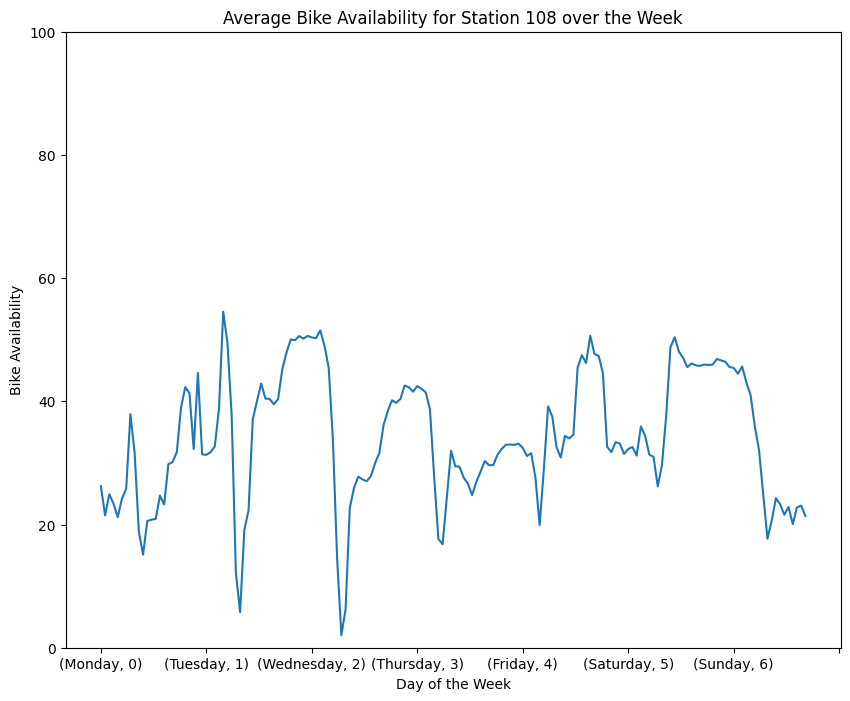

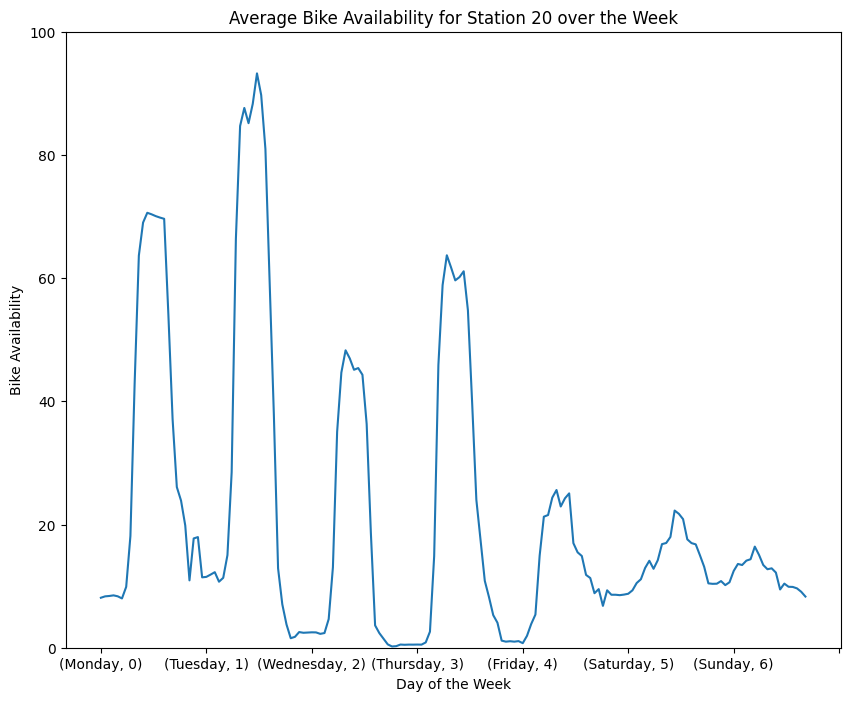

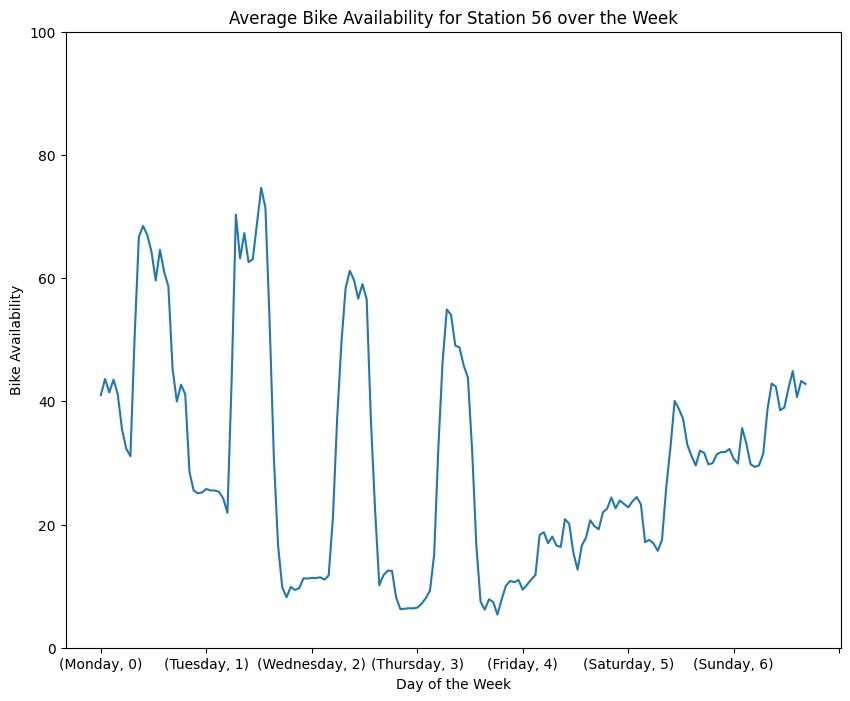

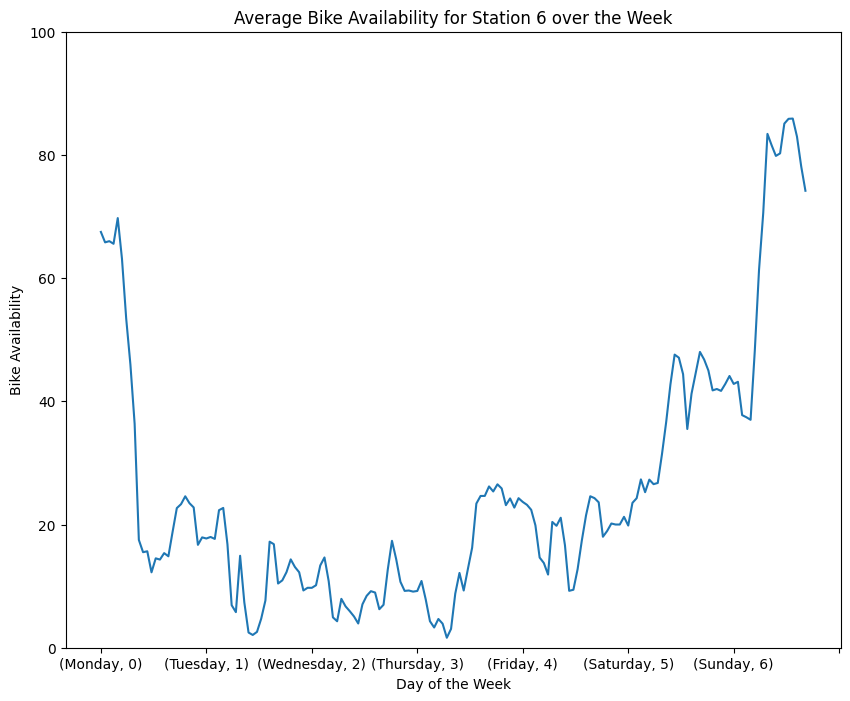

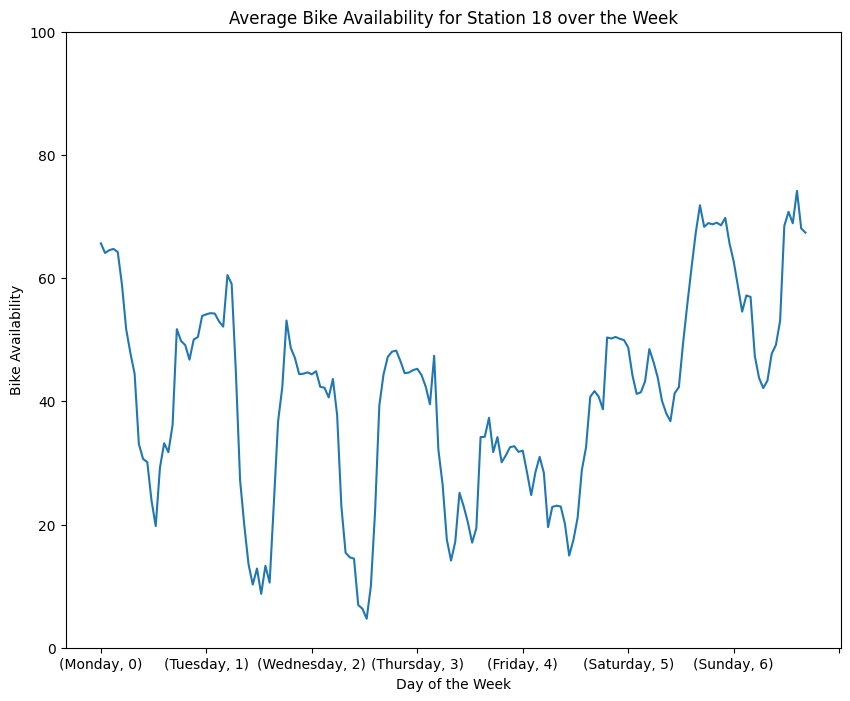

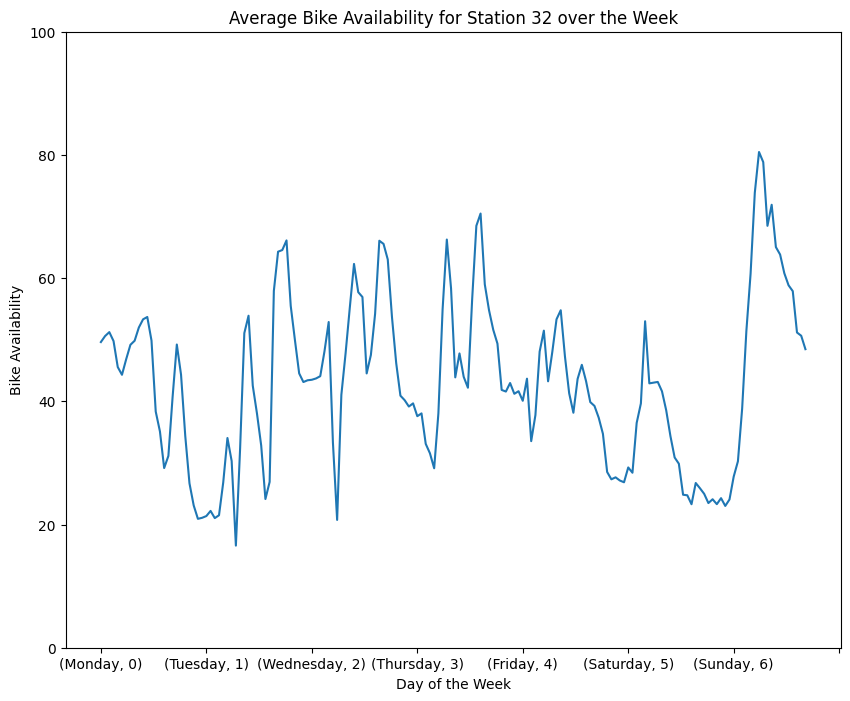

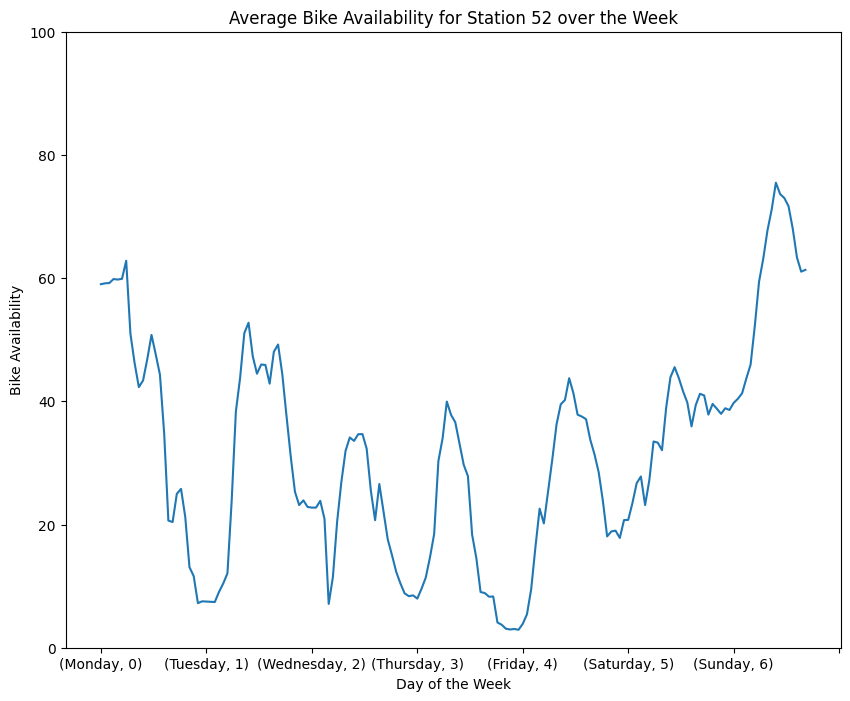

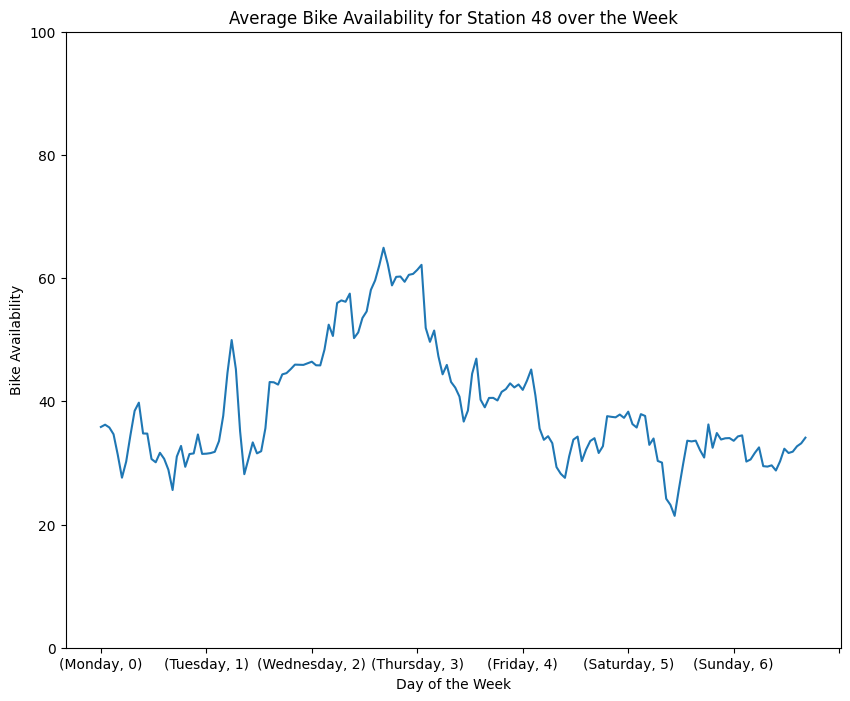

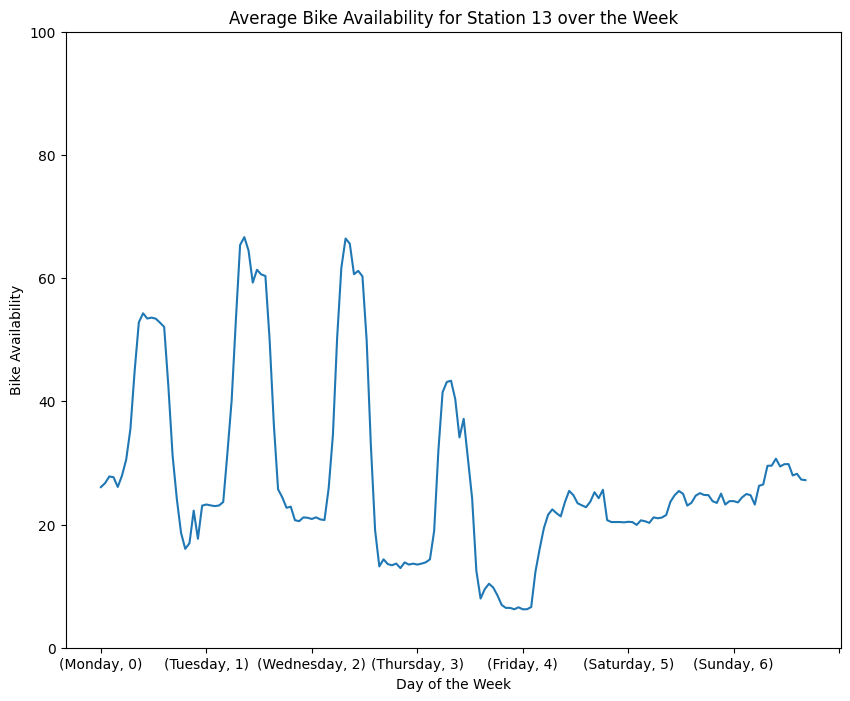

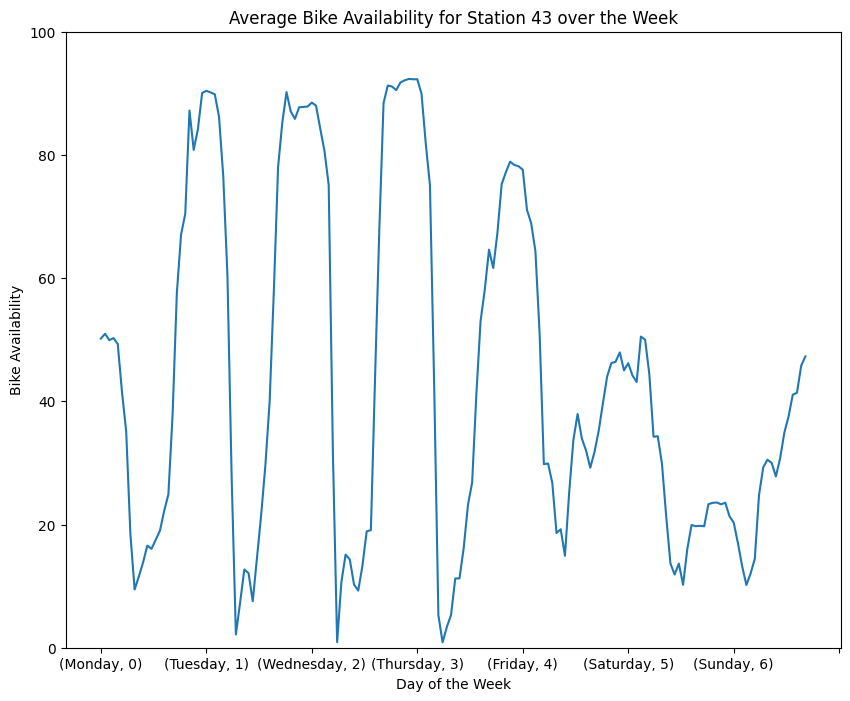

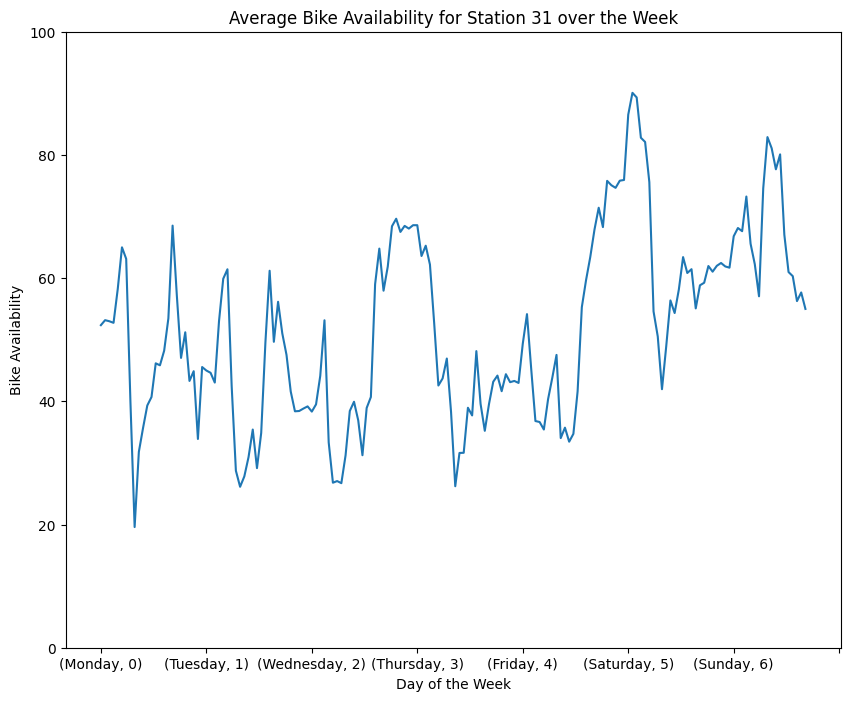

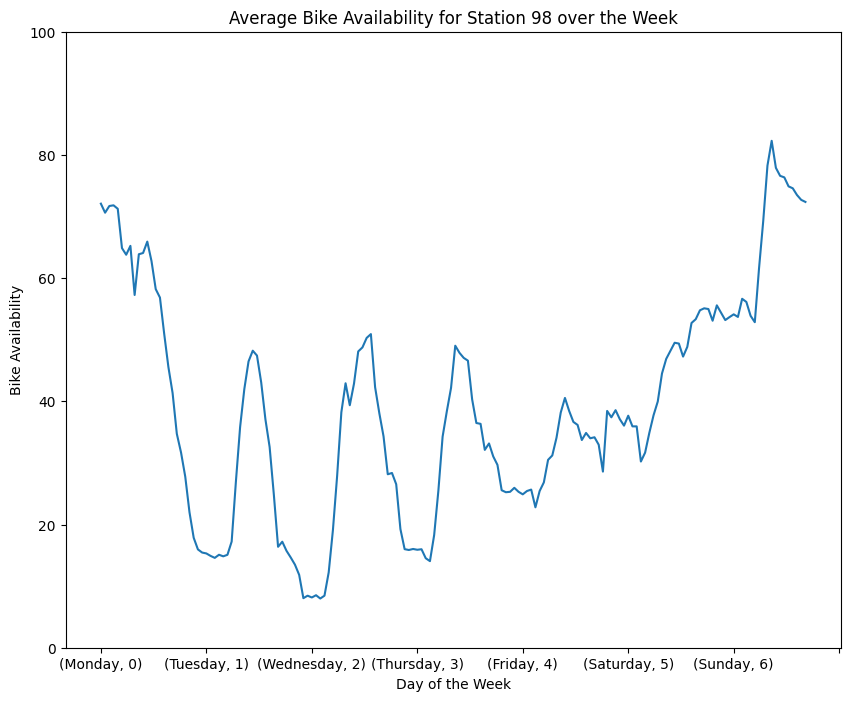

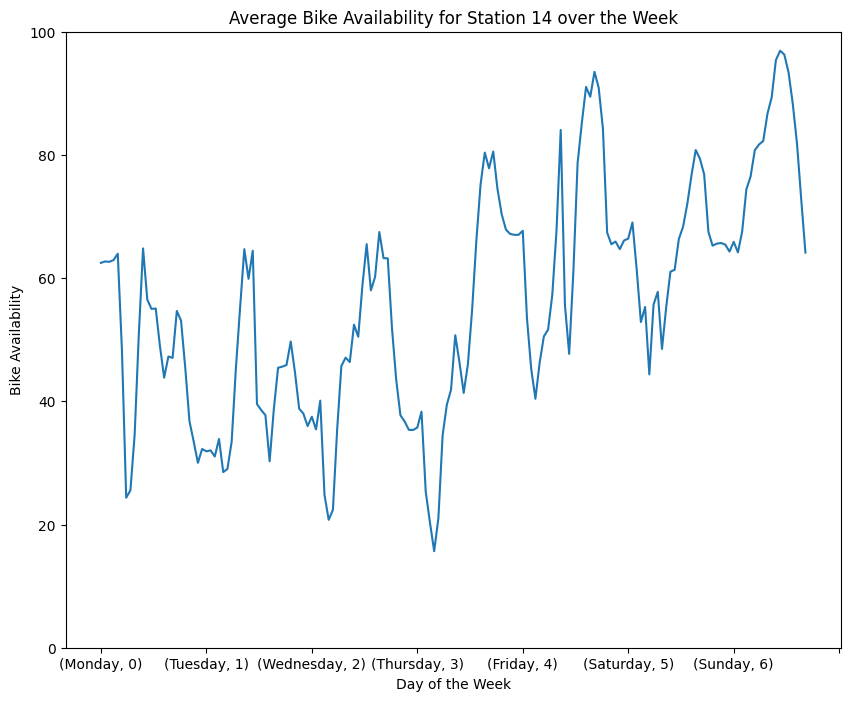

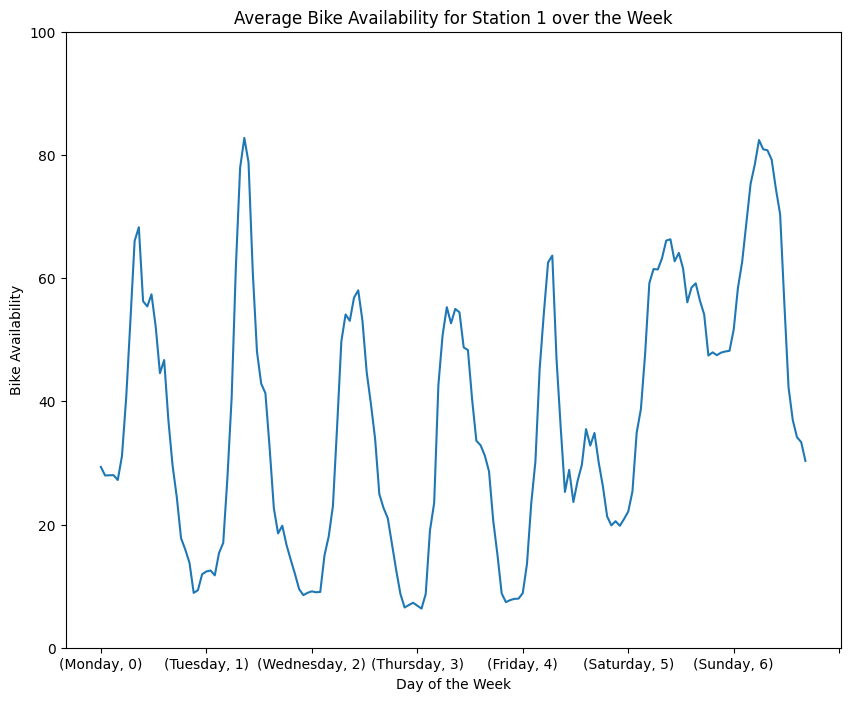

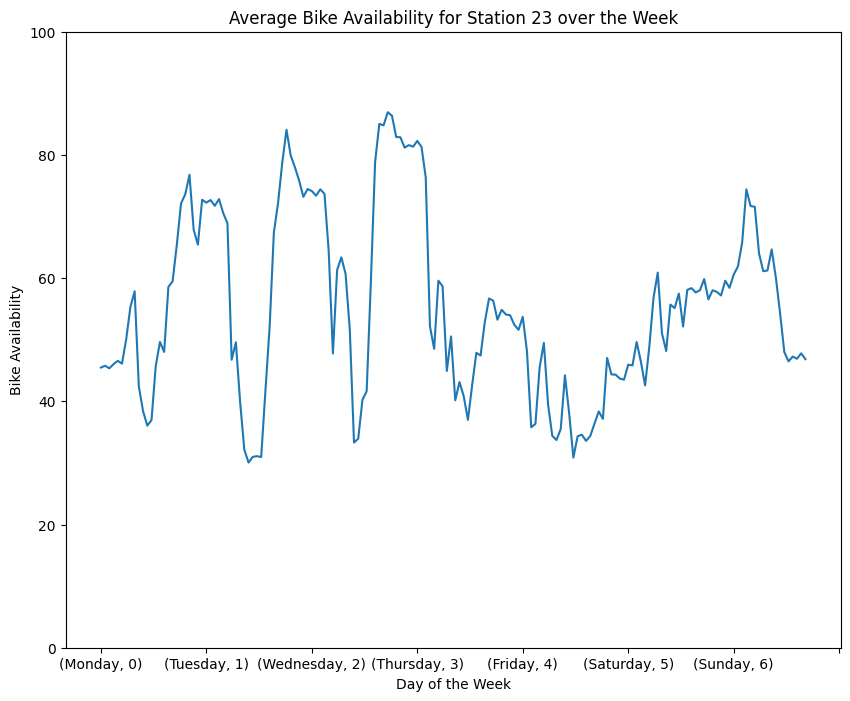

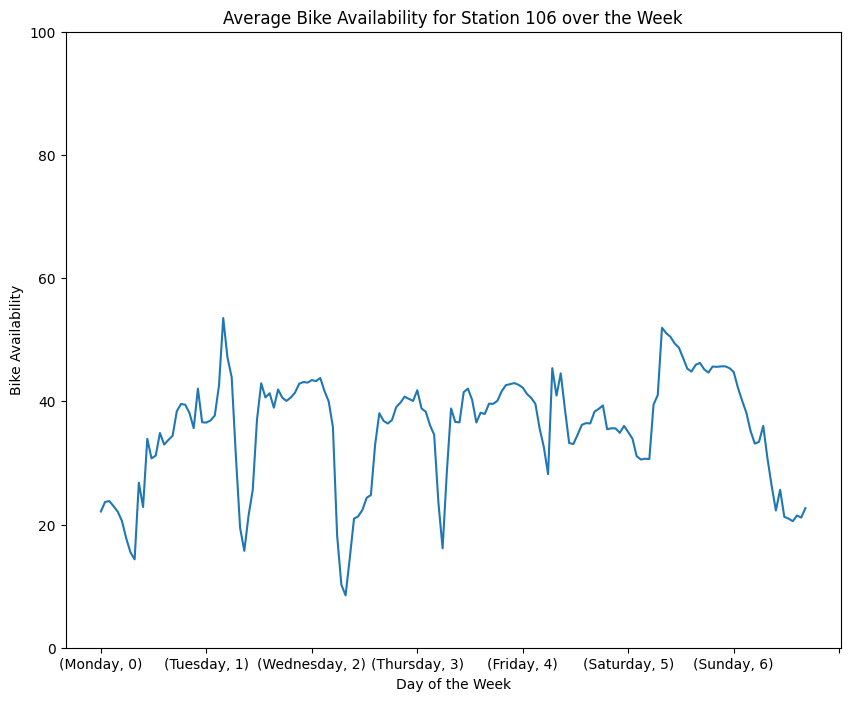

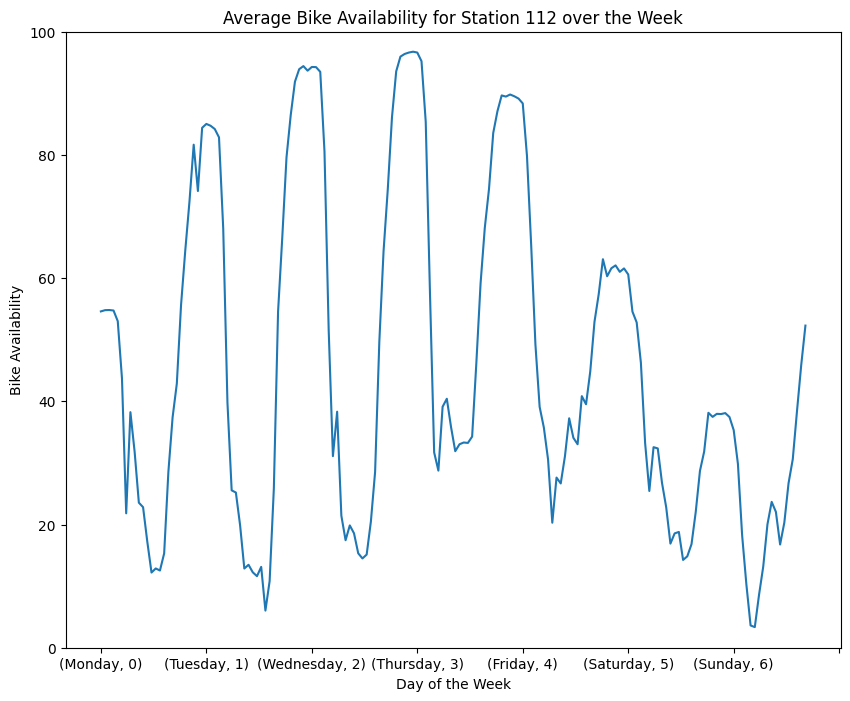

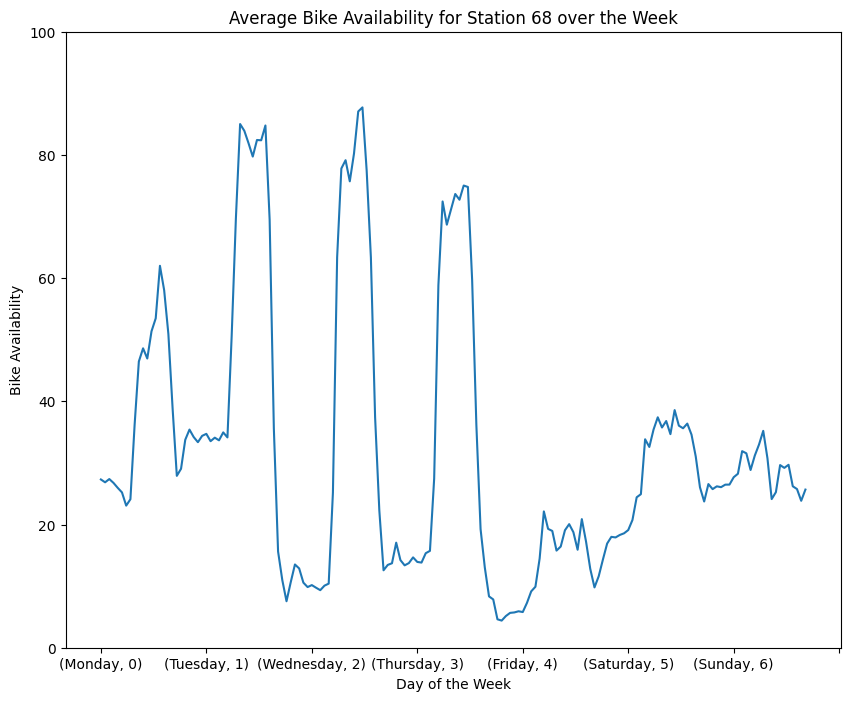

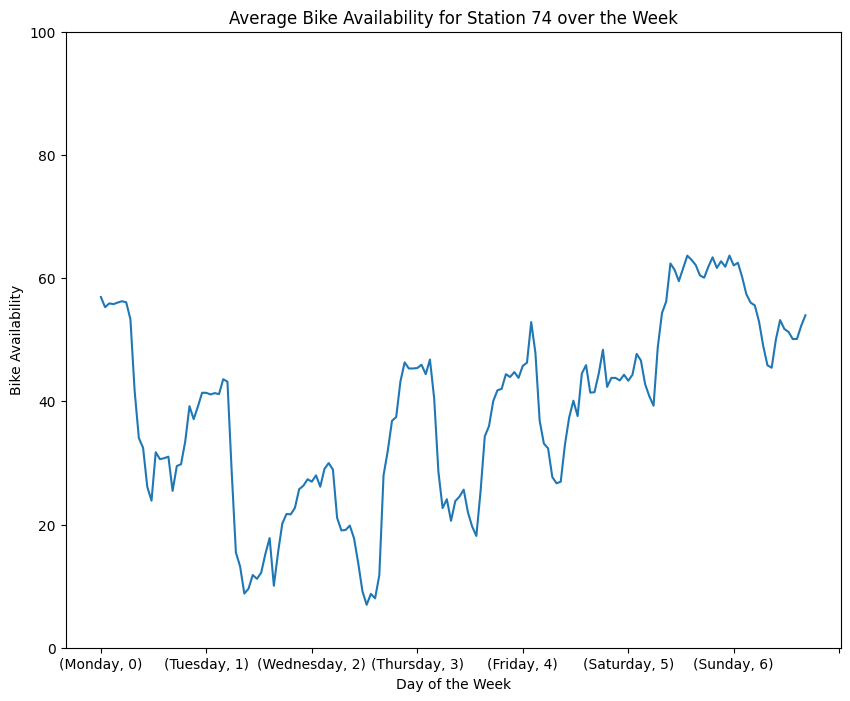

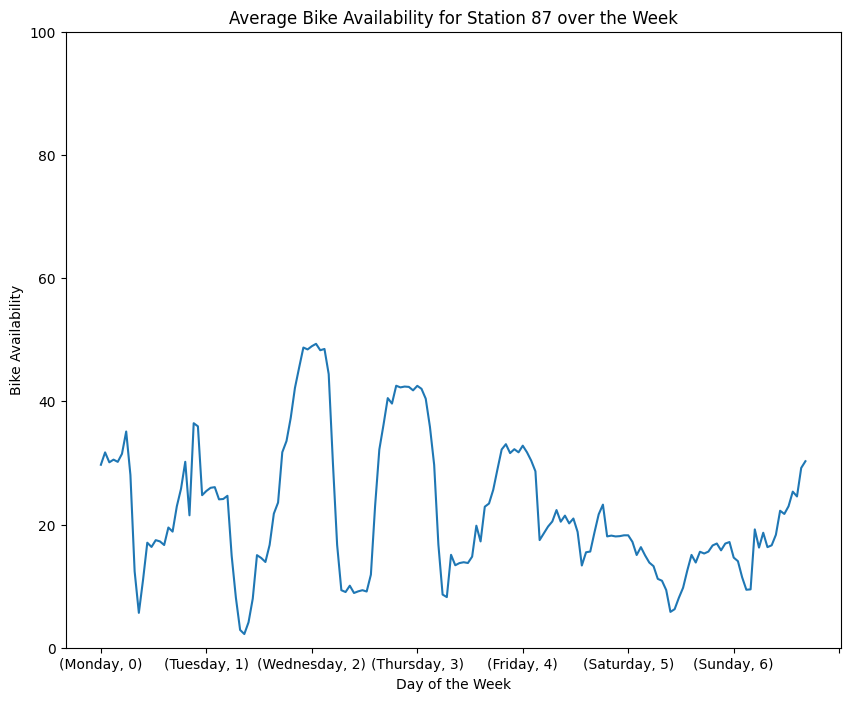

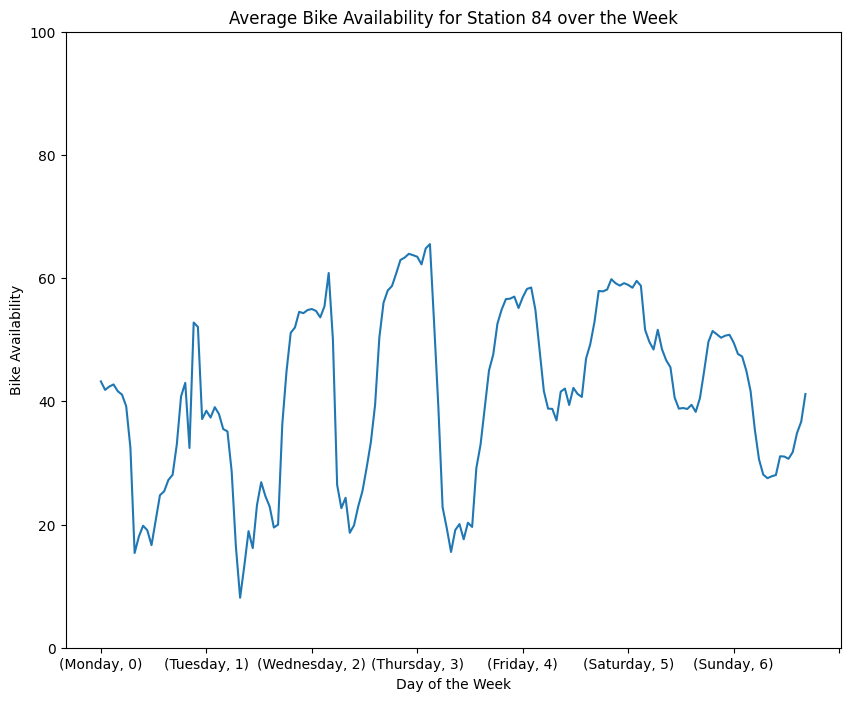

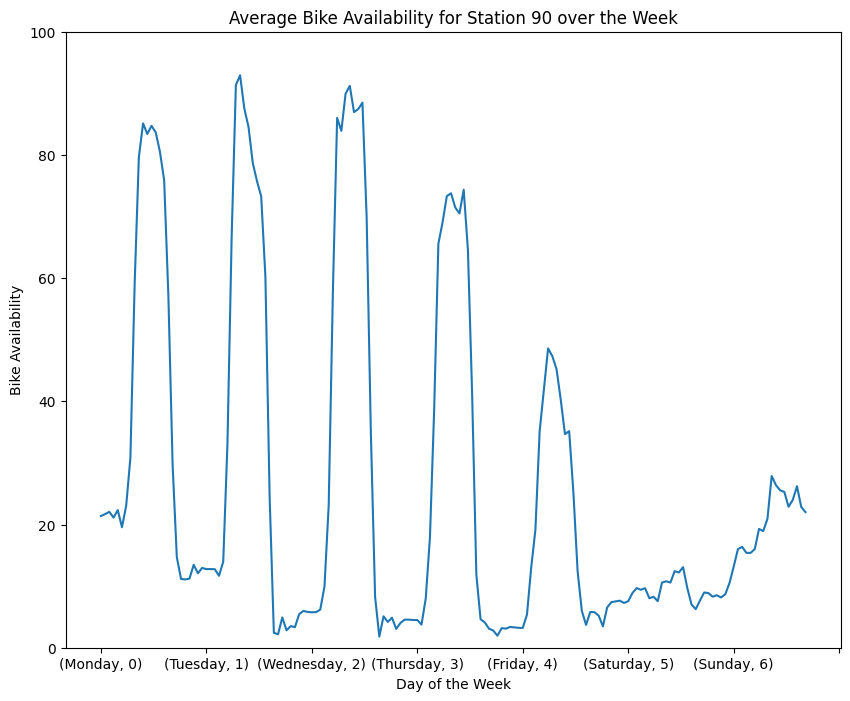

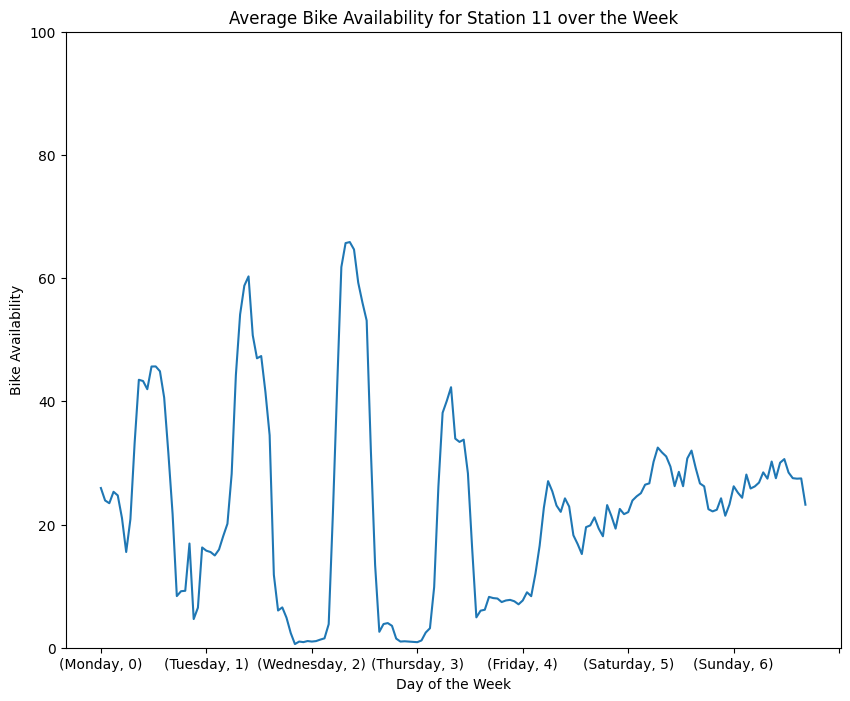

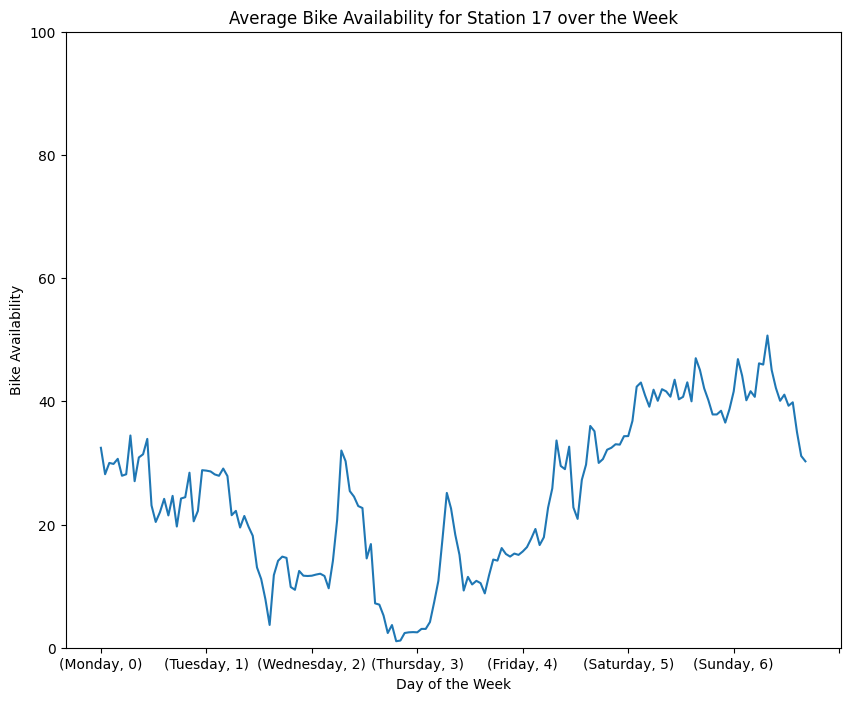

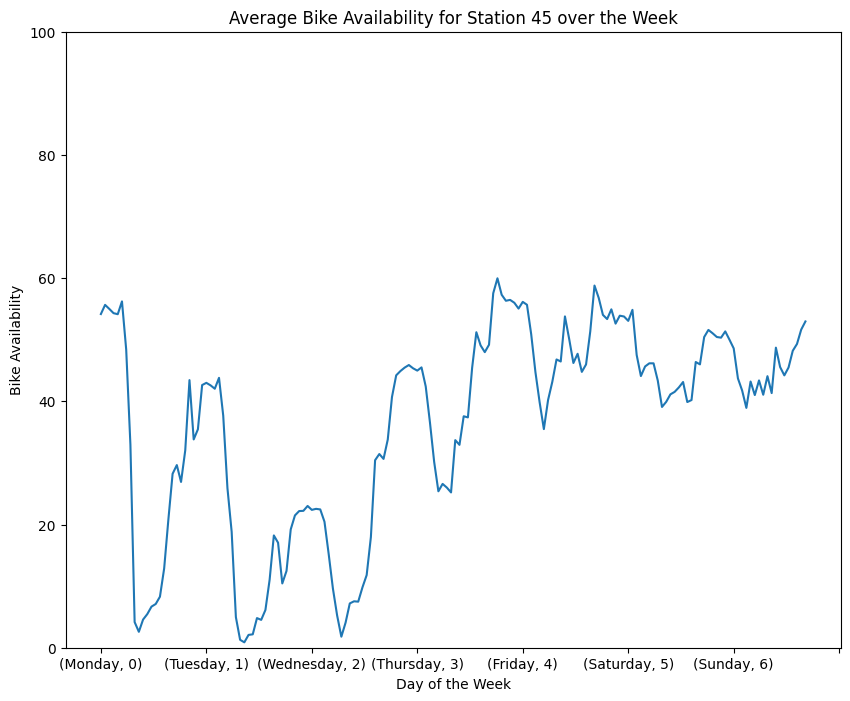

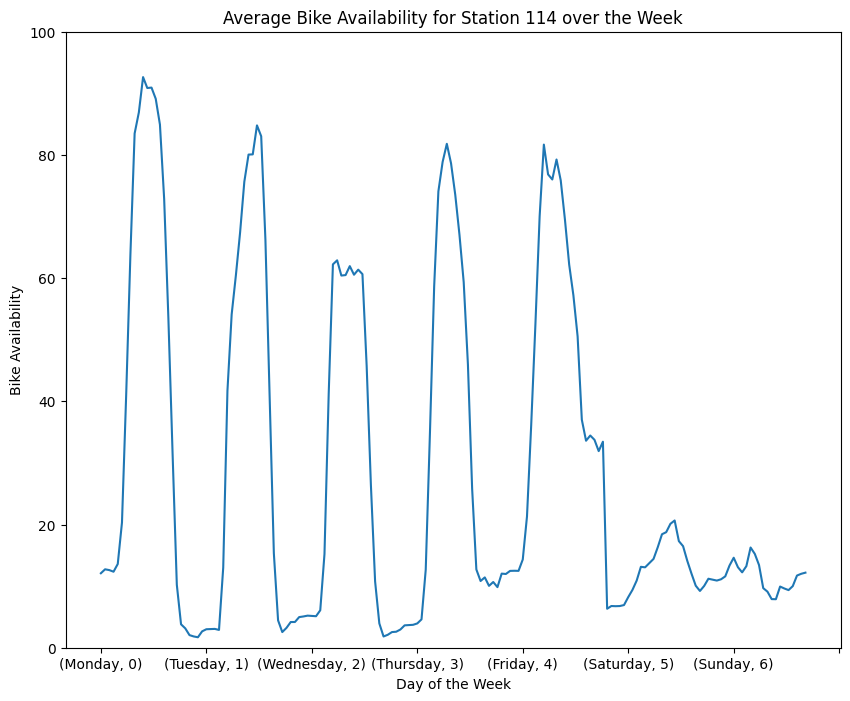

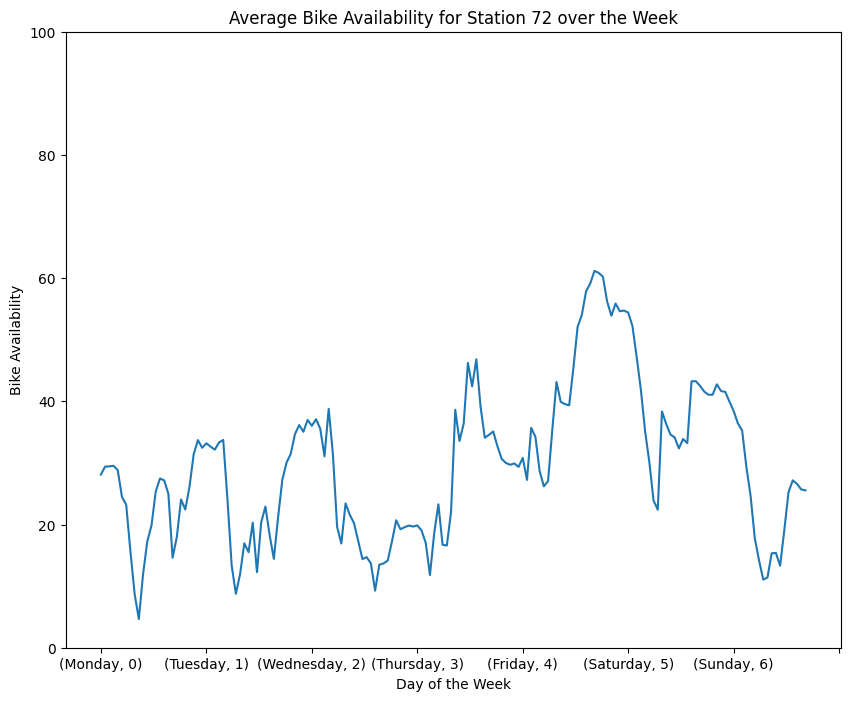

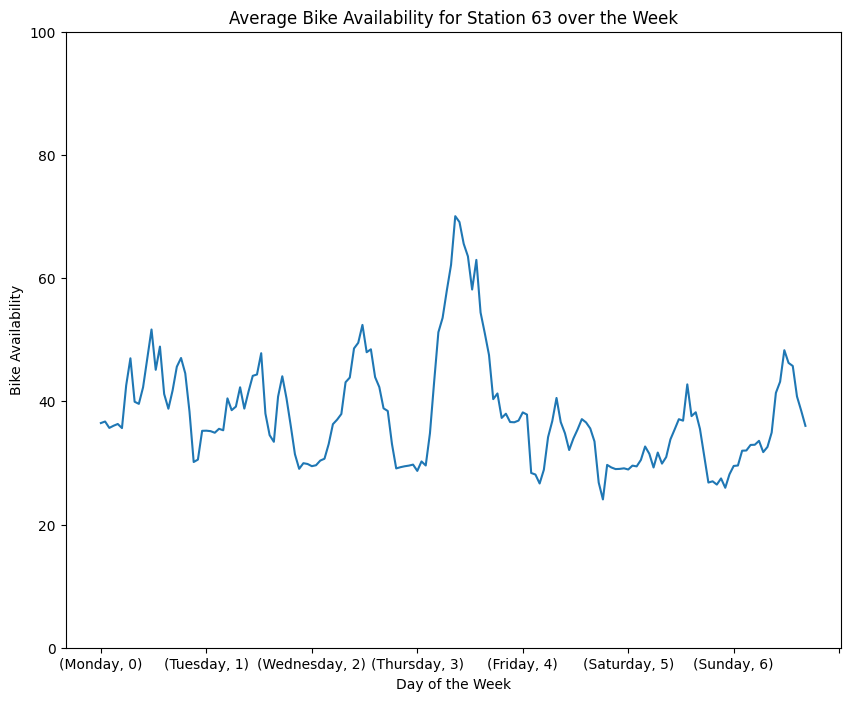

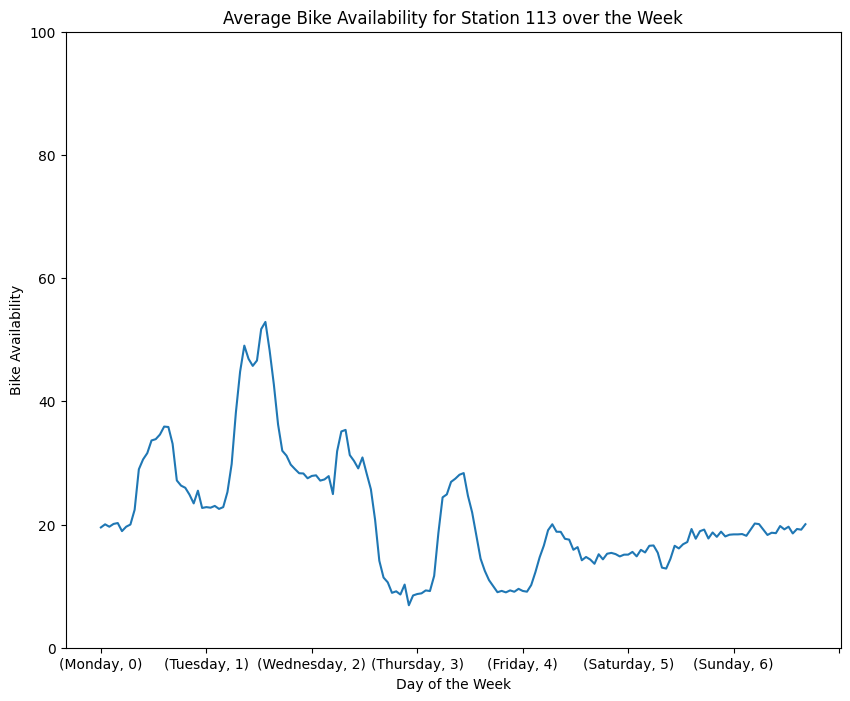

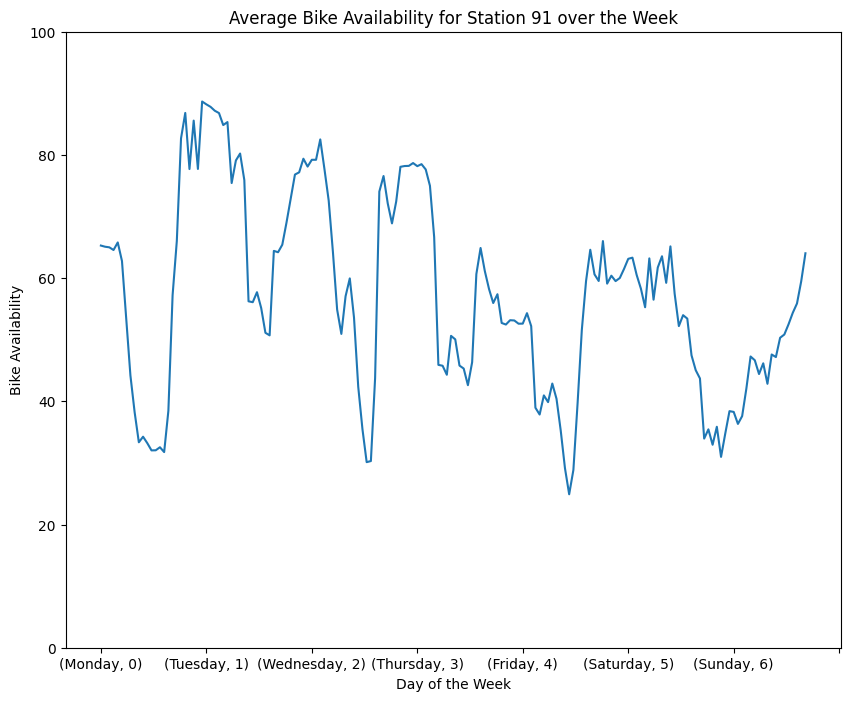

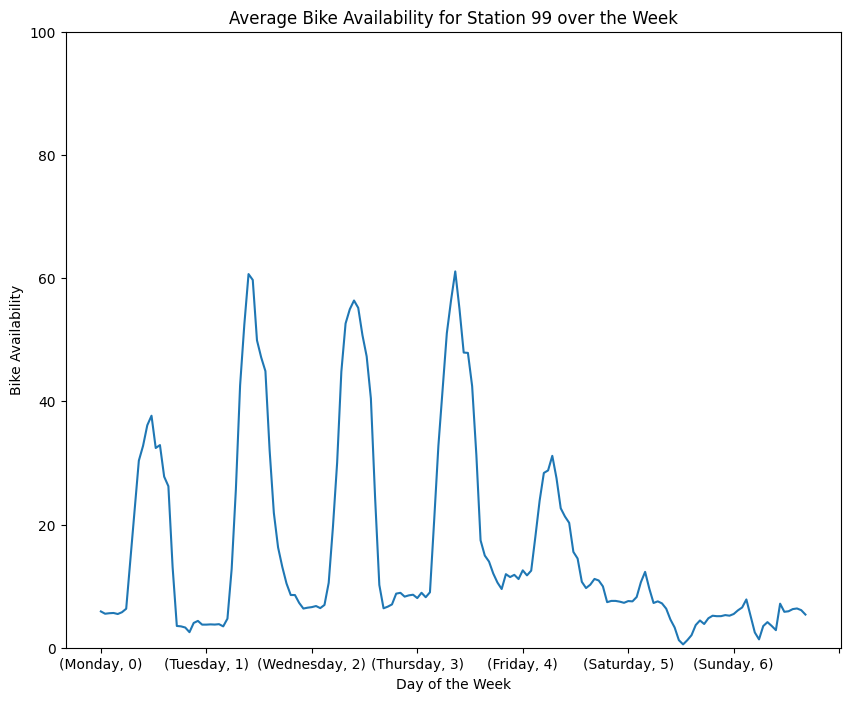

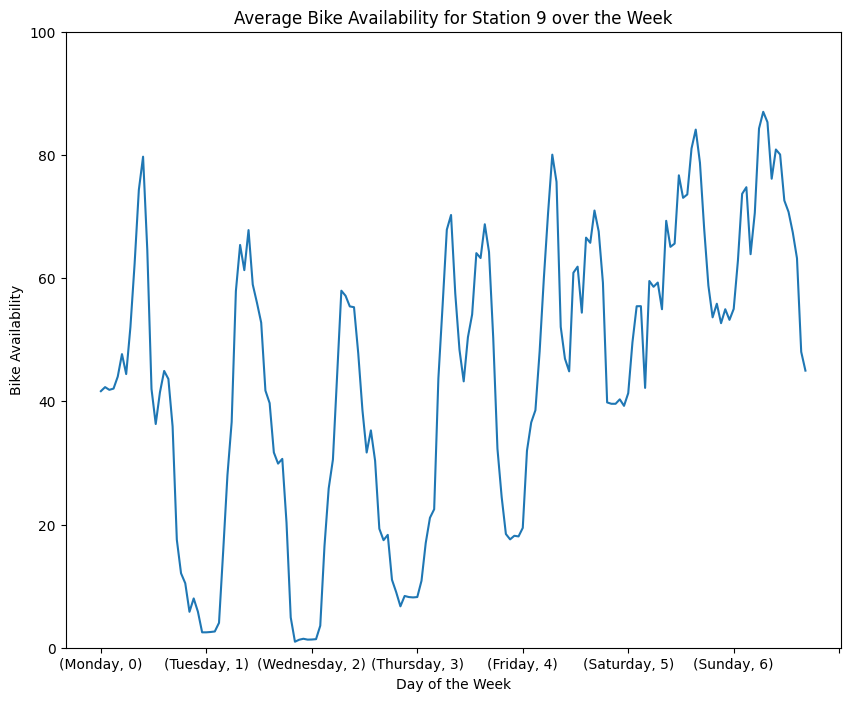

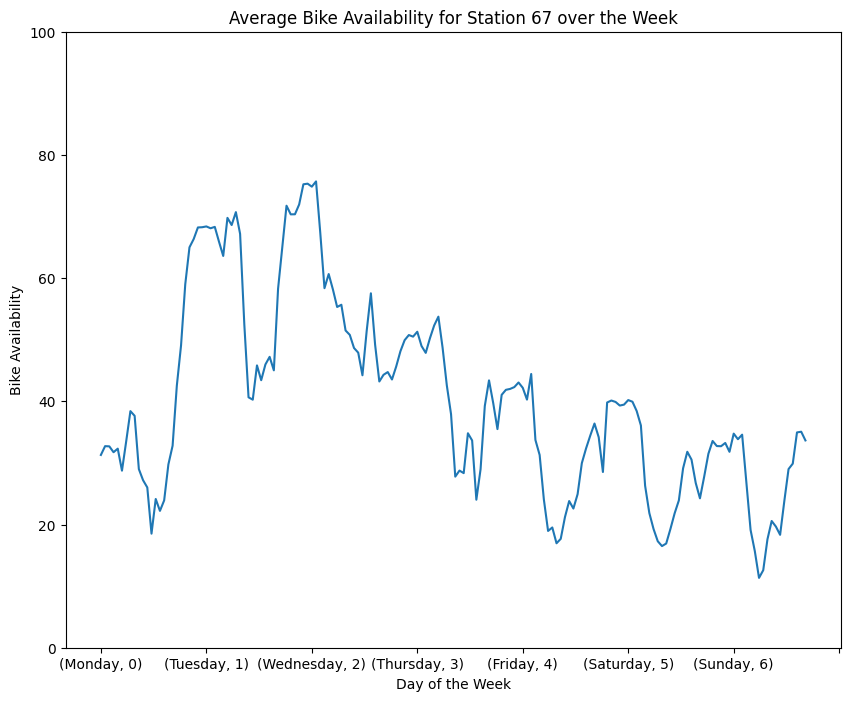

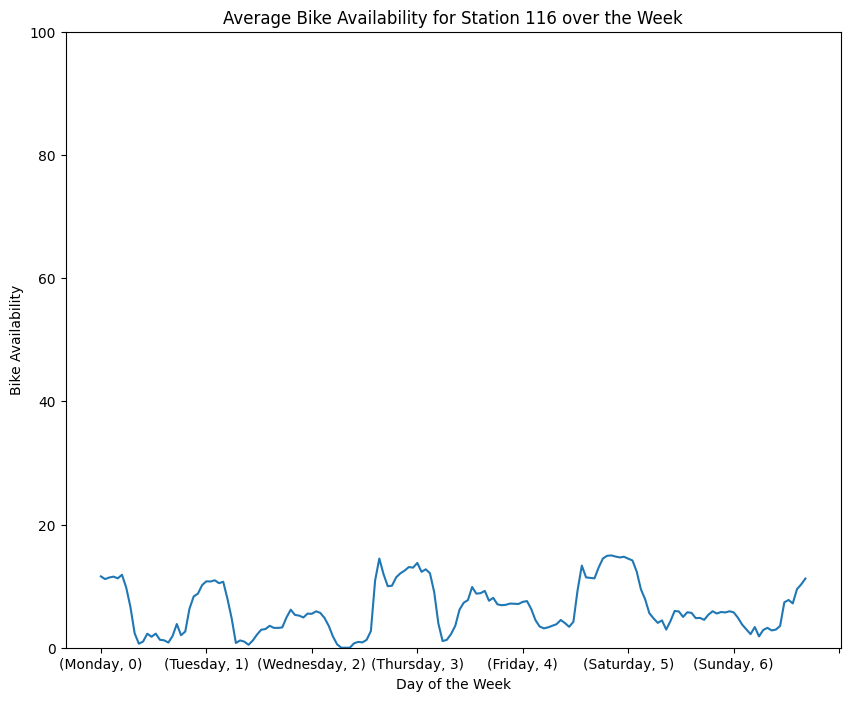

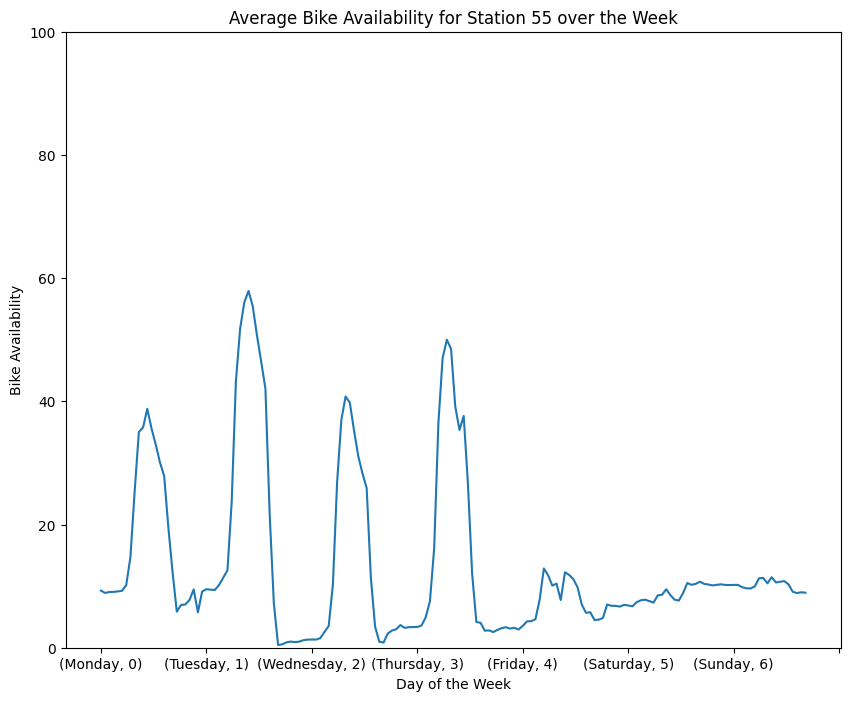

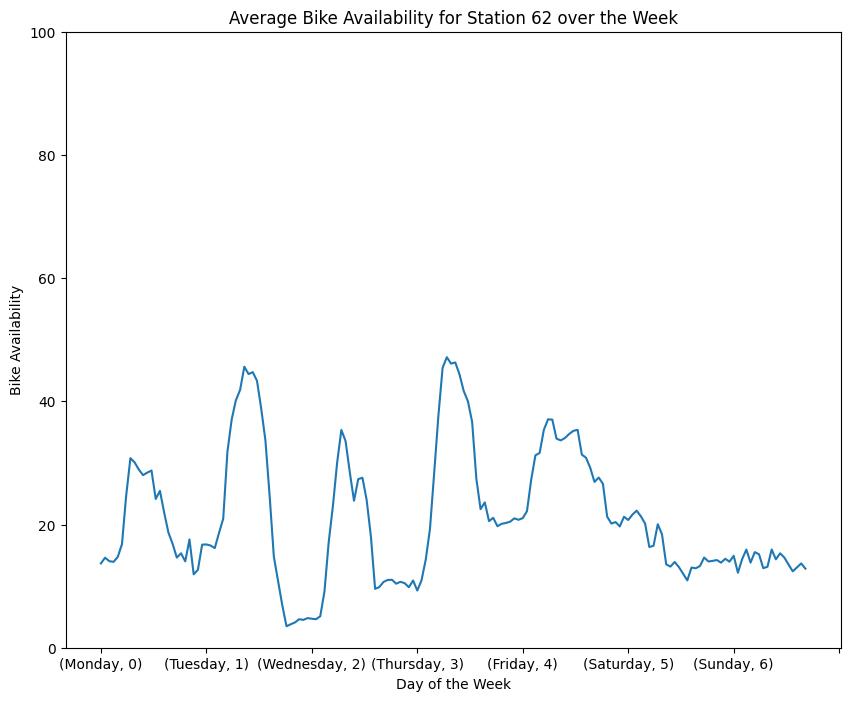

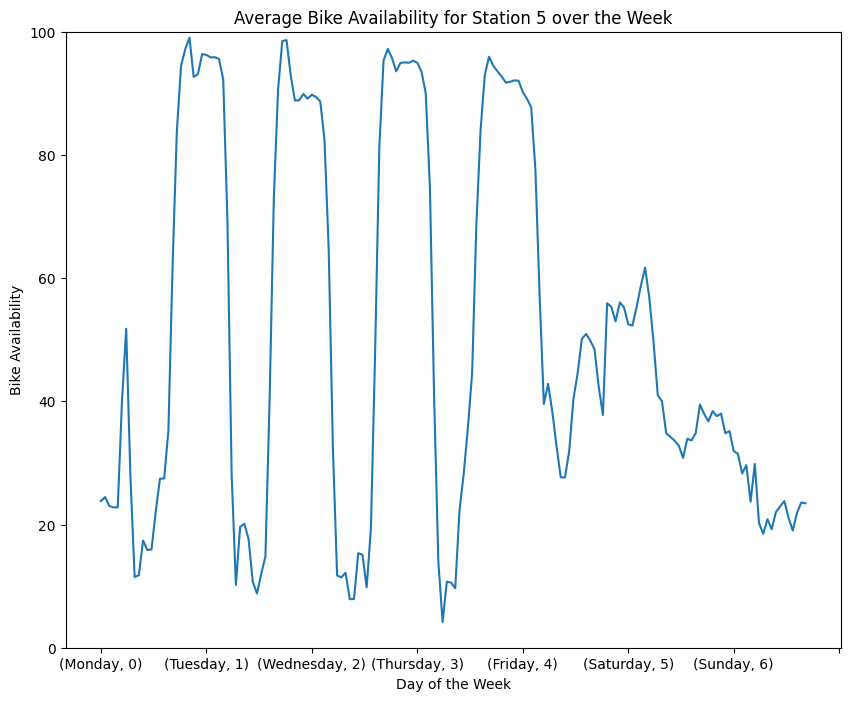

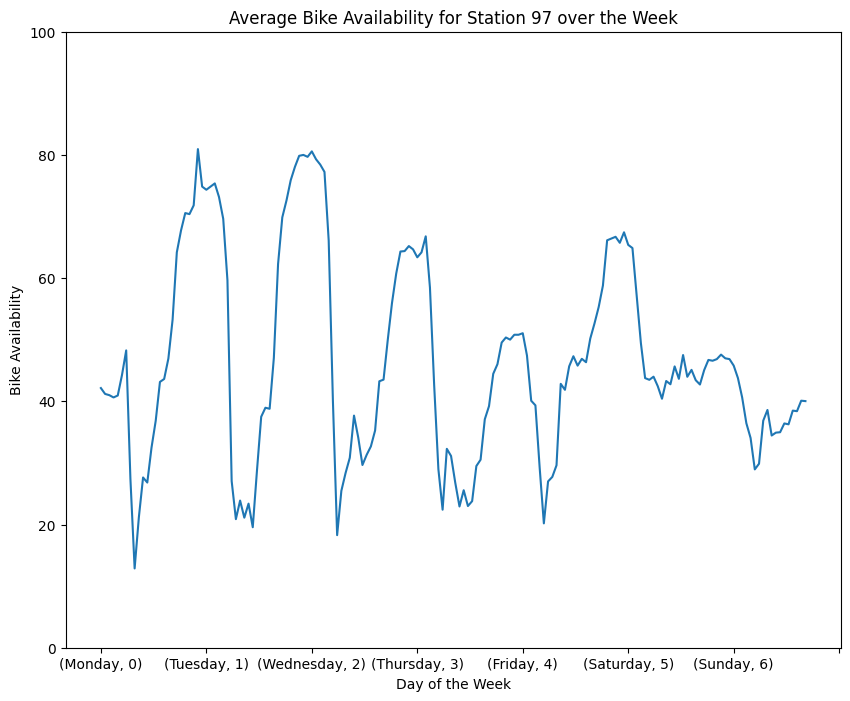

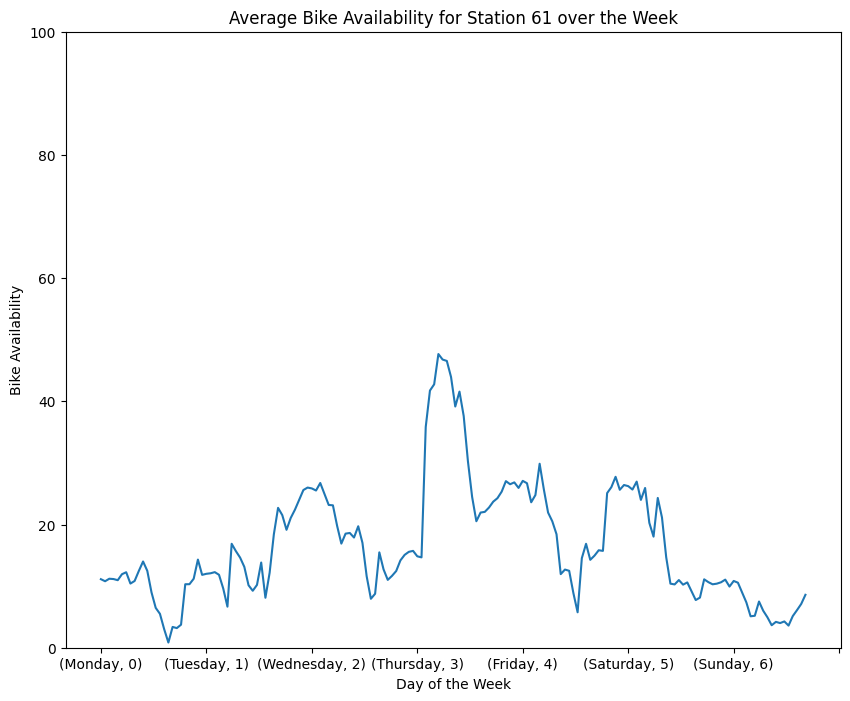

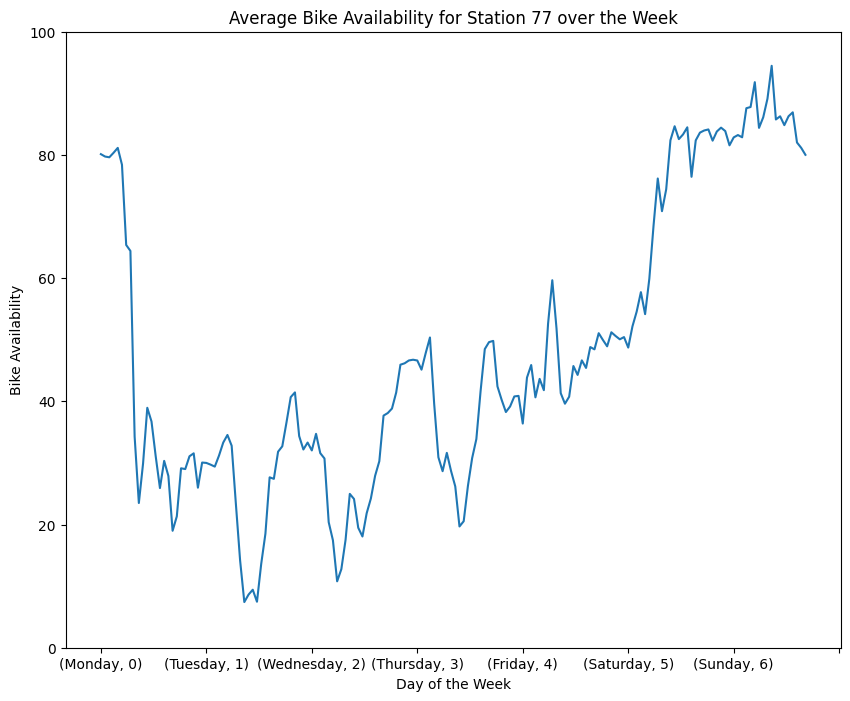

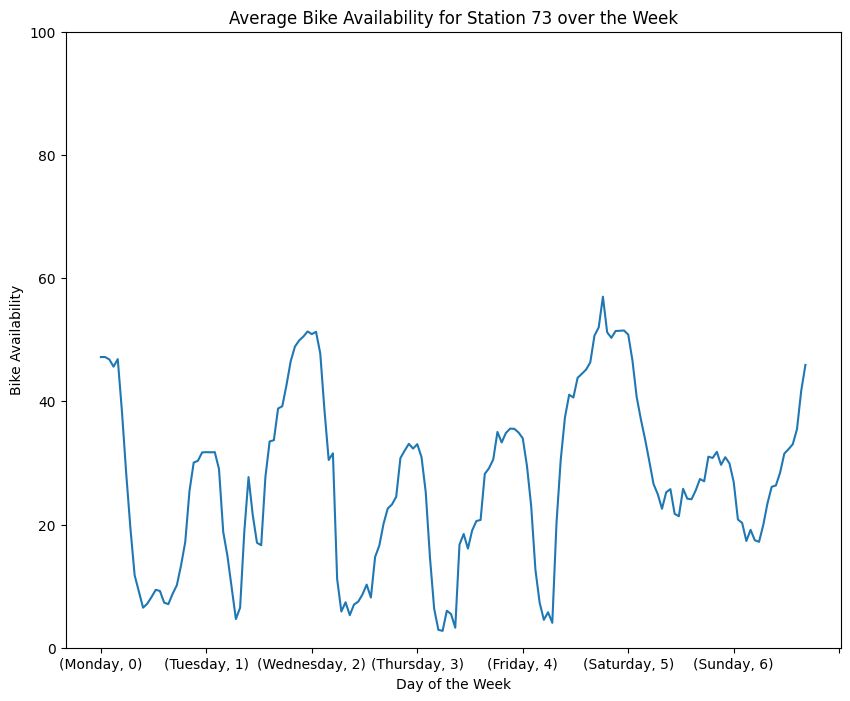

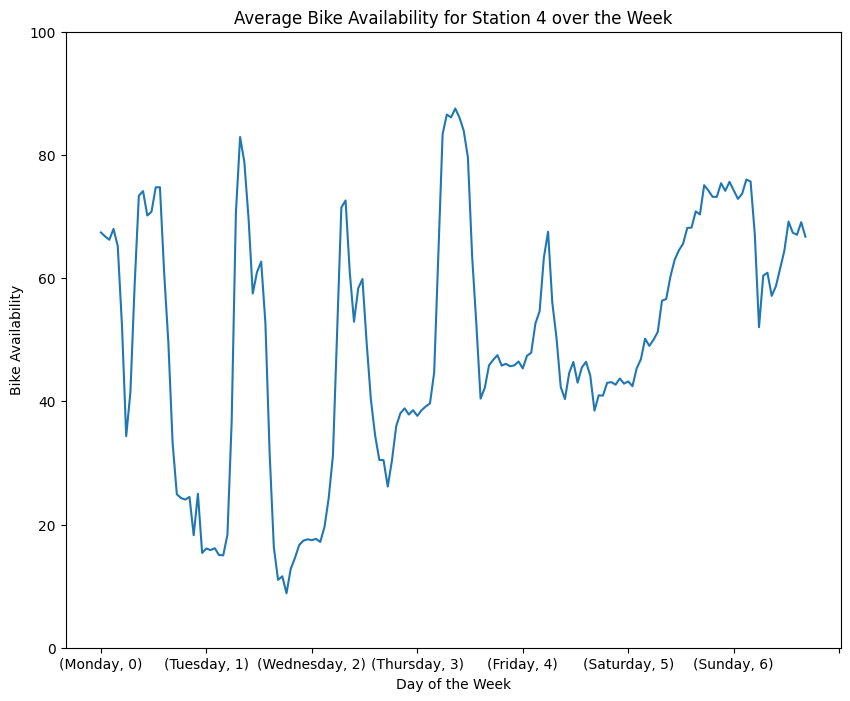

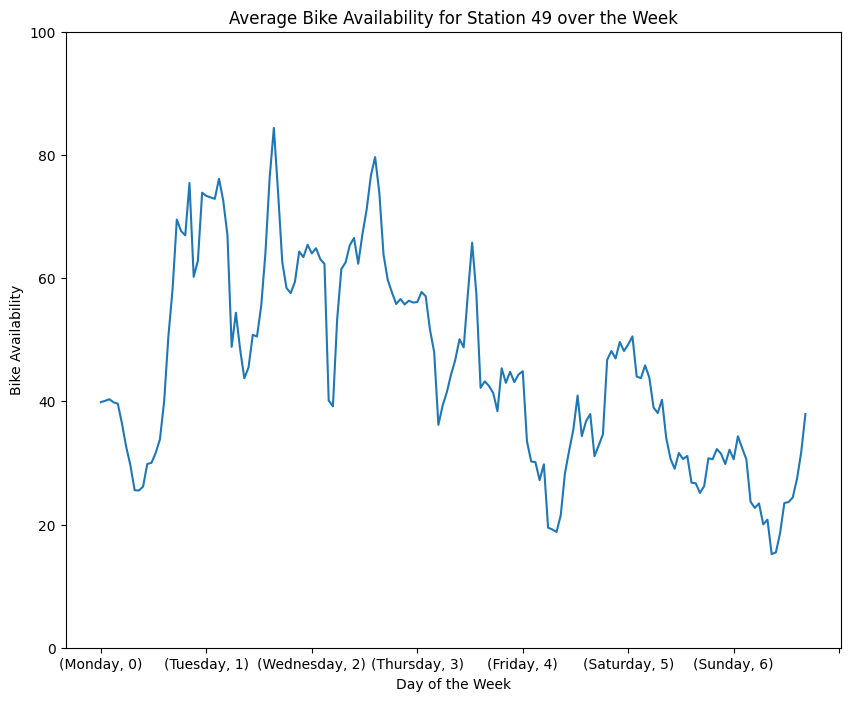

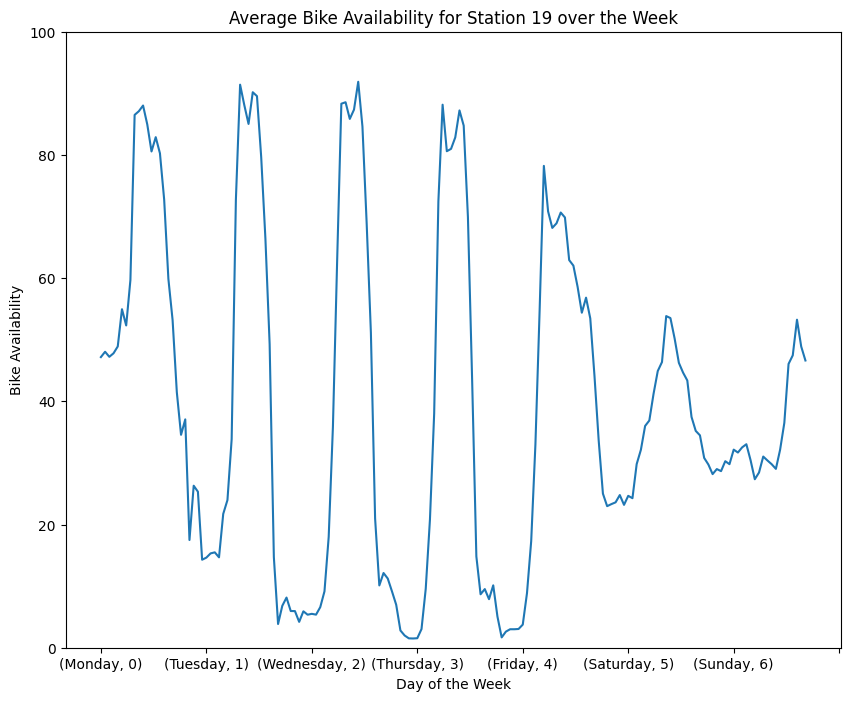

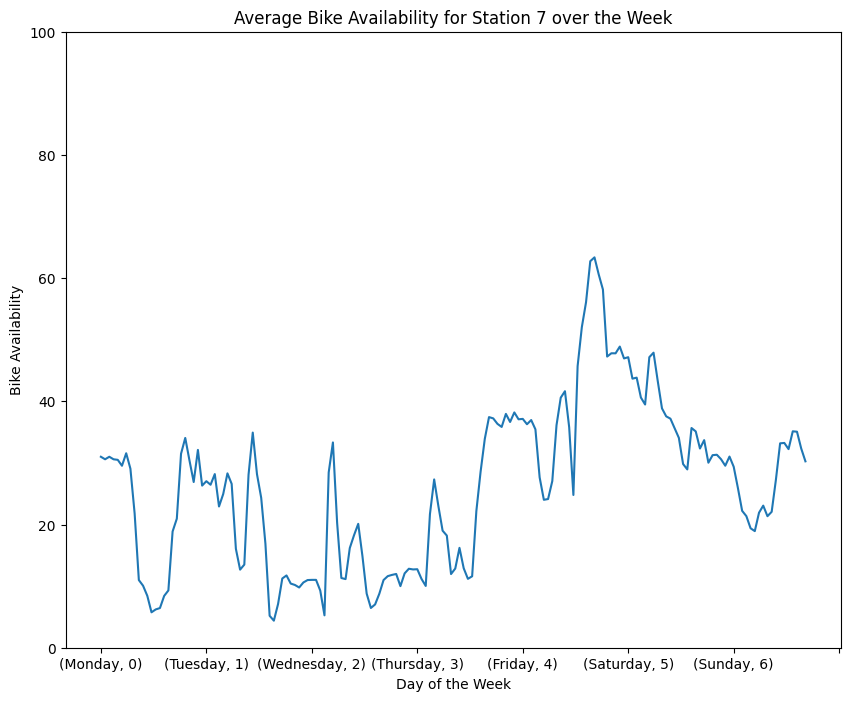

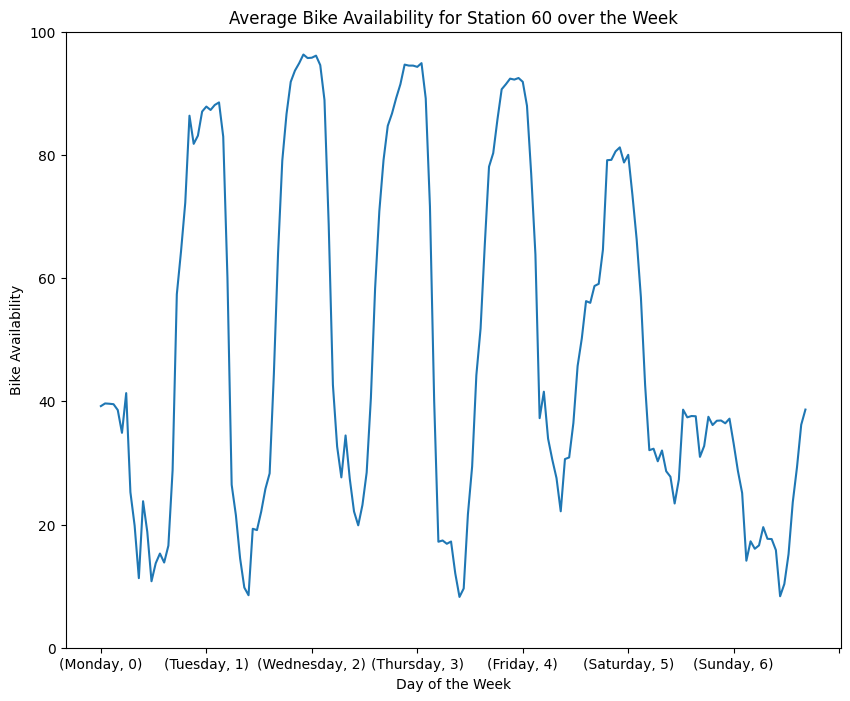

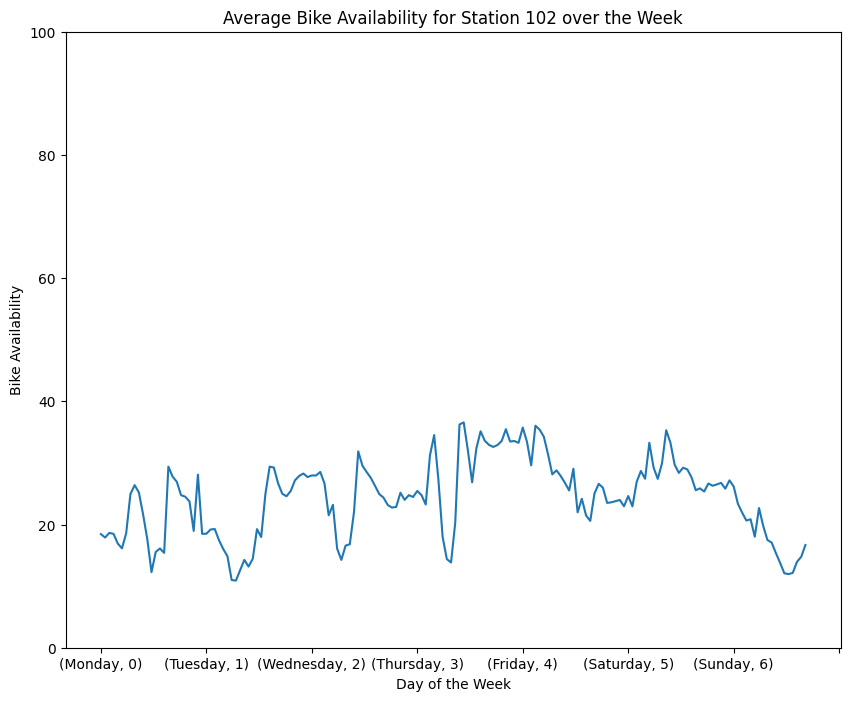

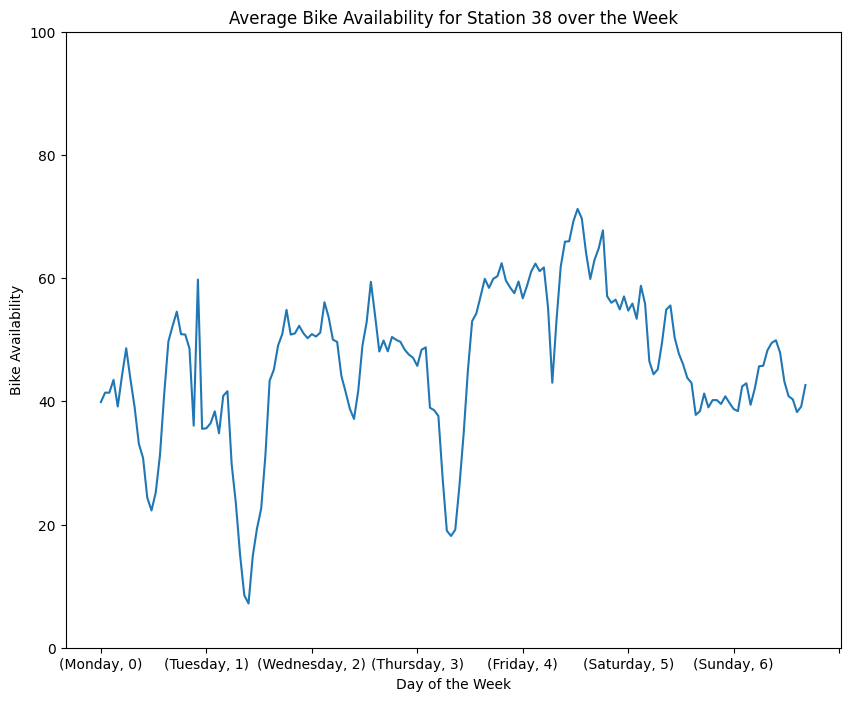

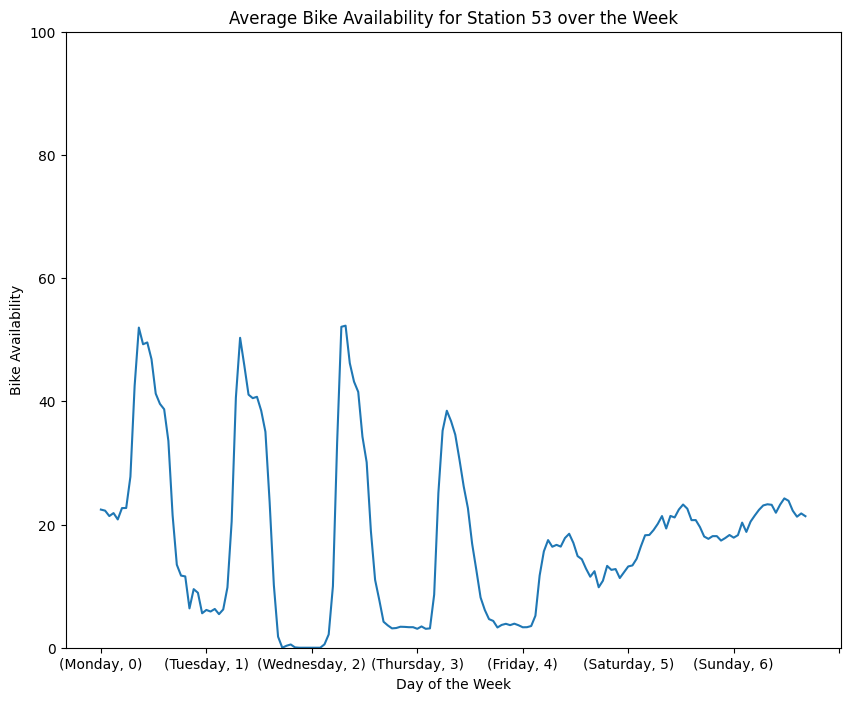

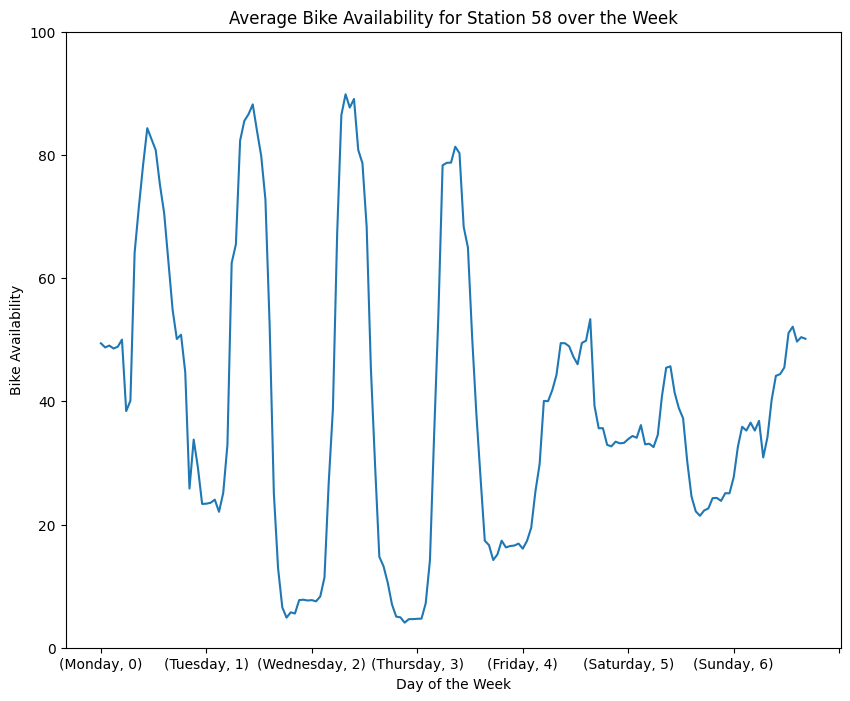

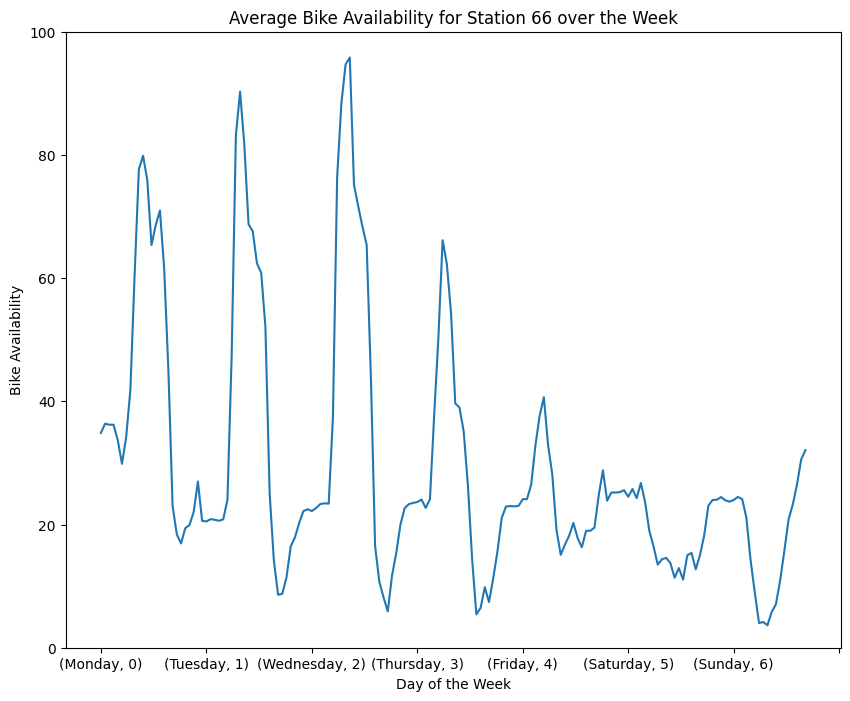

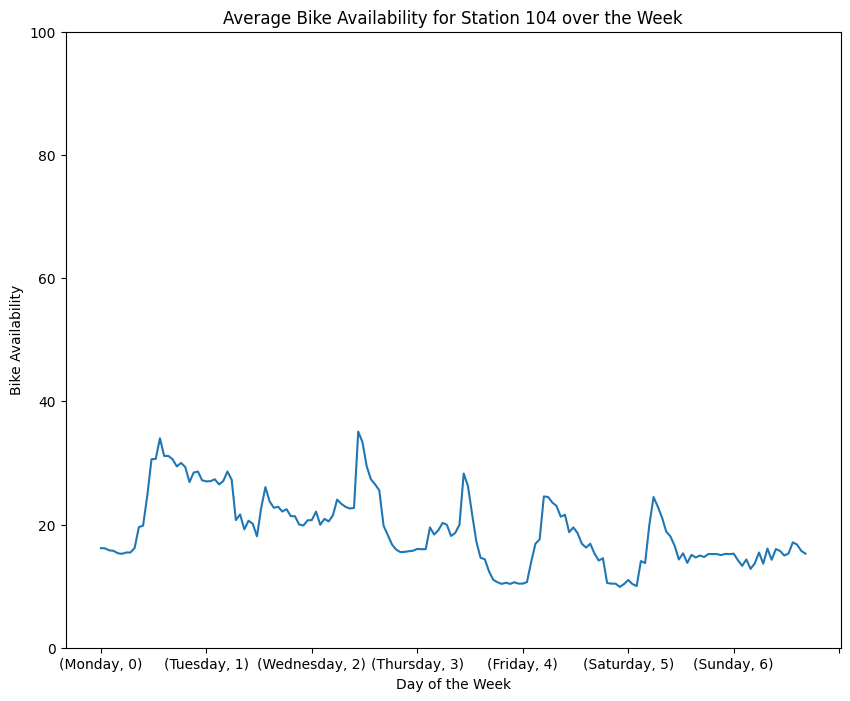

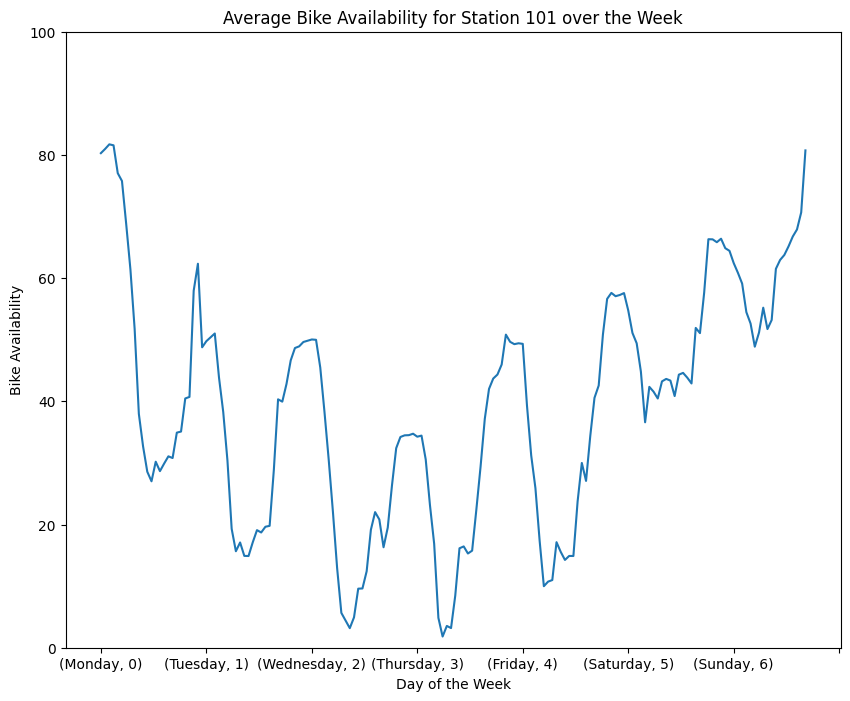

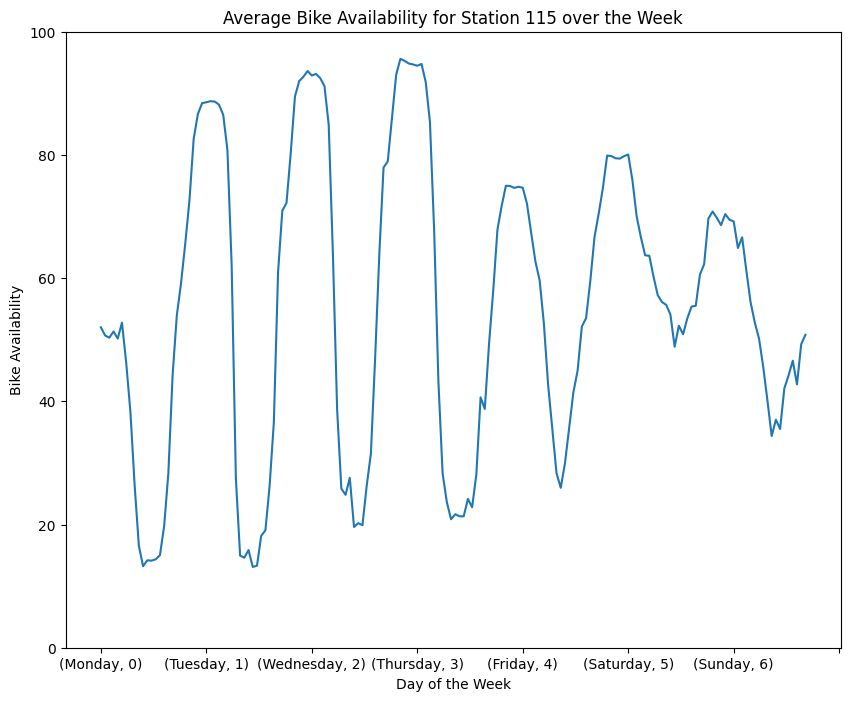

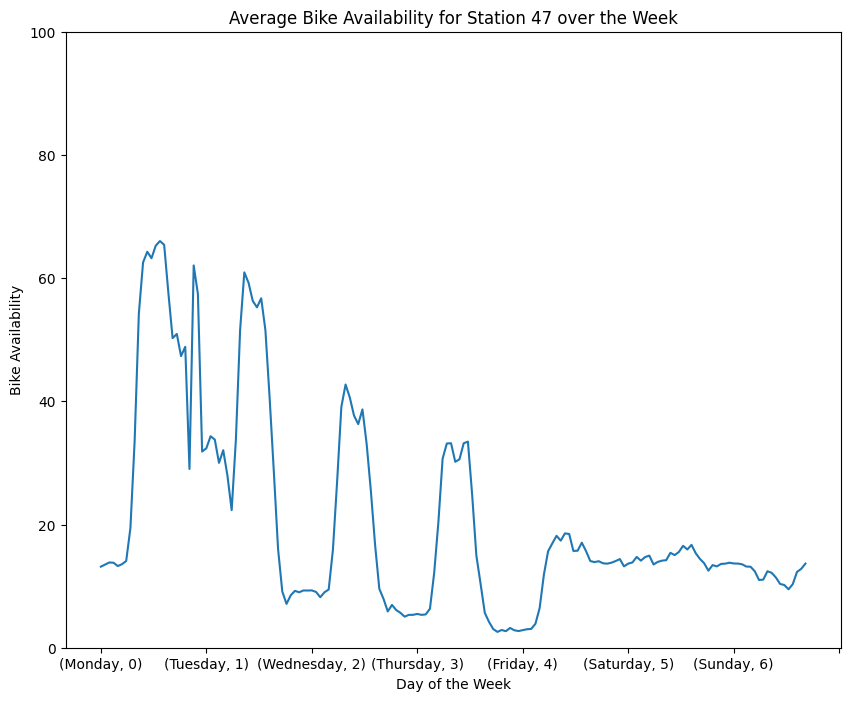

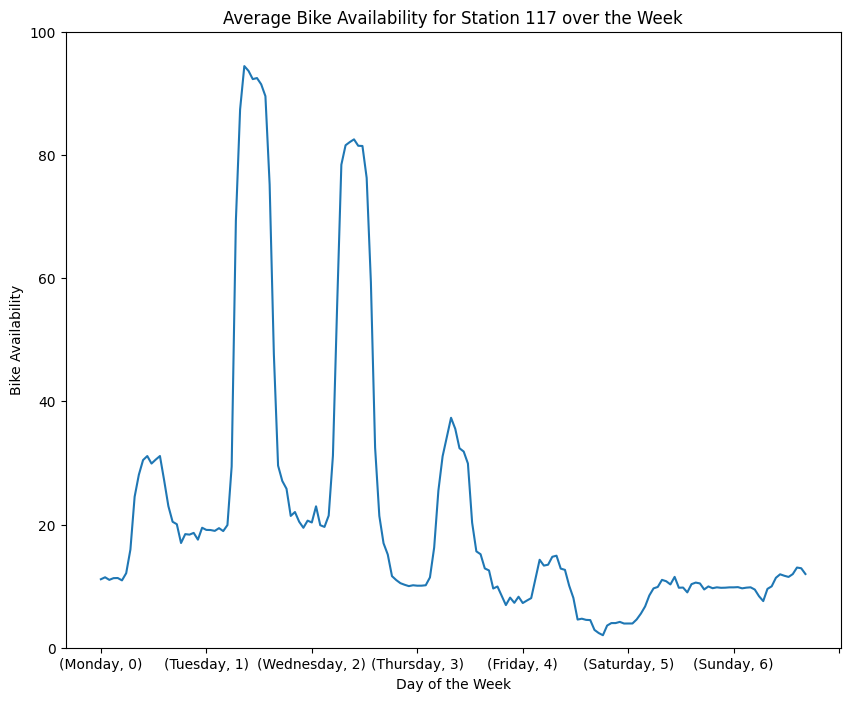

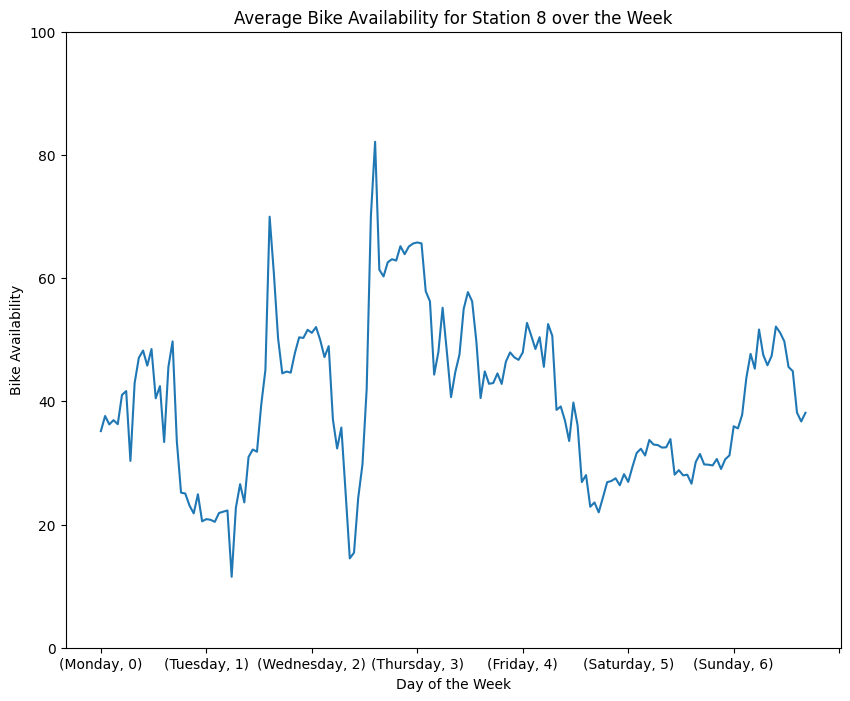

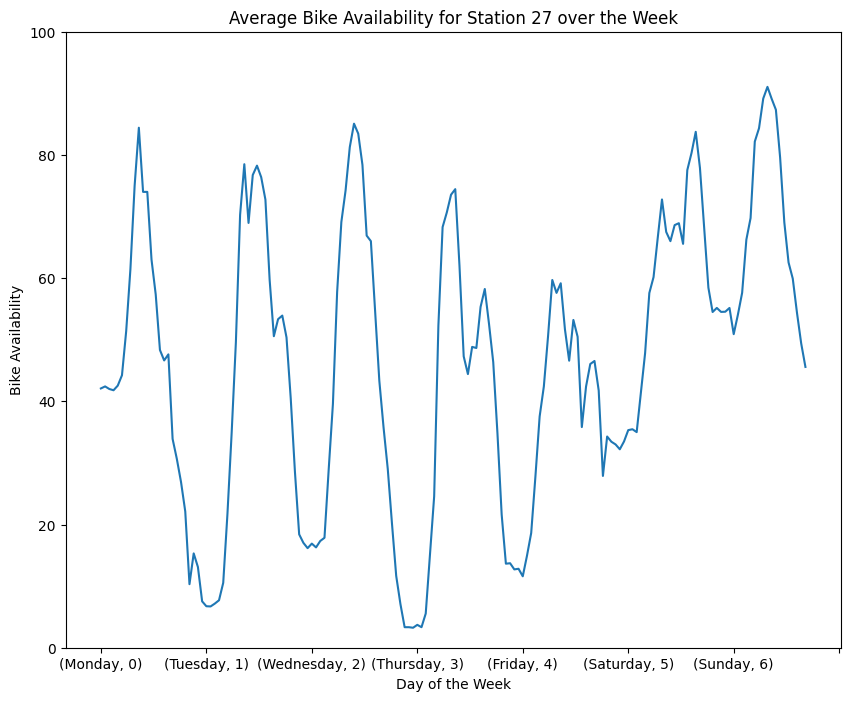

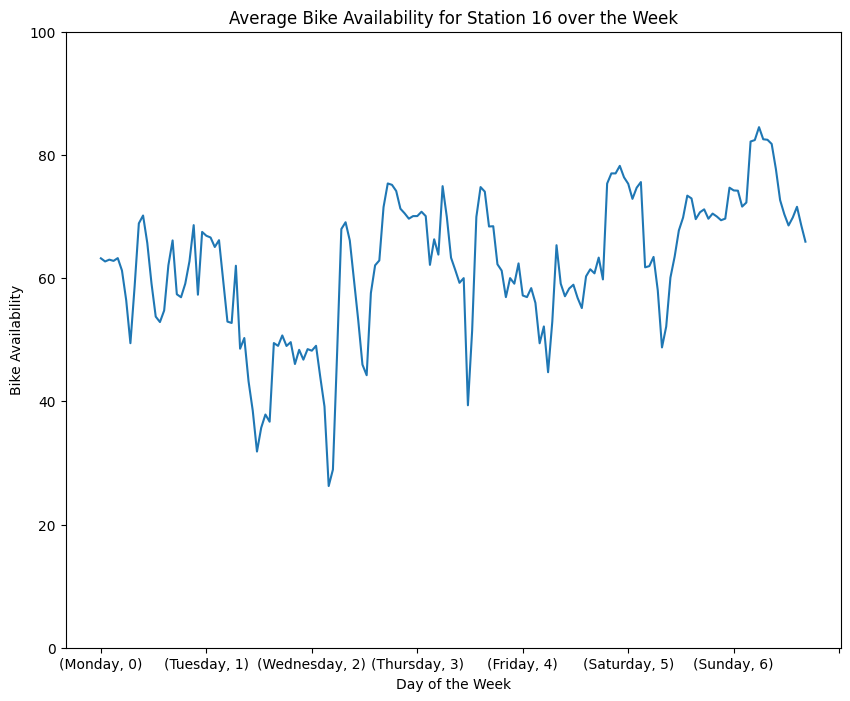

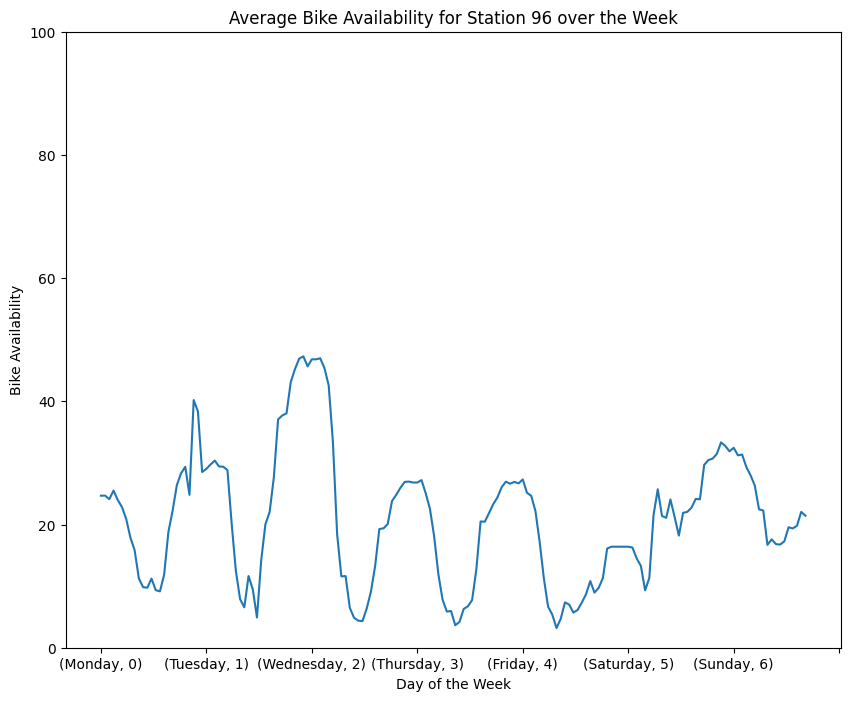

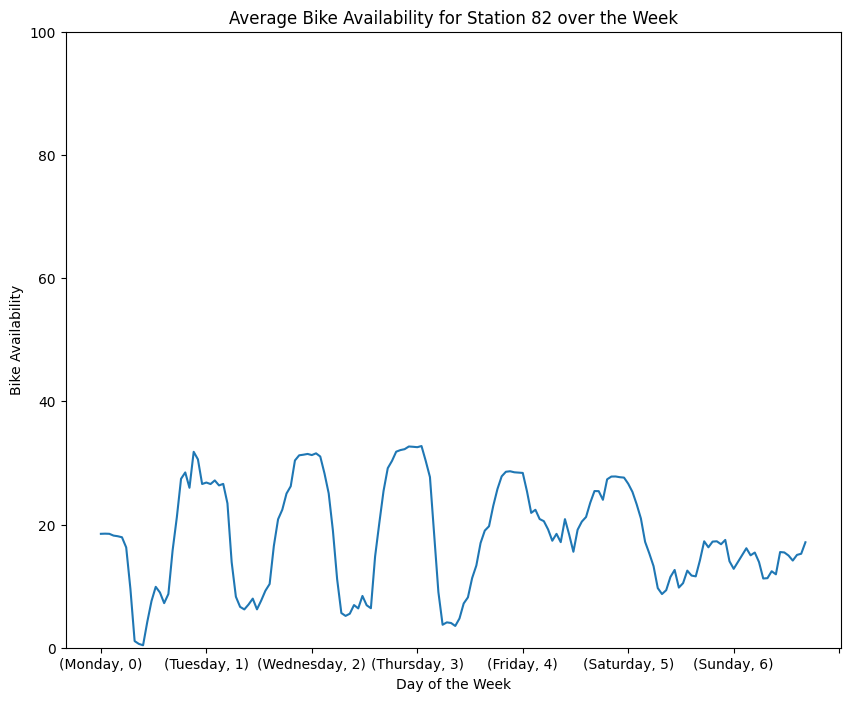

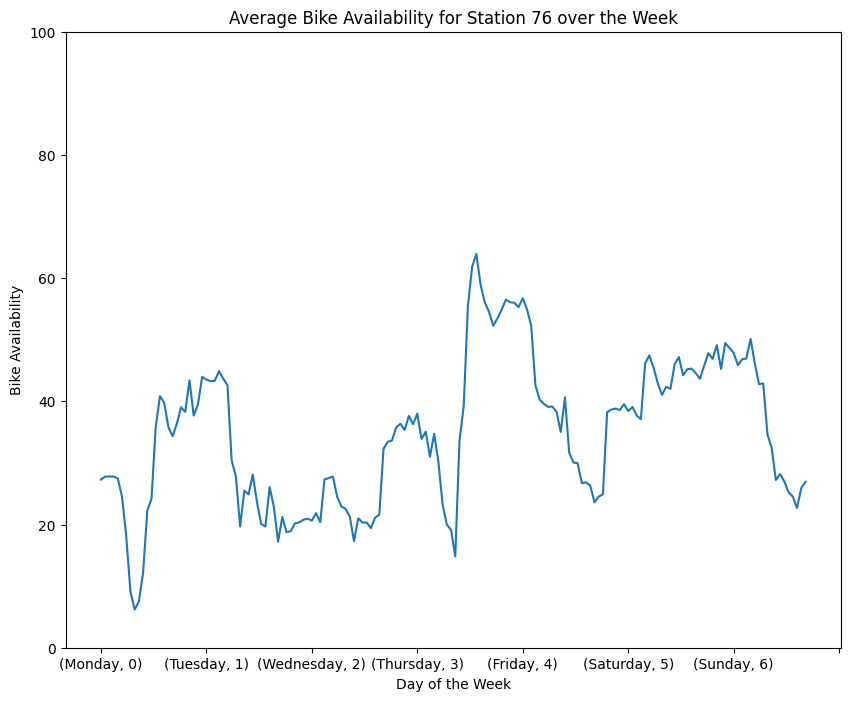

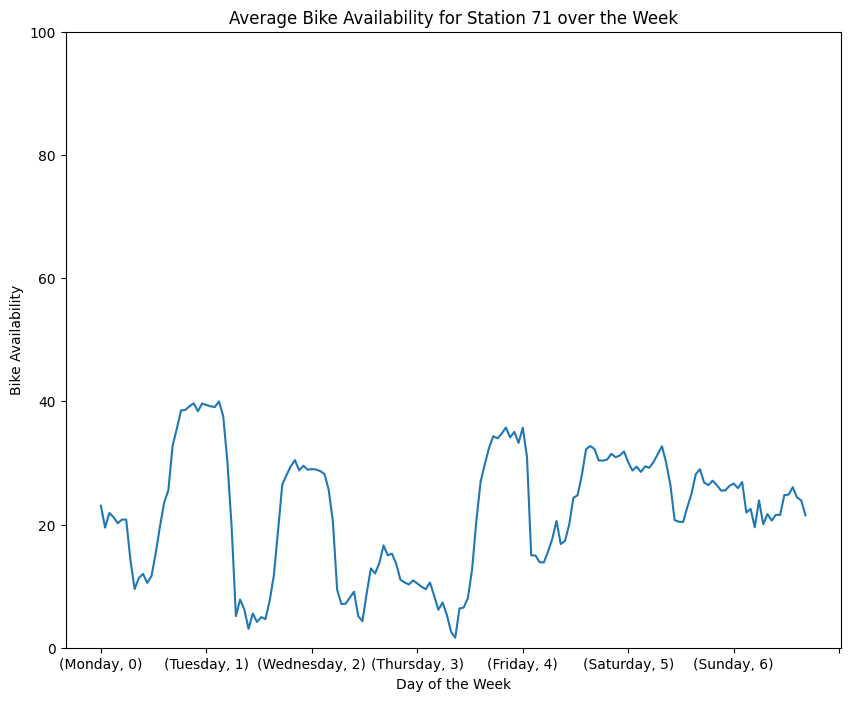

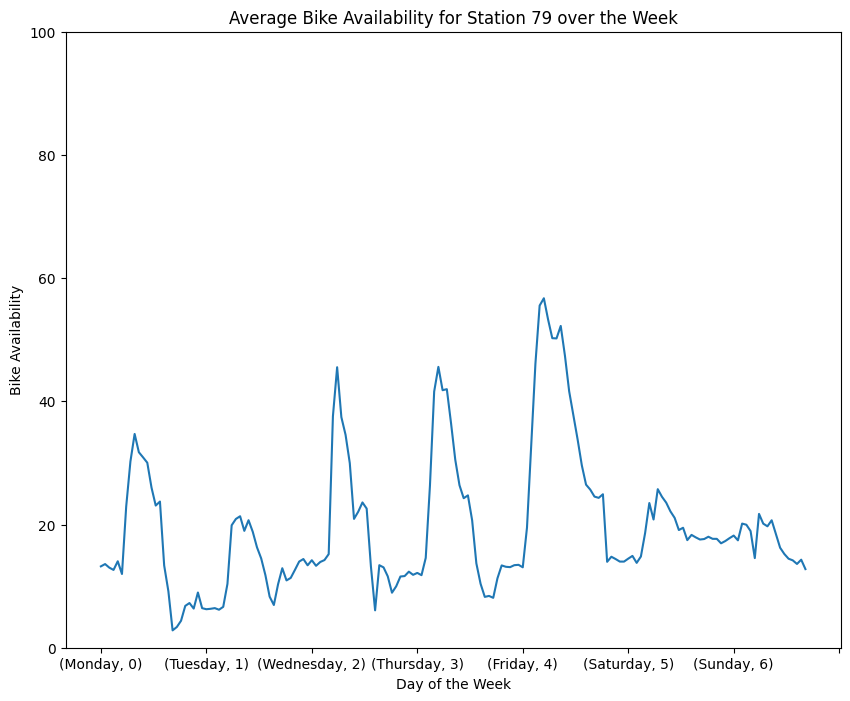

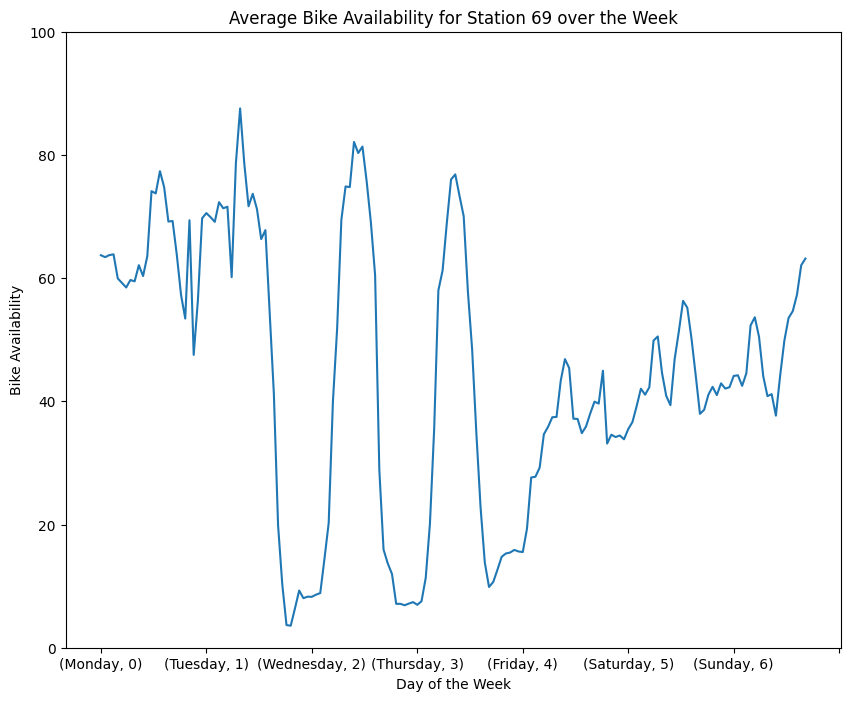

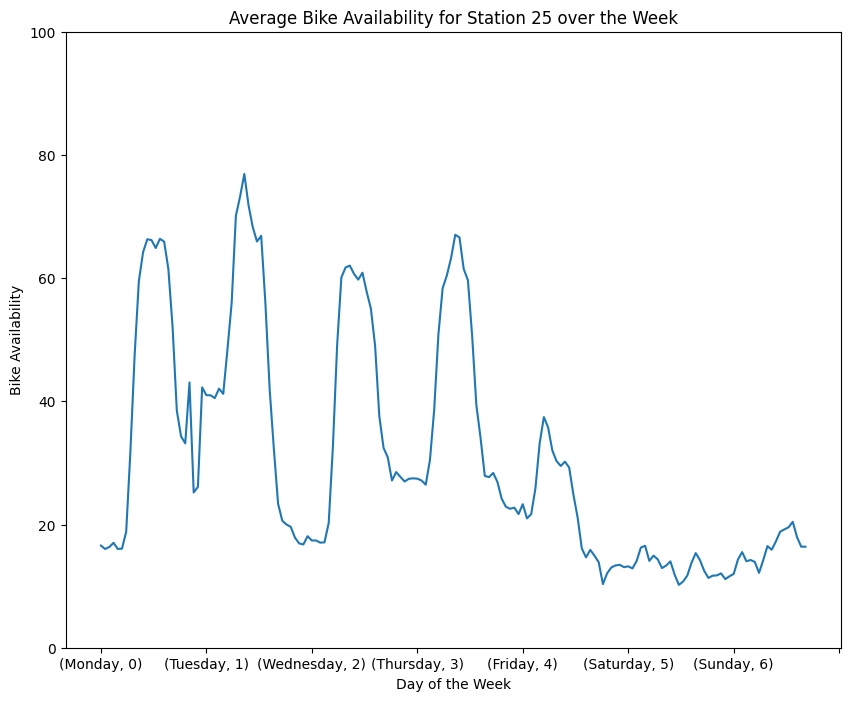

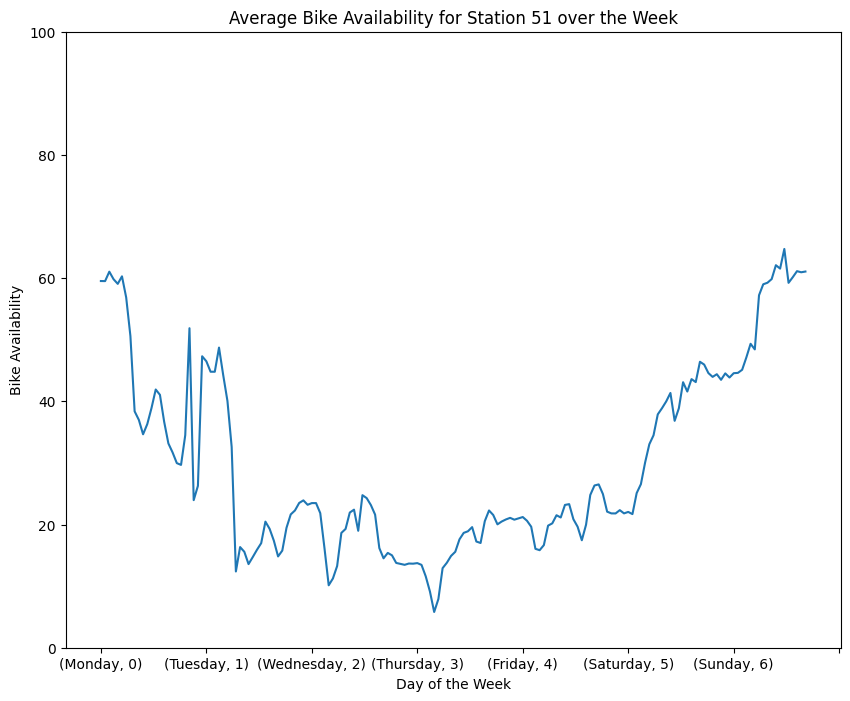

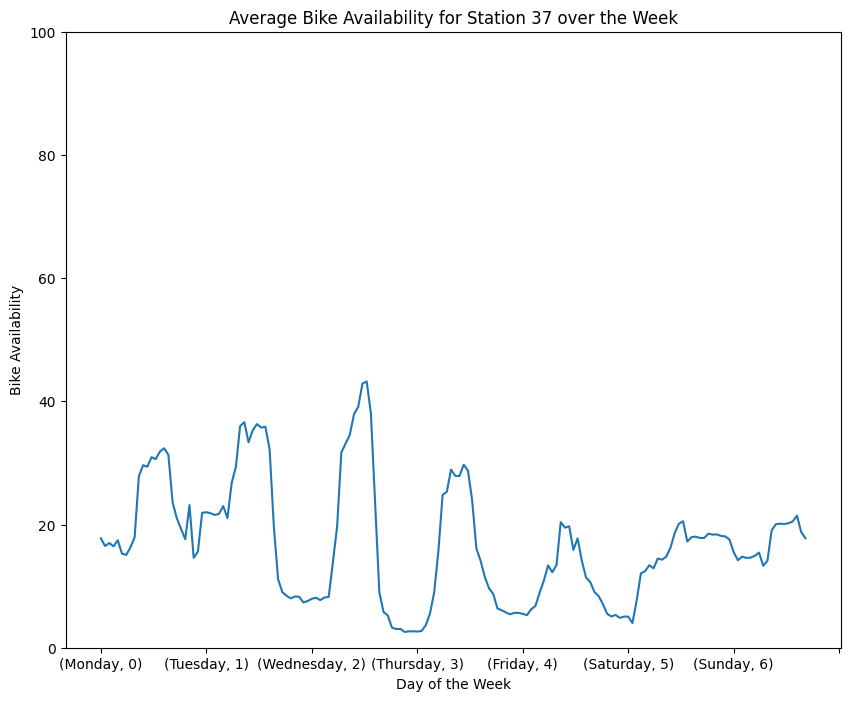

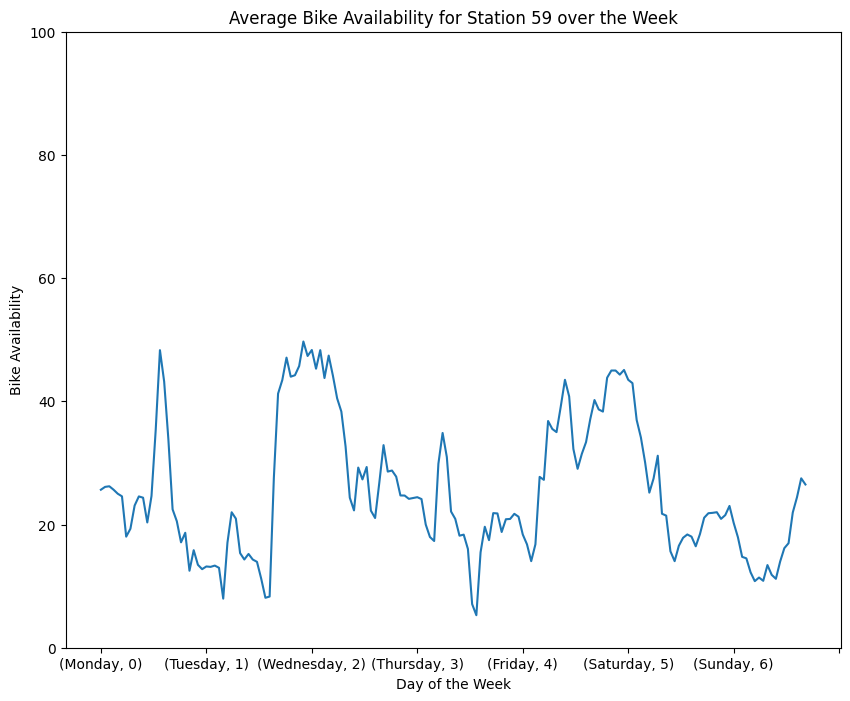

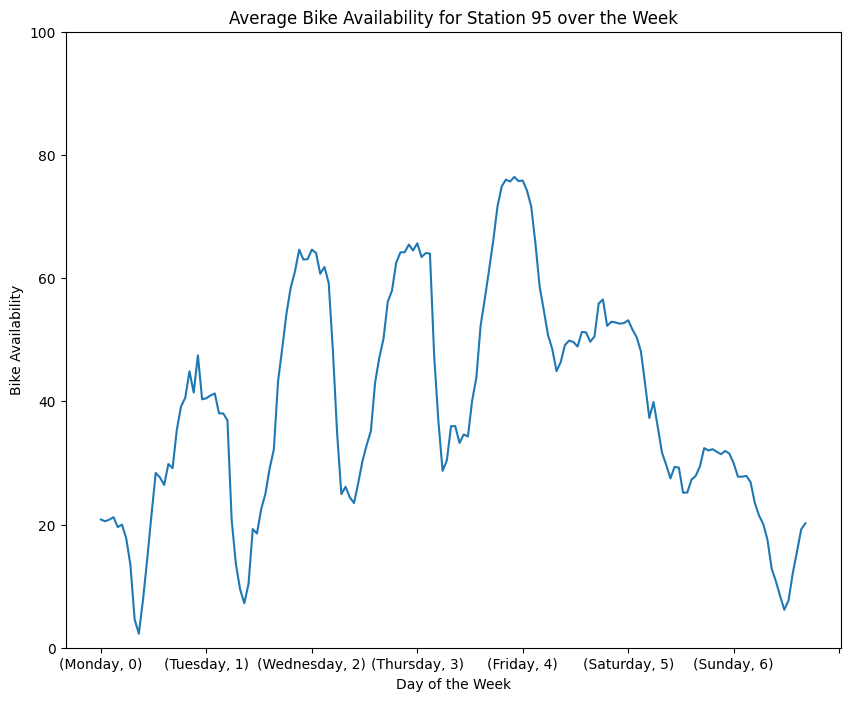

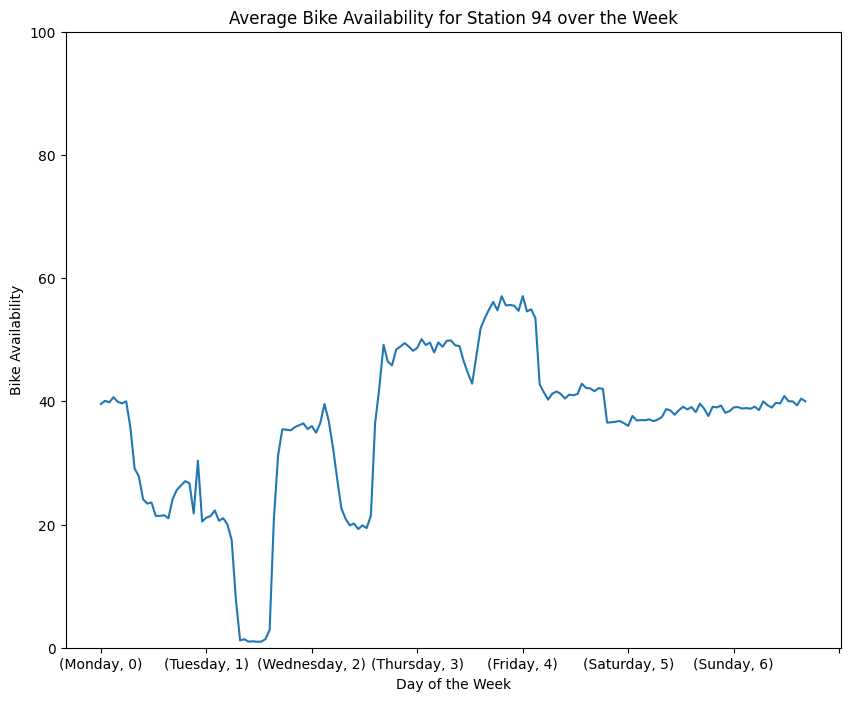

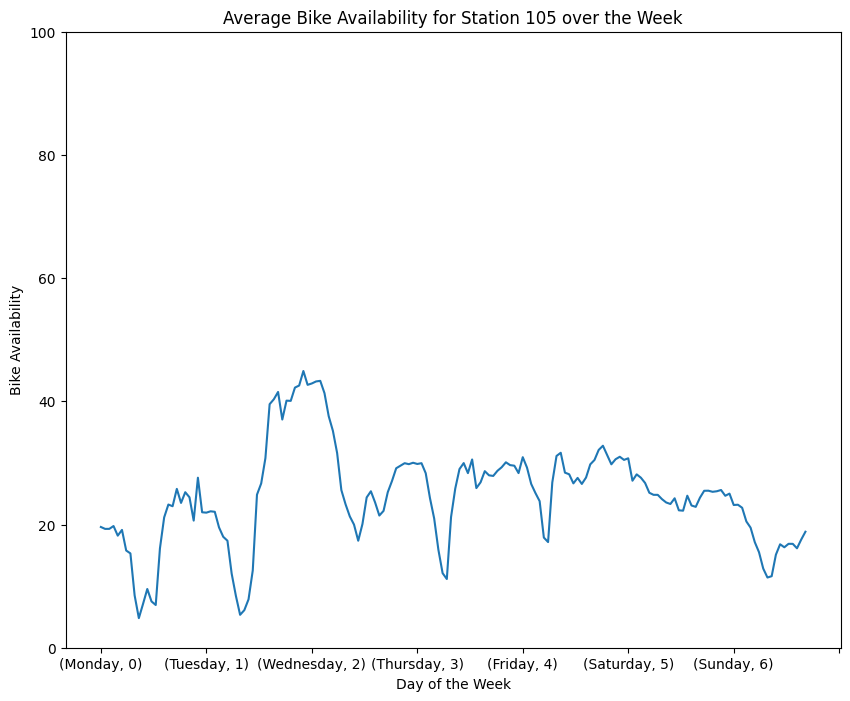

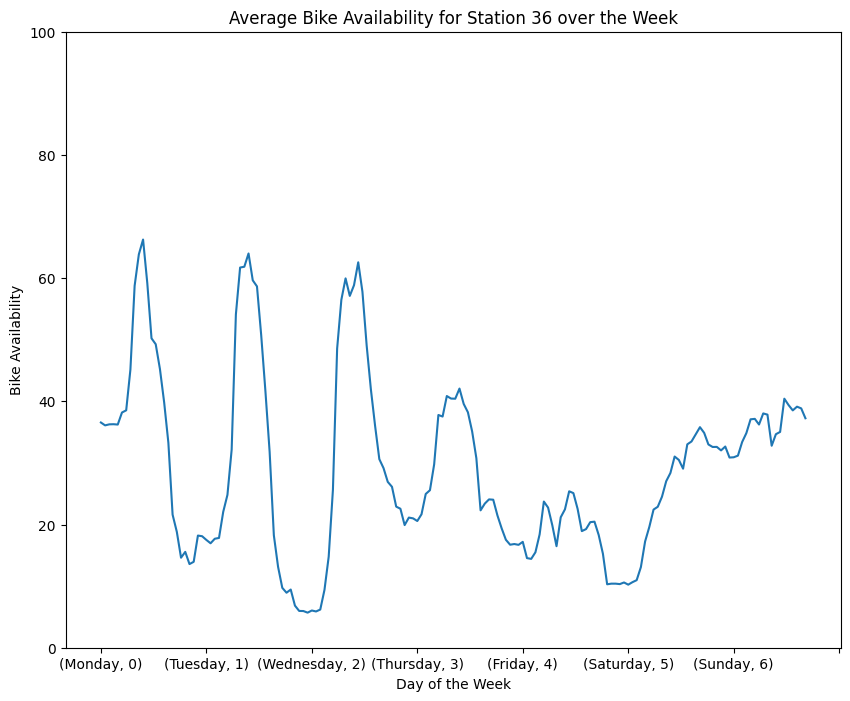

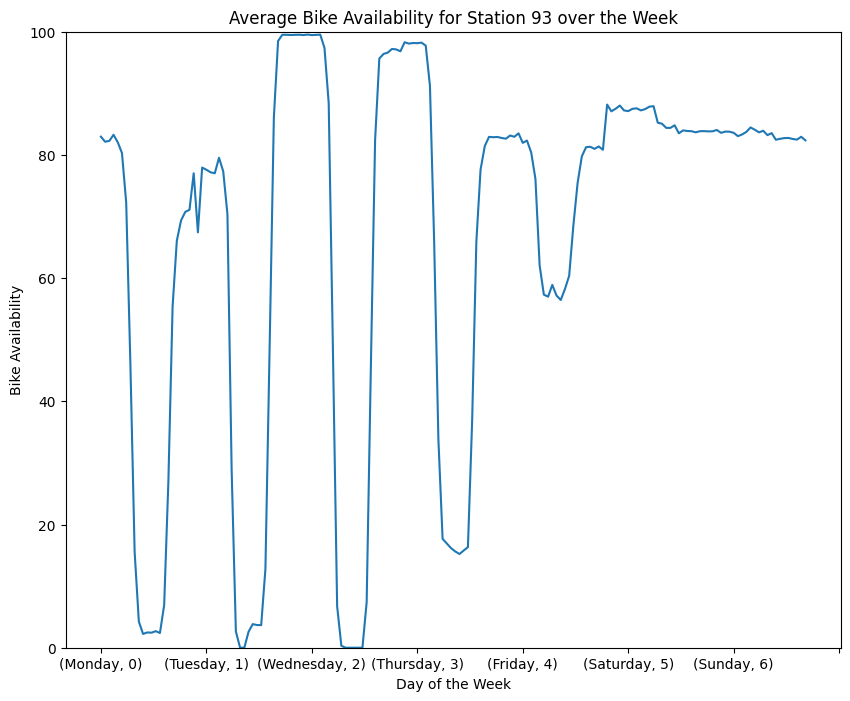

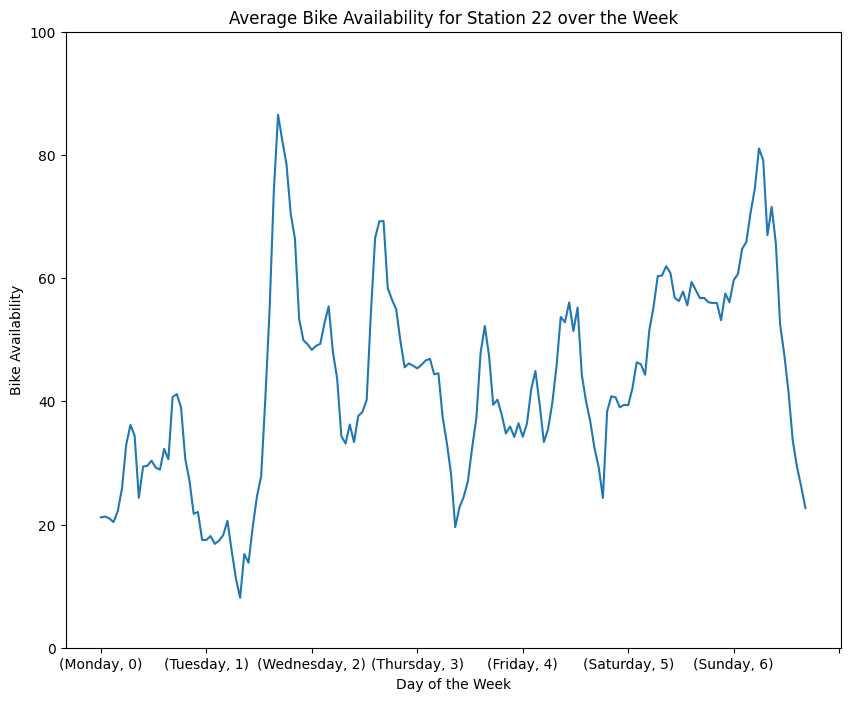

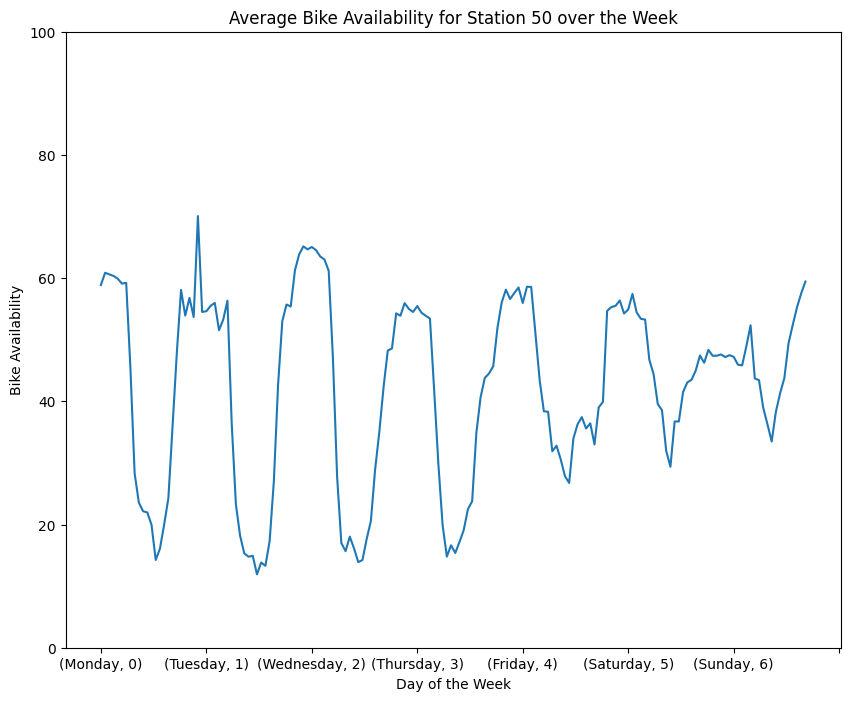

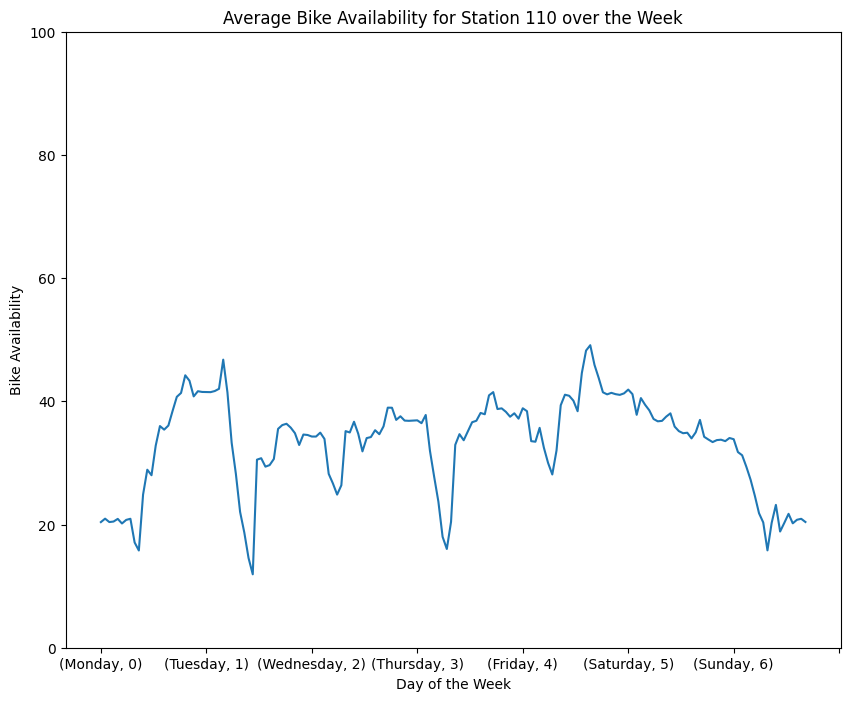

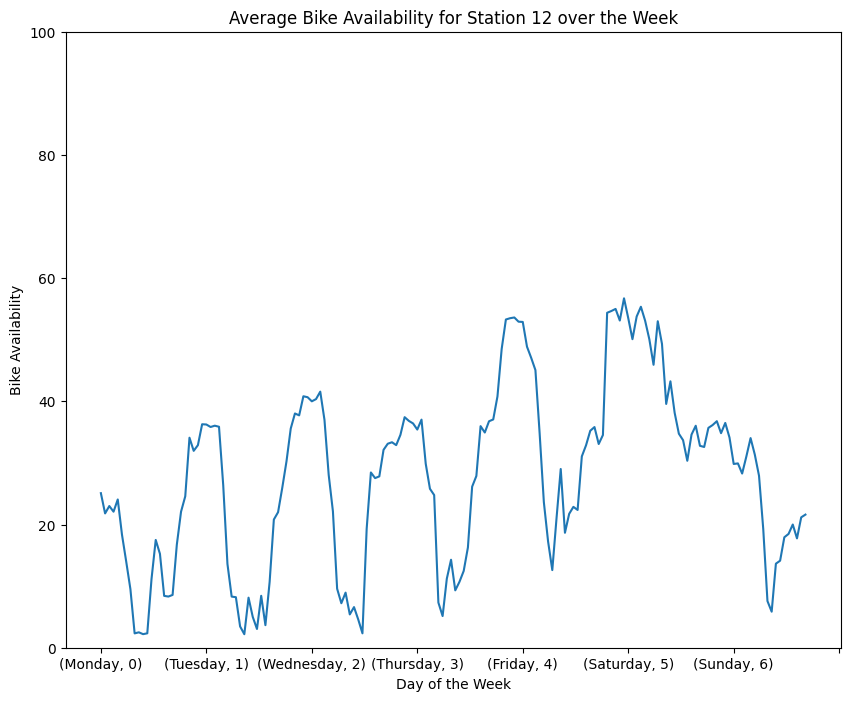

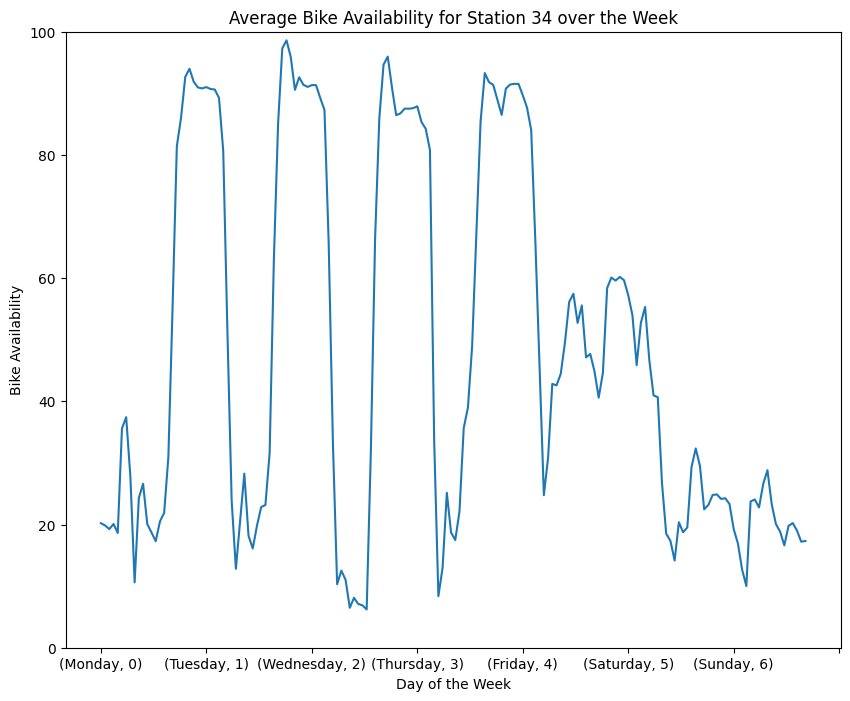

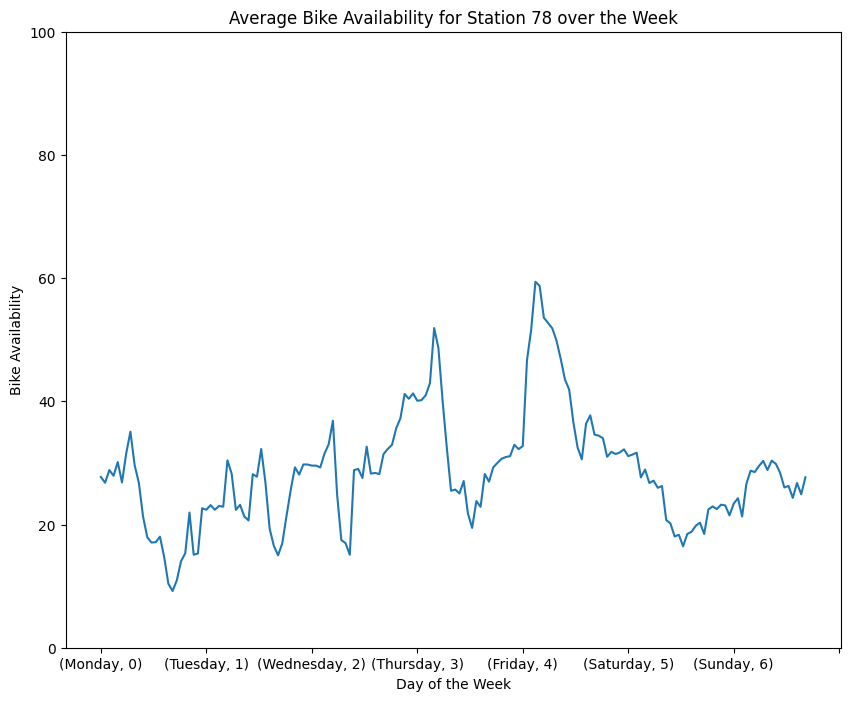

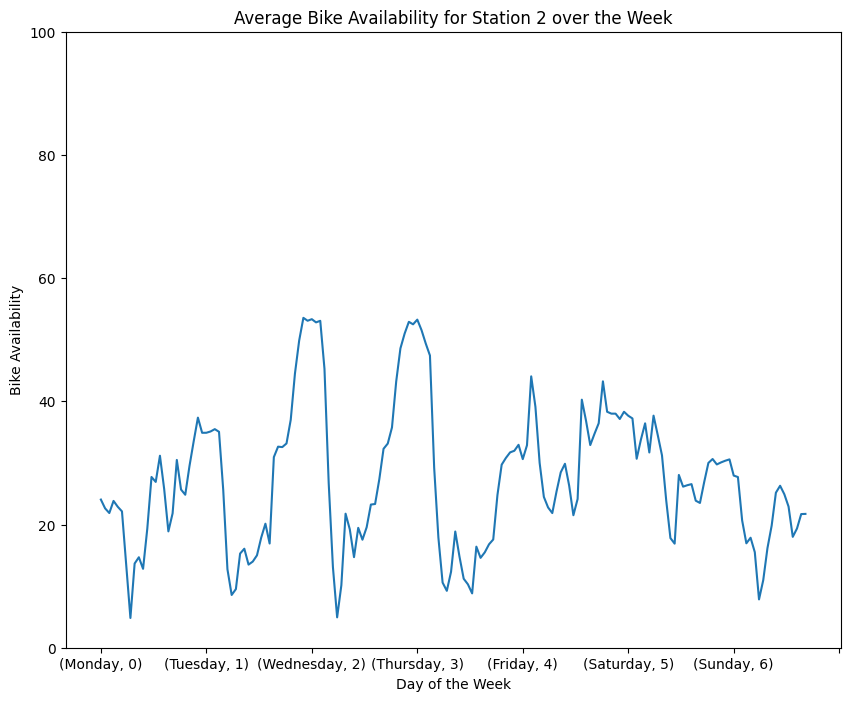

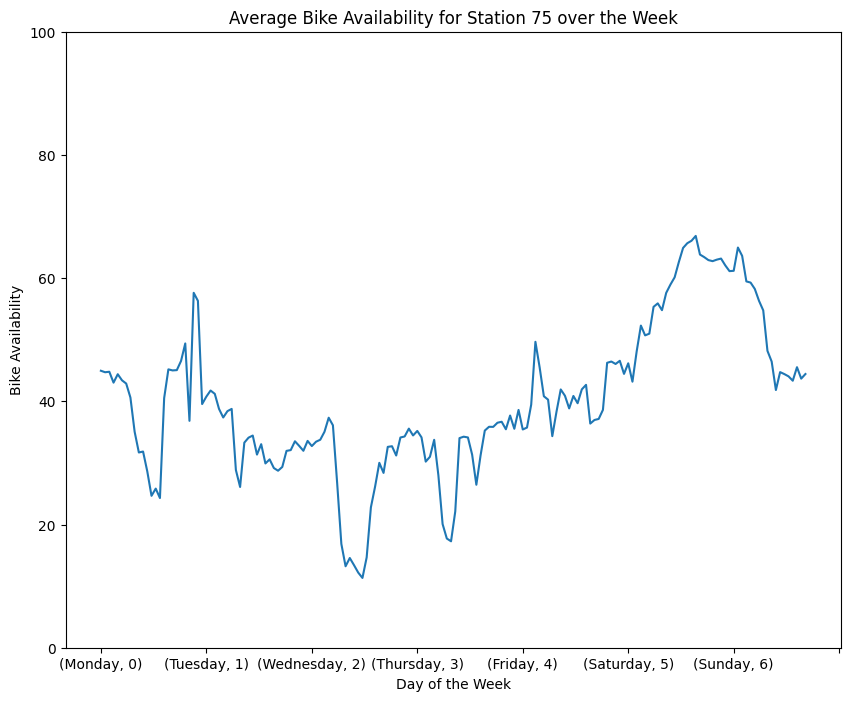

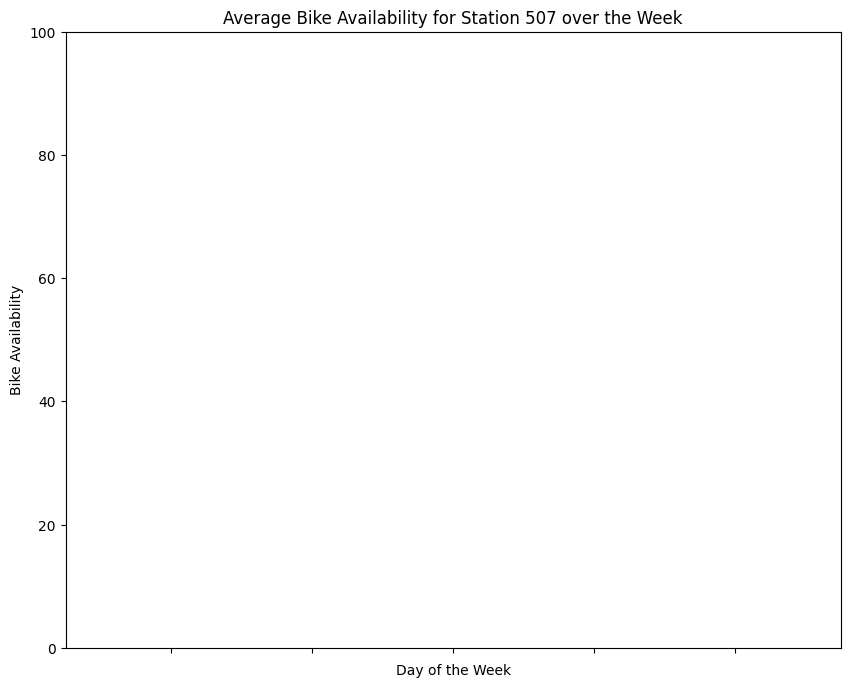

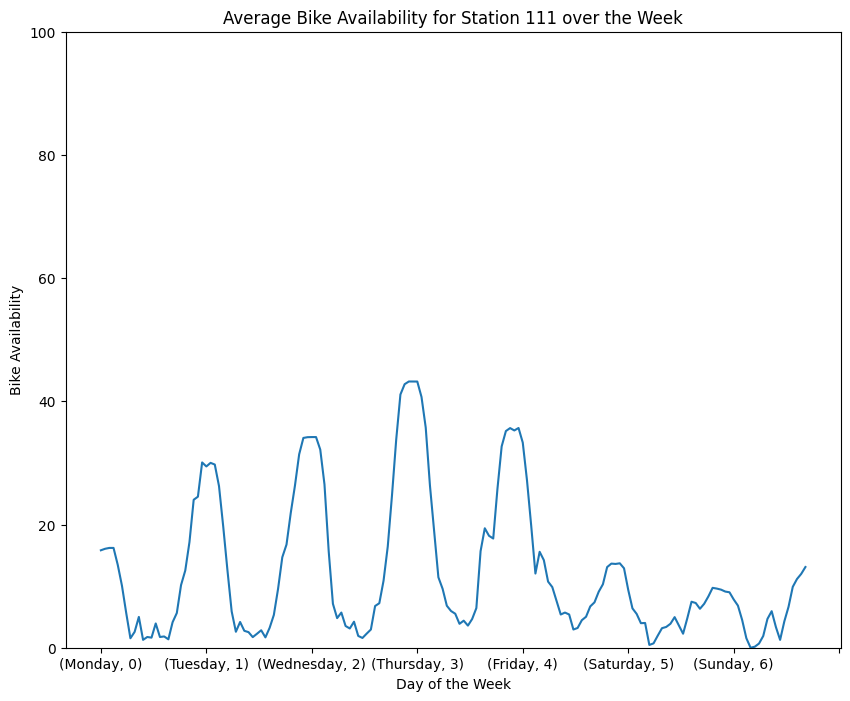

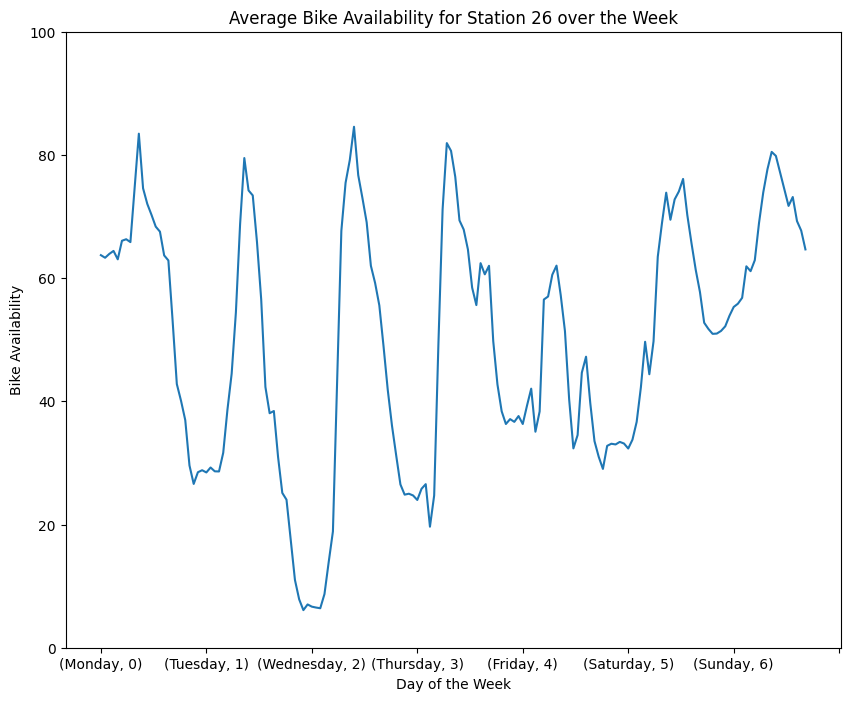

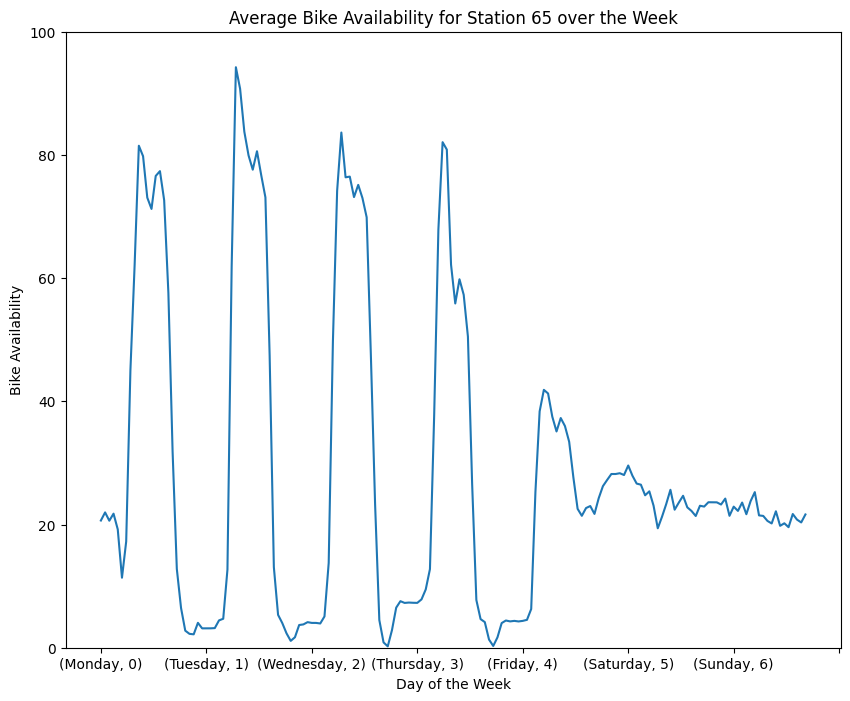

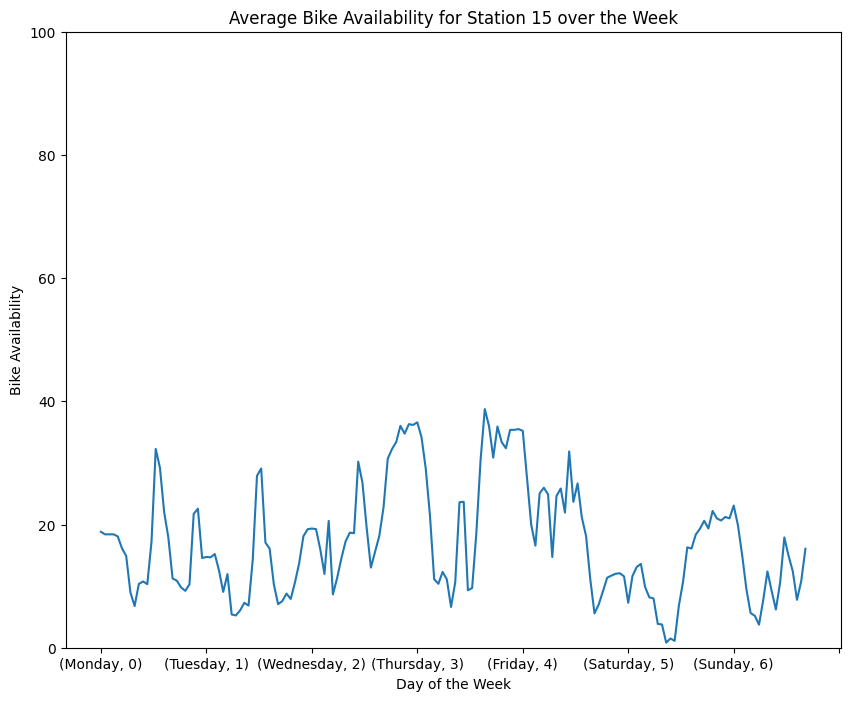

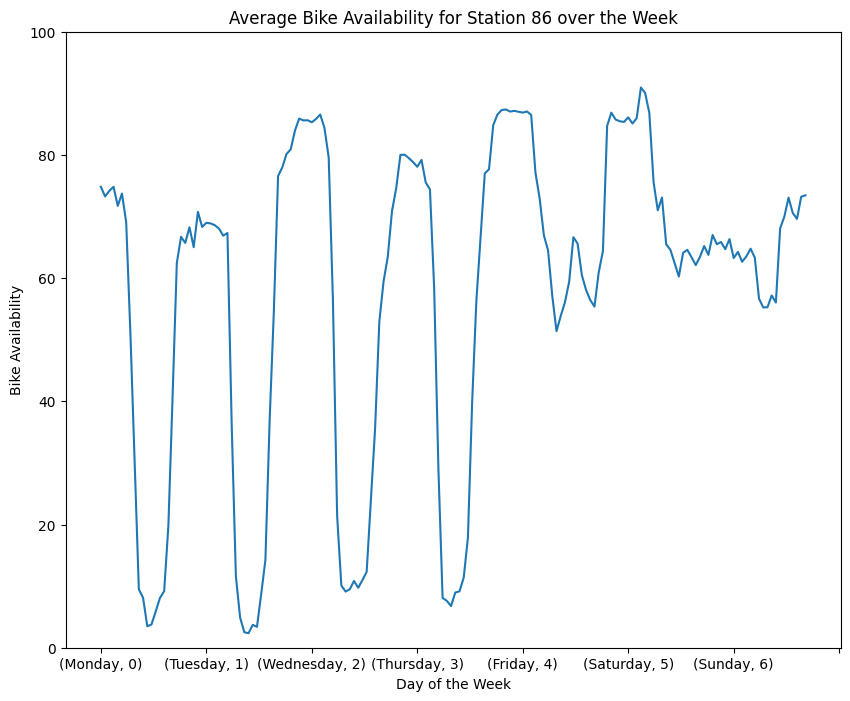

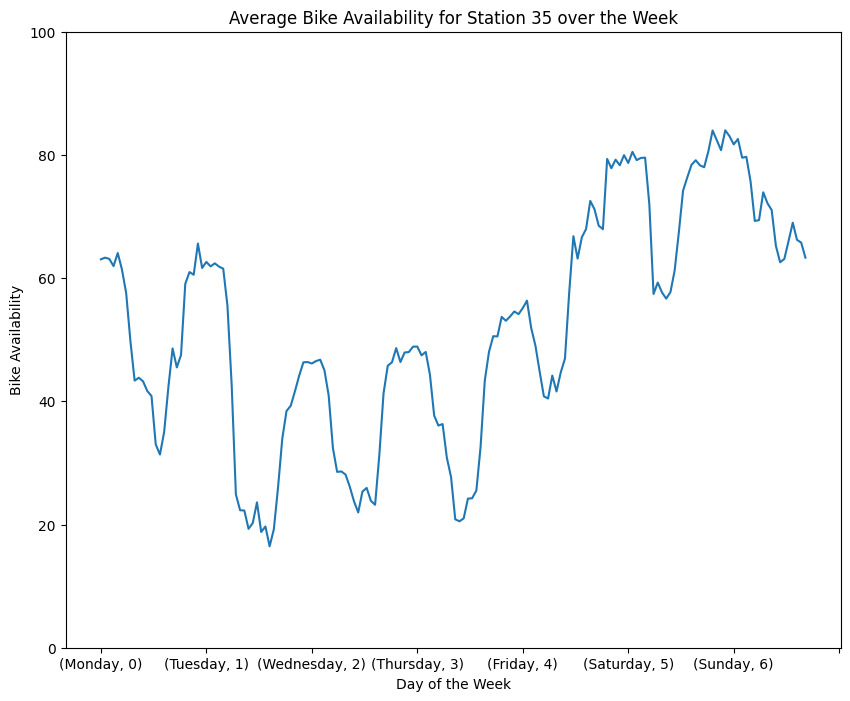

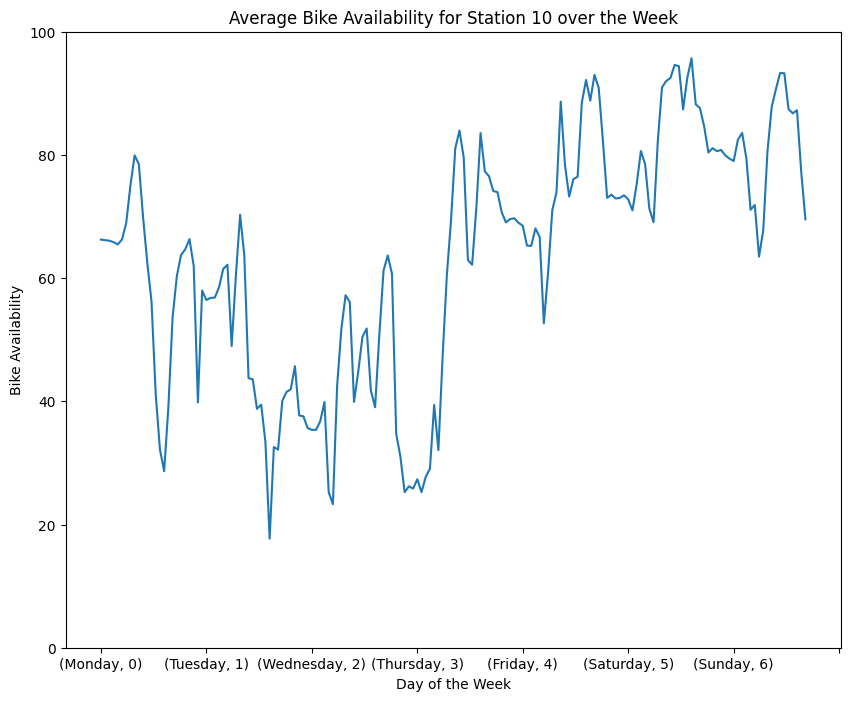

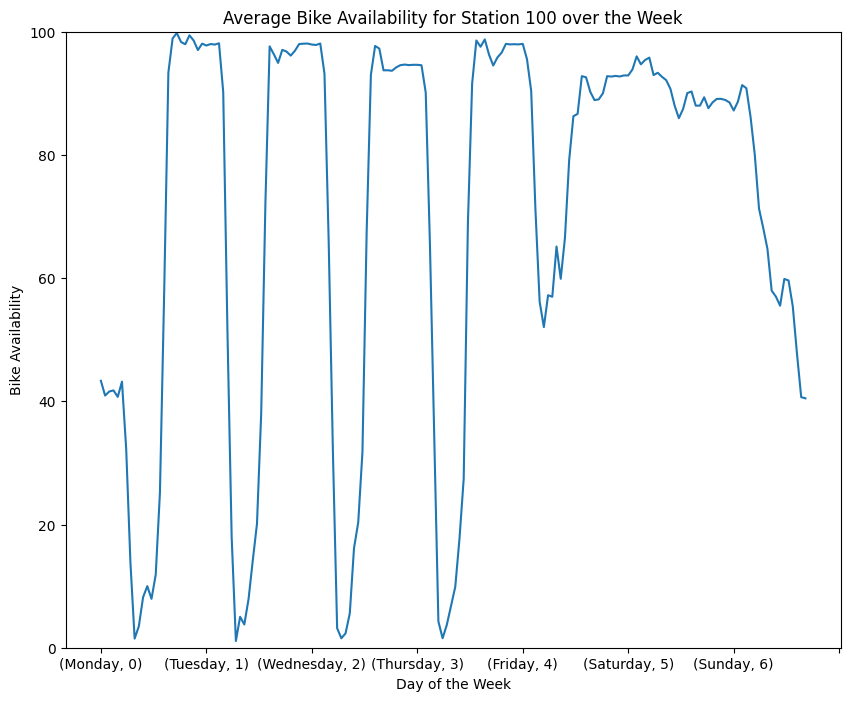

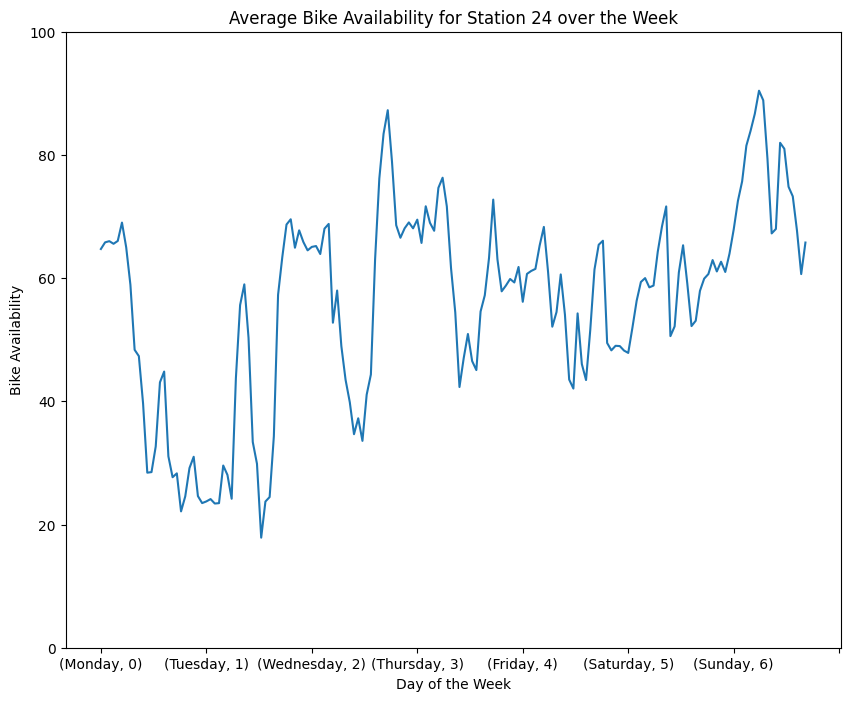

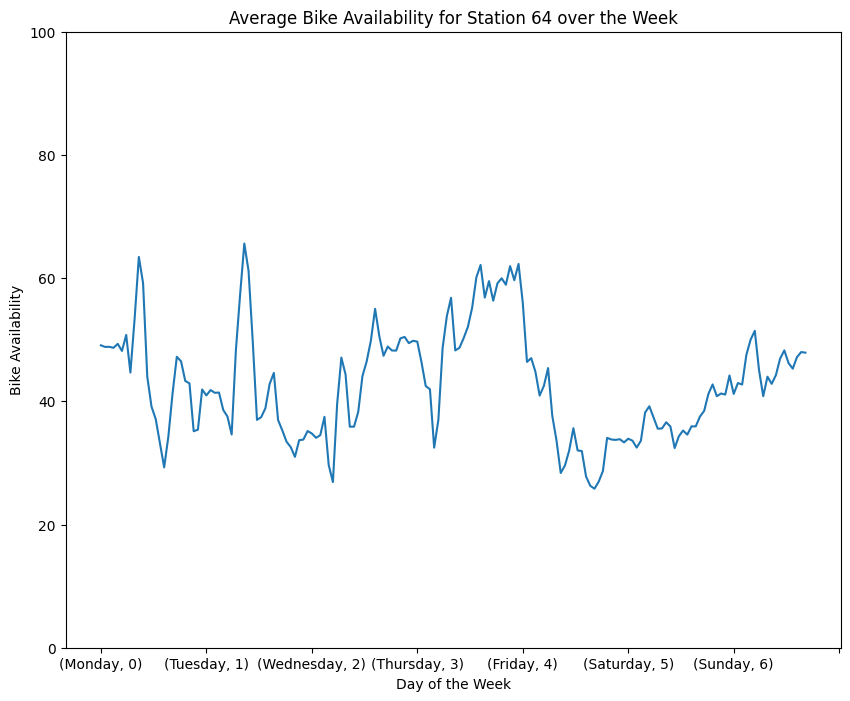

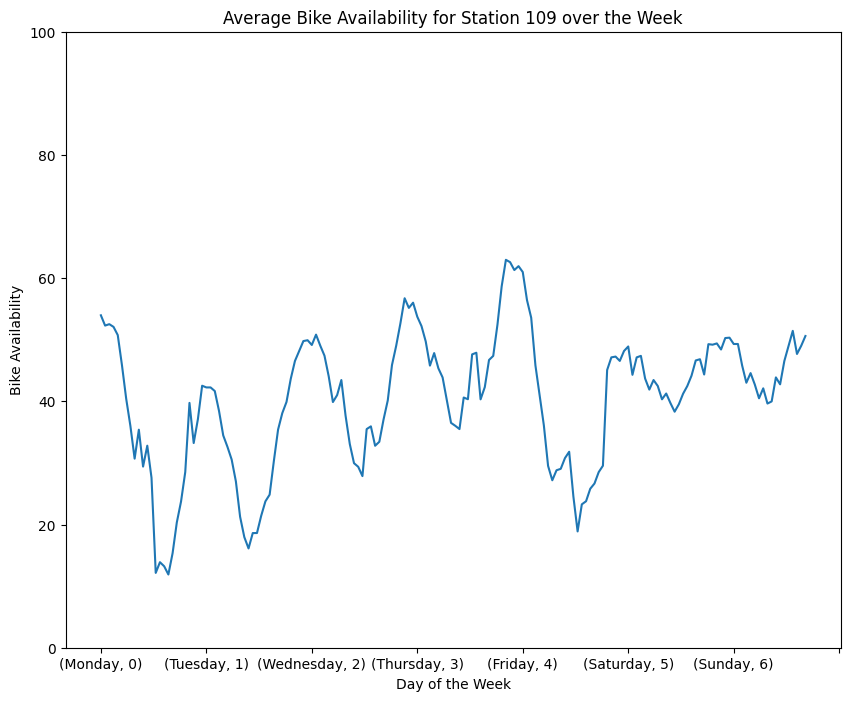

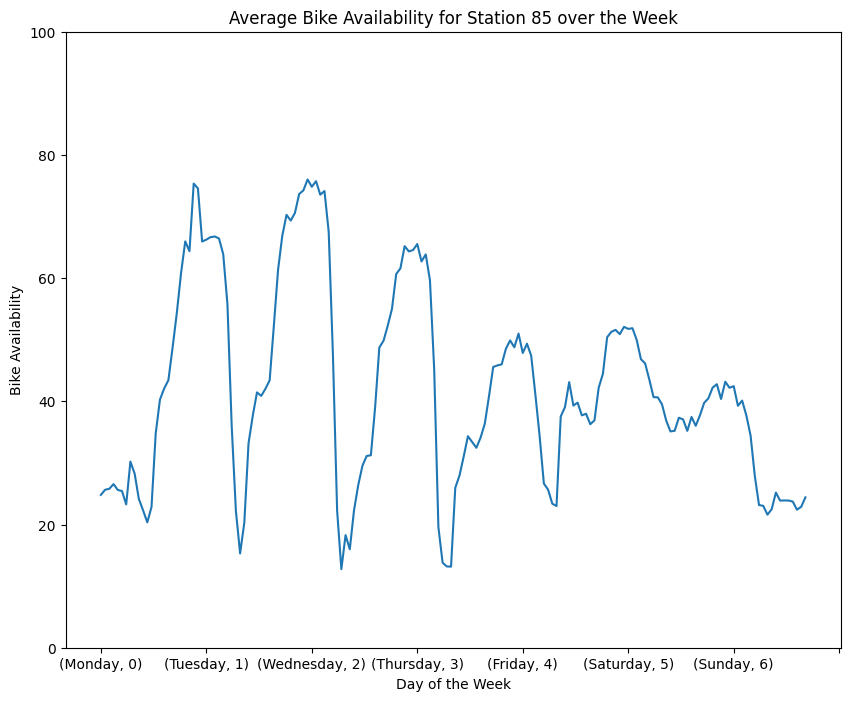

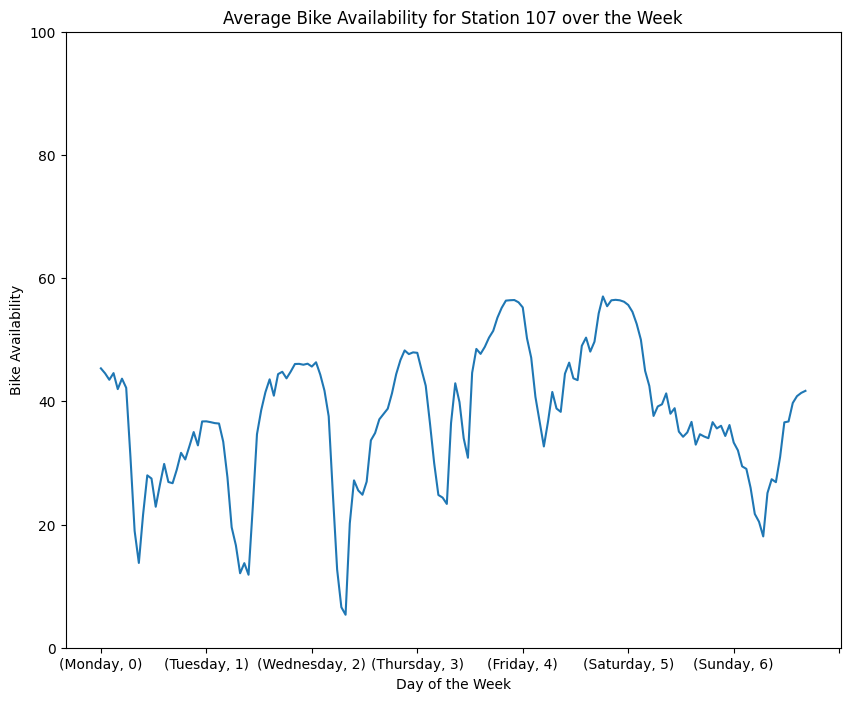

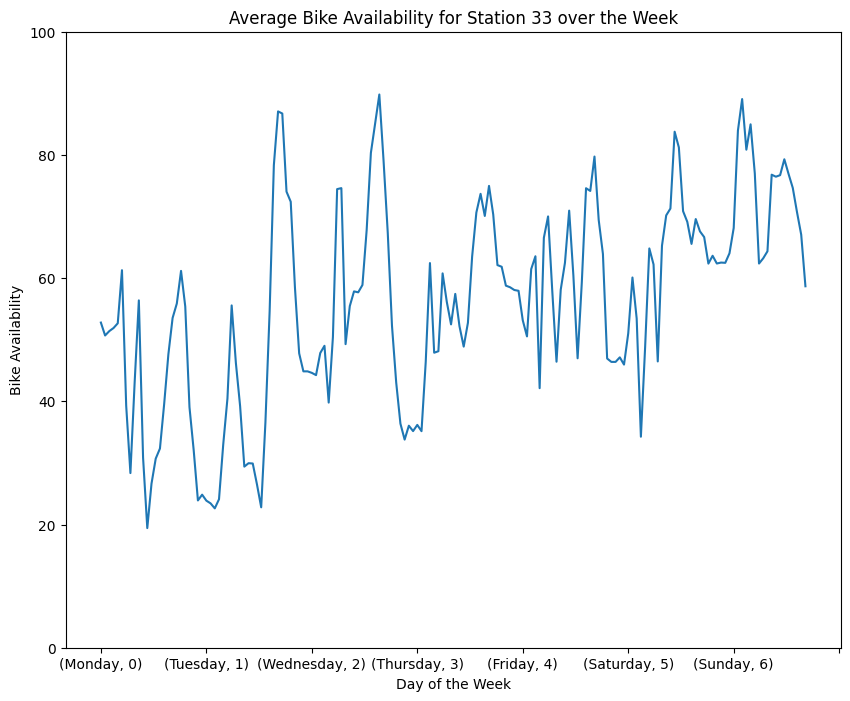

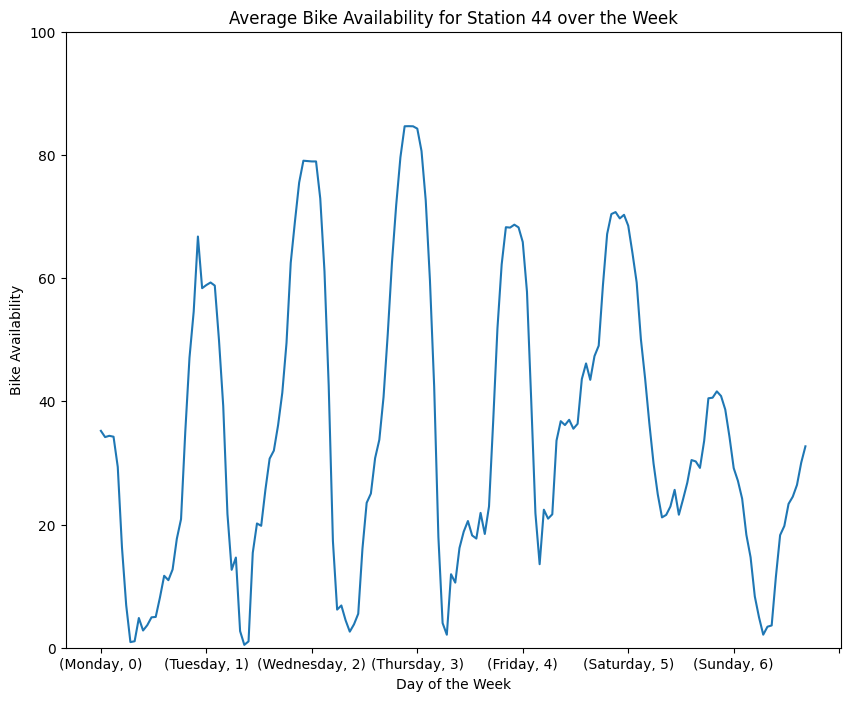

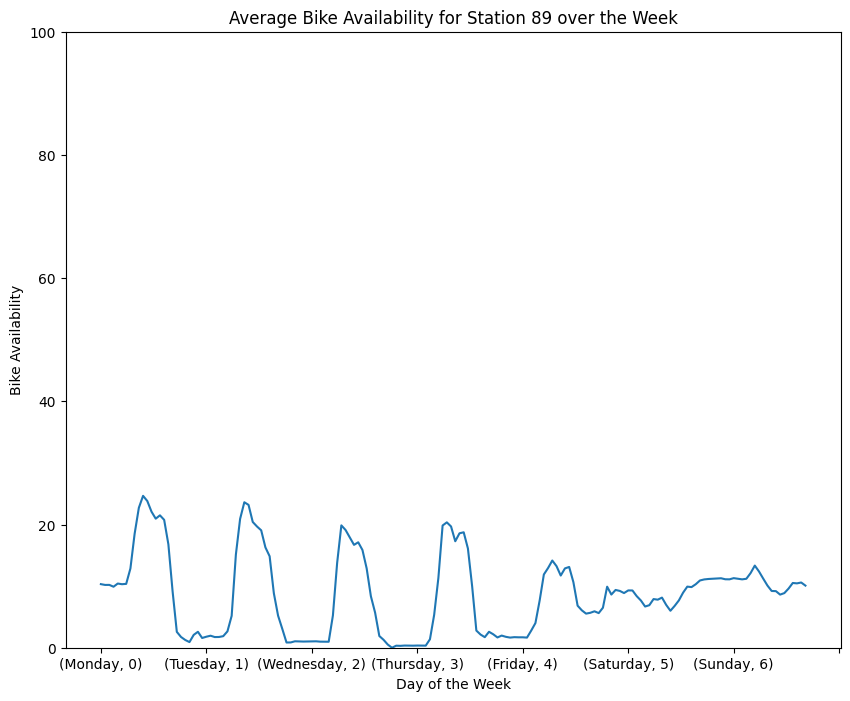

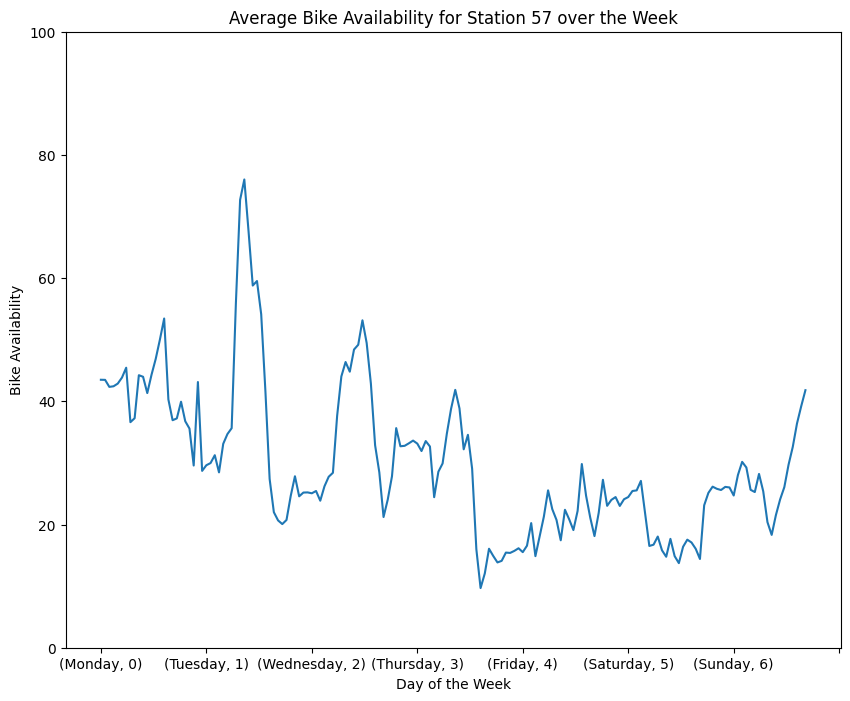

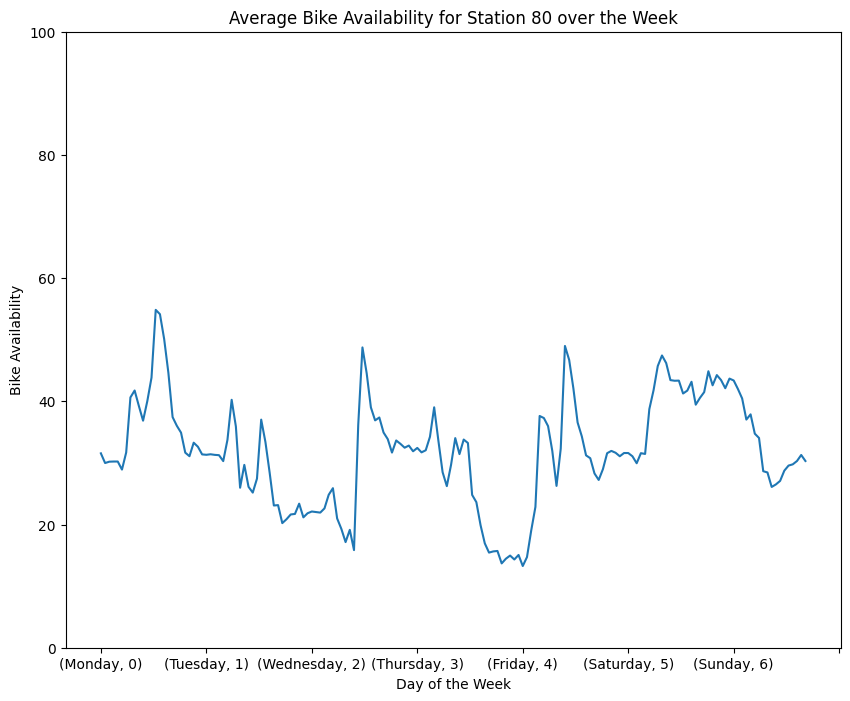

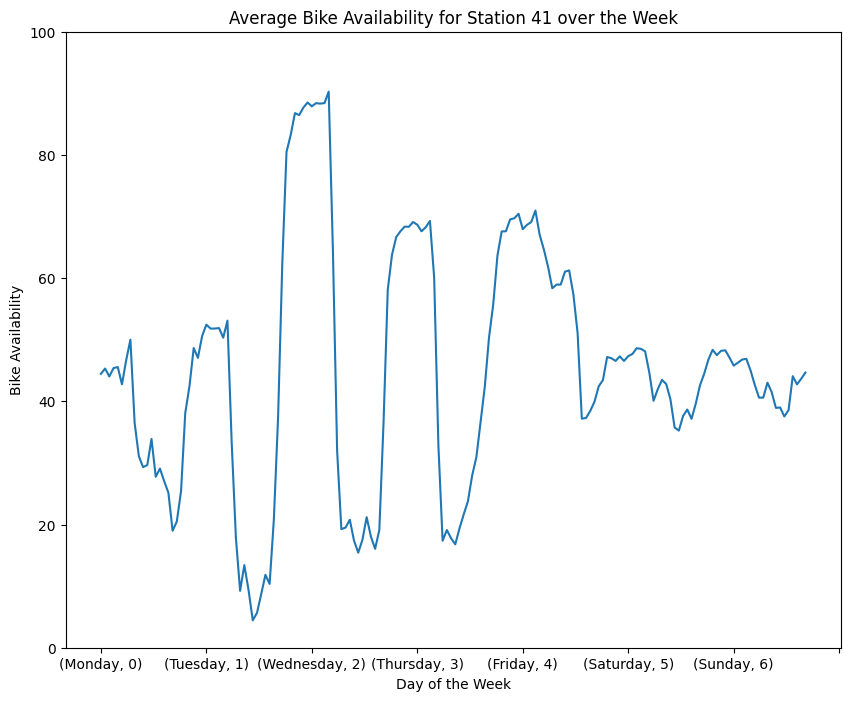

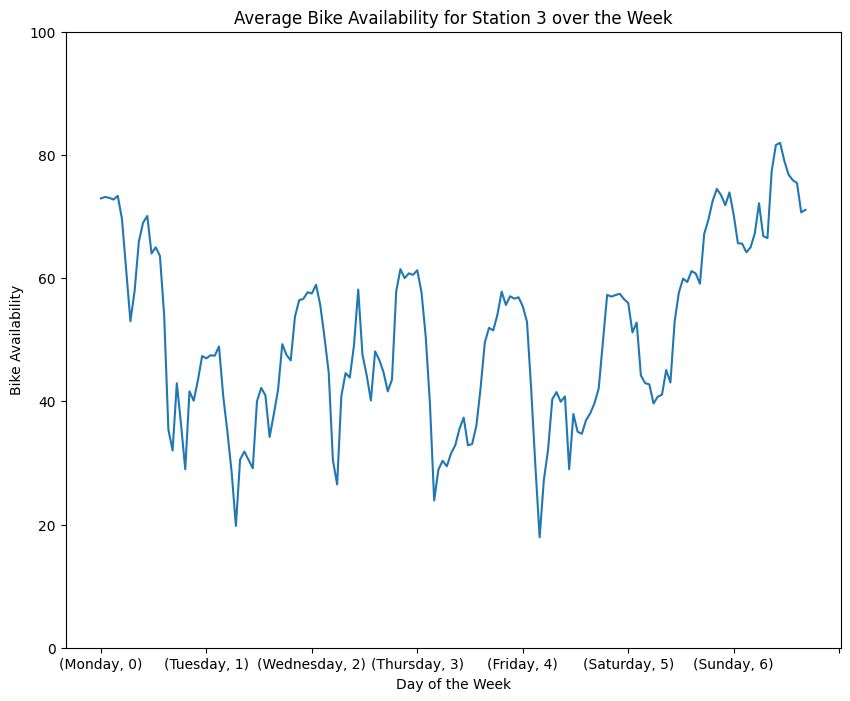

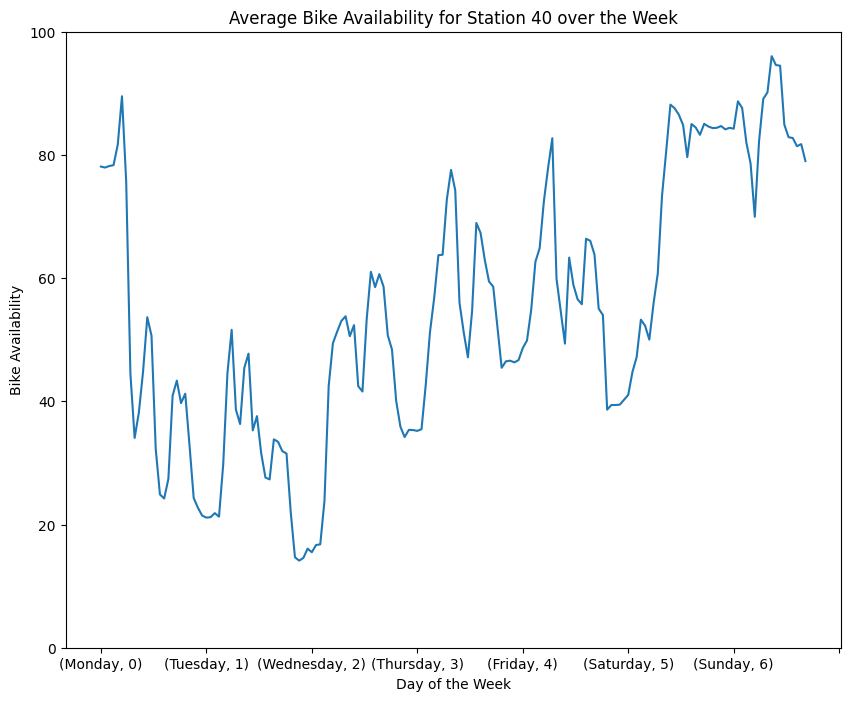

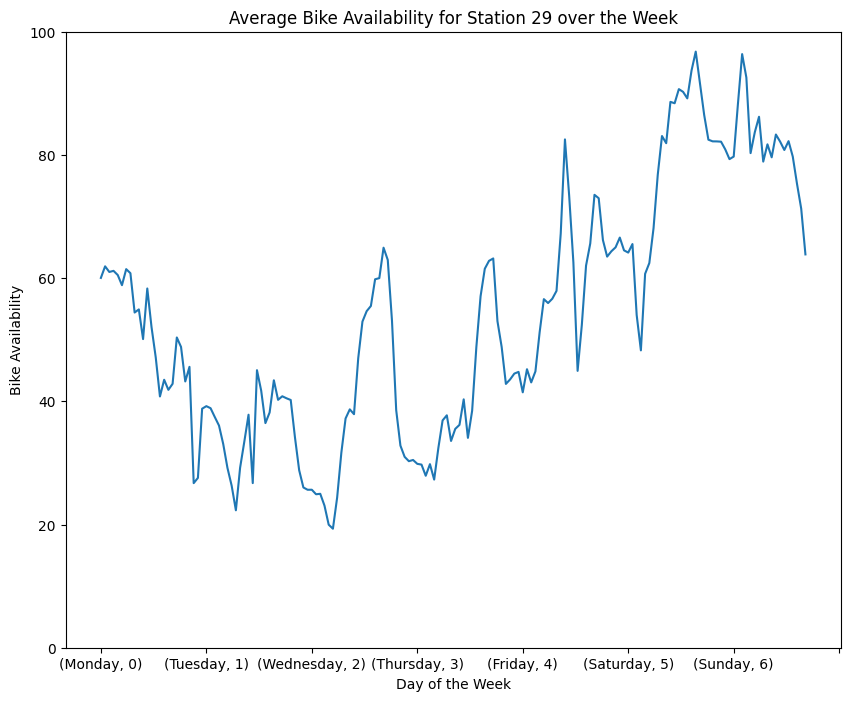

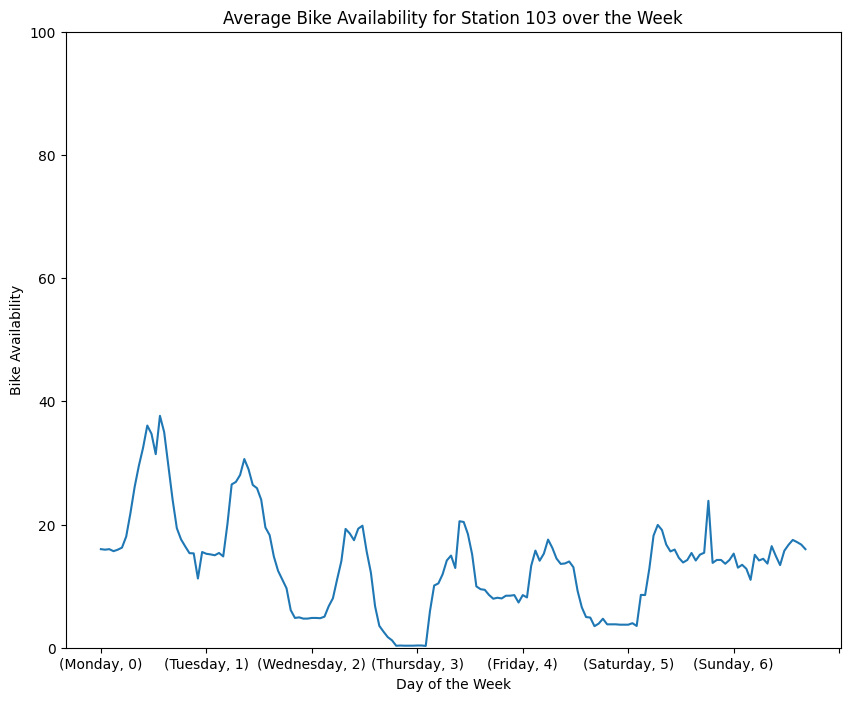

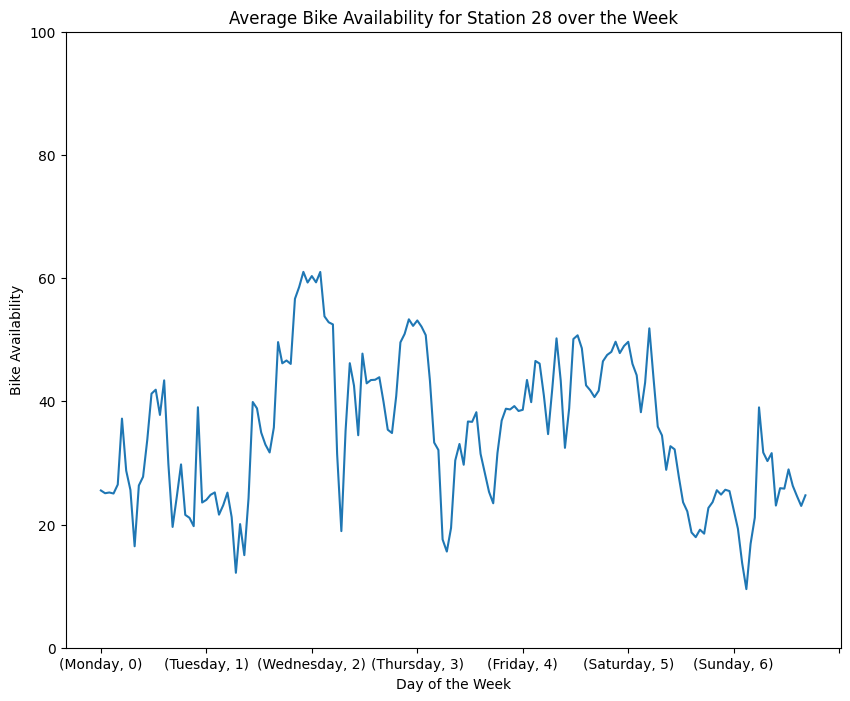

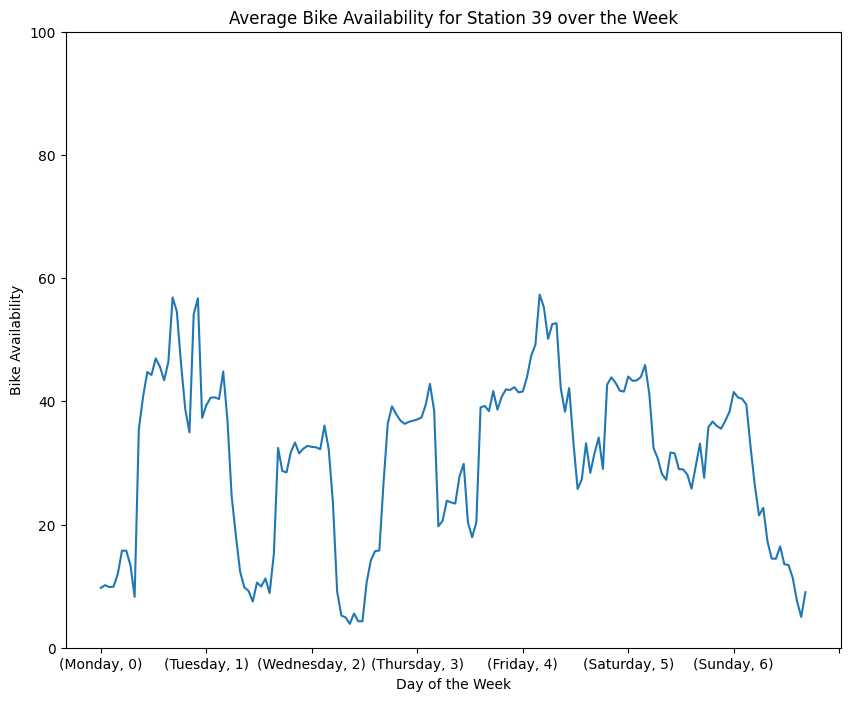

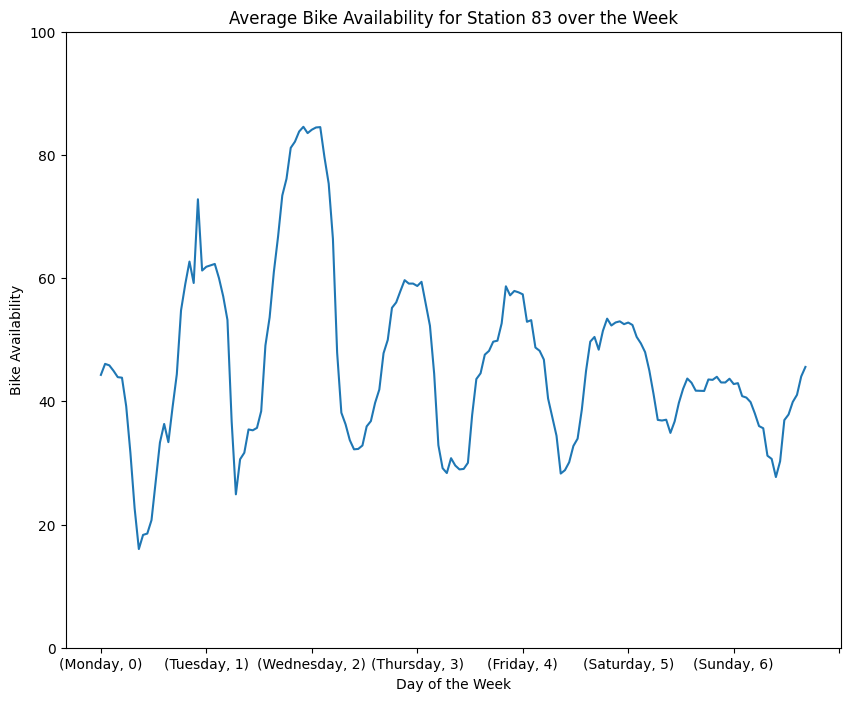

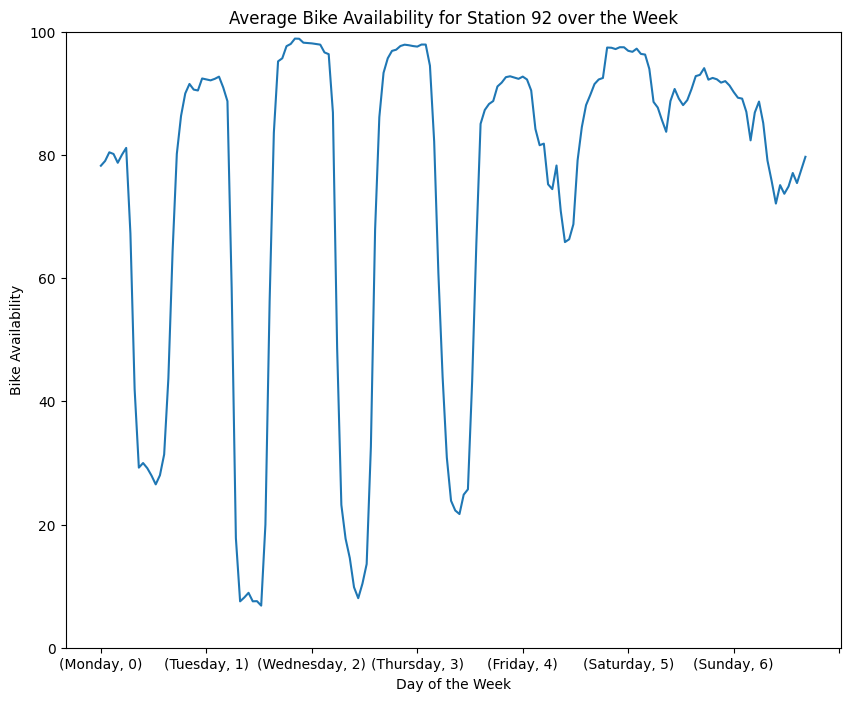

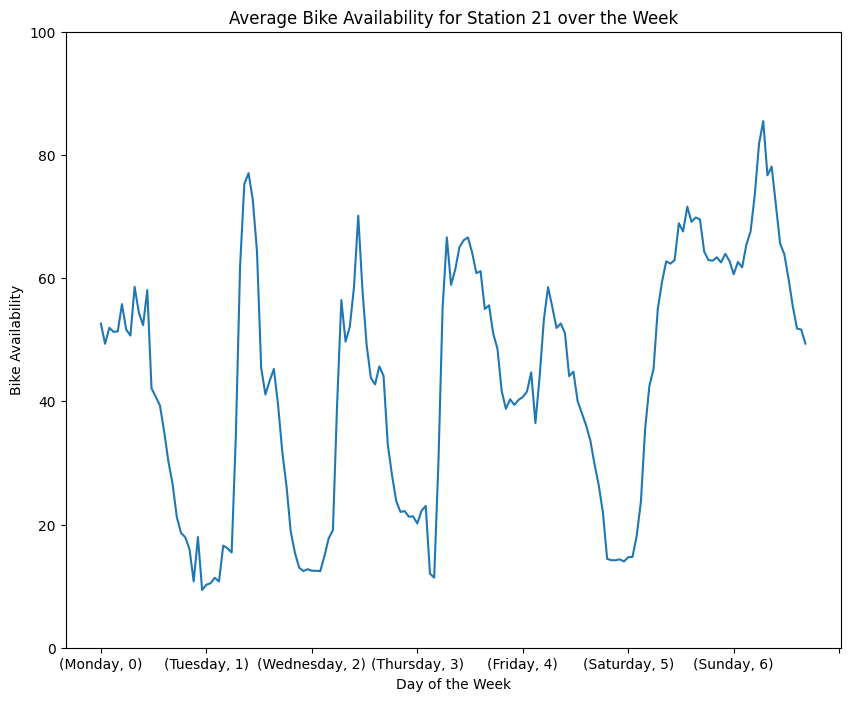

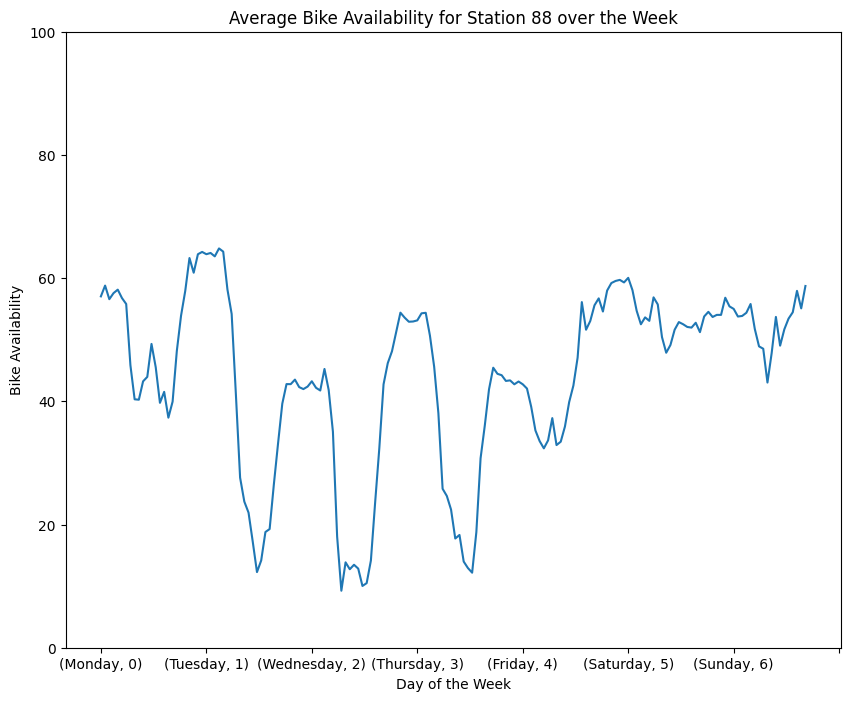

In [ ]:
#pick some stations to plot
length = len(df_static['number'])
for i in range(0, length):
    numb=df_static['number'][i]
    average_bike_availability(numb)